In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
os.chdir('/Users/Erin/git/moo_and_mcmc/dream')

In [5]:
traces = {}
for trace in ['a']:
    traces[trace] = [np.load('earm_mtdreamzs_3chain_uniform_.25his_'+str(trace)+'_sampled_params_chain_0.npy')]
    for chain in range(1, 3):
        traces[trace].append(np.load('earm_mtdreamzs_3chain_uniform_.25his_'+str(trace)+'_sampled_params_chain_'+str(chain)+'.npy'))

In [7]:
logps = {}
for trace in ['a']:
    logps[trace] = [np.load('earm_mtdreamz_3chain_uniform_.25his_'+str(trace)+'_logps_chain_0.npy')]
    print 'Logp of trace: ',trace,' chain: 0 = ',logps[trace][-1]
    for chain in range(1, 3):
        logps[trace].append(np.load('earm_mtdreamz_3chain_uniform_.25his_'+str(trace)+'_logps_chain_'+str(chain)+'.npy'))
        print 'Logp of trace: ',trace,' chain: ',chain,' = ',logps[trace][-1][-1]

Logp of trace:  a  chain: 0 =  [[            -inf]
 [            -inf]
 [            -inf]
 [            -inf]
 [            -inf]
 [            -inf]
 [            -inf]
 [            -inf]
 [ -1.07660934e+03]
 [ -1.07660934e+03]
 [ -1.07660934e+03]
 [ -1.07660934e+03]
 [ -1.07660934e+03]
 [ -1.07660934e+03]
 [ -1.07660934e+03]
 [ -1.07660934e+03]
 [ -1.07660934e+03]
 [ -1.02867643e+03]
 [ -1.02867643e+03]
 [ -1.02867643e+03]
 [ -1.02867643e+03]
 [ -1.02867643e+03]
 [ -1.02867643e+03]
 [ -1.02867643e+03]
 [ -1.02867643e+03]
 [ -1.02867643e+03]
 [ -1.02867643e+03]
 [ -1.02867643e+03]
 [ -1.02867643e+03]
 [ -1.02867643e+03]
 [ -1.02867643e+03]
 [ -1.02867643e+03]
 [ -1.01324097e+03]
 [ -1.01324097e+03]
 [ -1.01324097e+03]
 [ -1.01324097e+03]
 [ -1.01324097e+03]
 [ -1.01324097e+03]
 [ -1.01324097e+03]
 [ -1.01324097e+03]
 [ -1.01324097e+03]
 [ -1.01324097e+03]
 [ -1.01324097e+03]
 [ -1.01324097e+03]
 [ -1.01324097e+03]
 [ -1.01324097e+03]
 [ -1.01324097e+03]
 [ -1.01324097e+03]
 [ -1.013

In [8]:
traces['a'][0][:,72]

array([-1.26670522, -1.26670522, -1.26670522, -1.26670522, -1.26670522,
       -1.26670522, -1.26670522, -1.26670522, -1.42551856, -1.42551856,
       -1.42551856, -1.42551856, -1.42551856, -1.42551856, -1.42551856,
       -1.42551856, -1.42551856, -1.46000415, -1.46000415, -1.46000415,
       -1.46000415, -1.46000415, -1.46000415, -1.46000415, -1.46000415,
       -1.46000415, -1.46000415, -1.46000415, -1.46000415, -1.46000415,
       -1.46000415, -1.46000415, -1.4386729 , -1.4386729 , -1.4386729 ,
       -1.4386729 , -1.4386729 , -1.4386729 , -1.4386729 , -1.4386729 ,
       -1.4386729 , -1.4386729 , -1.4386729 , -1.4386729 , -1.4386729 ,
       -1.4386729 , -1.4386729 , -1.4386729 , -1.4386729 , -1.4386729 ,
       -1.4386729 , -1.4386729 , -1.4386729 , -1.4386729 , -1.4386729 ,
       -1.4386729 , -1.4386729 , -1.4386729 , -1.4386729 , -1.4386729 ,
       -1.4386729 , -1.4386729 , -1.4386729 , -1.4386729 , -1.4386729 ,
       -1.4386729 , -1.20339103, -1.20339103, -1.20339103, -1.20

In [9]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]
for run in ['a']:
    for i, param in enumerate(model.parameters_rules()):
        param_trace_dict_a[param.name] = [traces[run][chain][:,i] for chain in range(len(traces[run]))]
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]

In [9]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  18  of  105  parameters.
Percent of parameters with GR below 1.2:  17.1428571429
Number of parameters with GR below 1.1:  8  of  105  parameters.
Percent of parameters with GR below 1.1:  7.61904761905


[18, 17.142857142857142, 8, 7.6190476190476195]

1000
3
1000


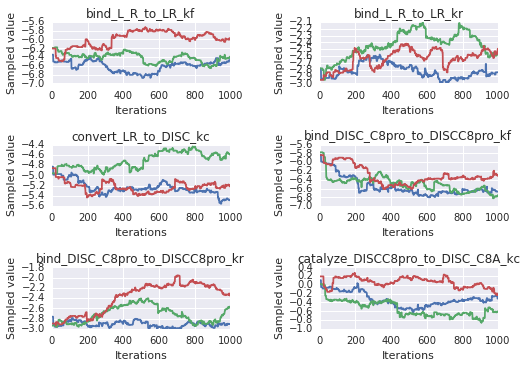

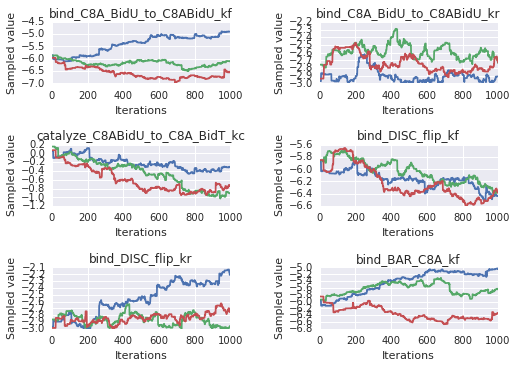

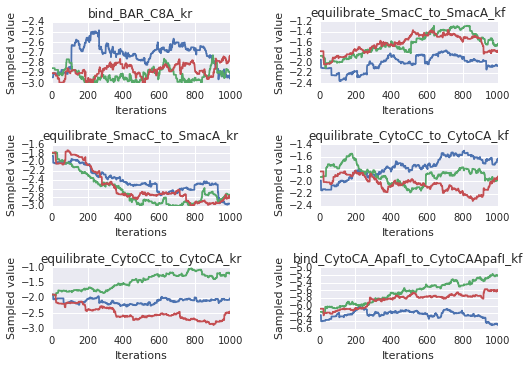

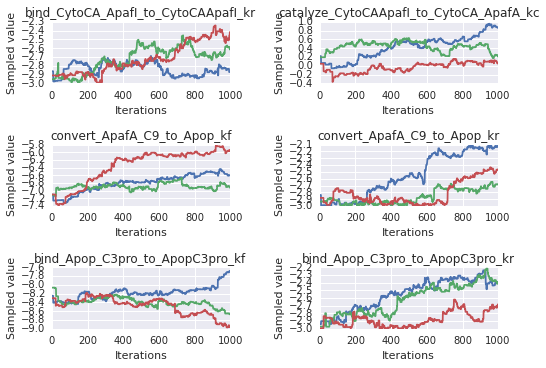

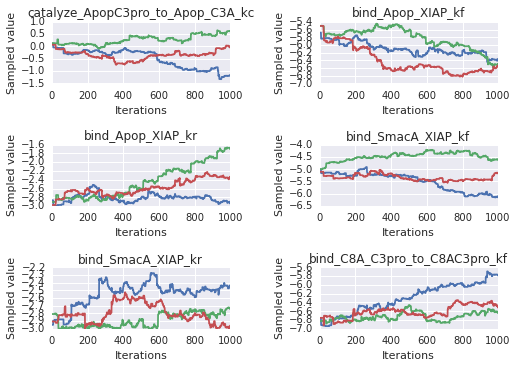

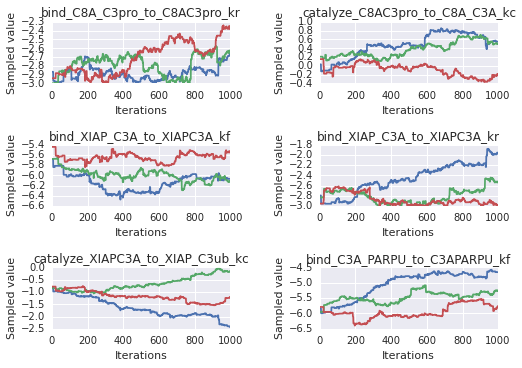

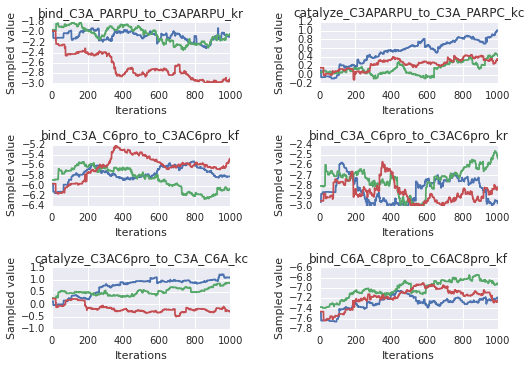

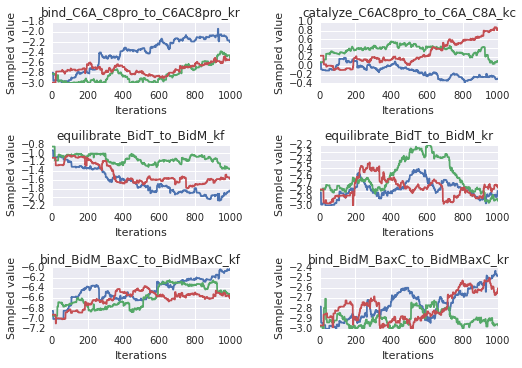

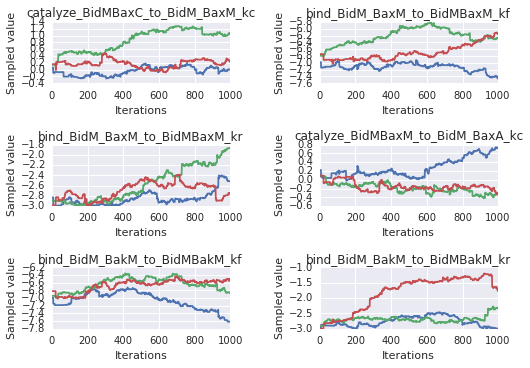

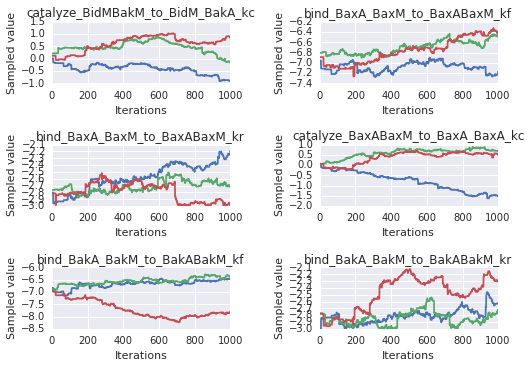

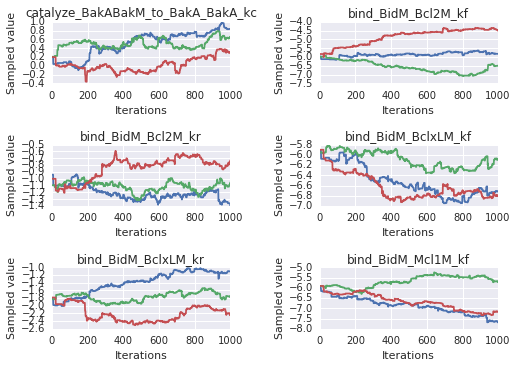

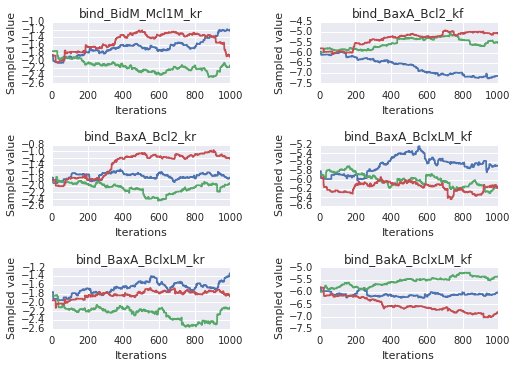

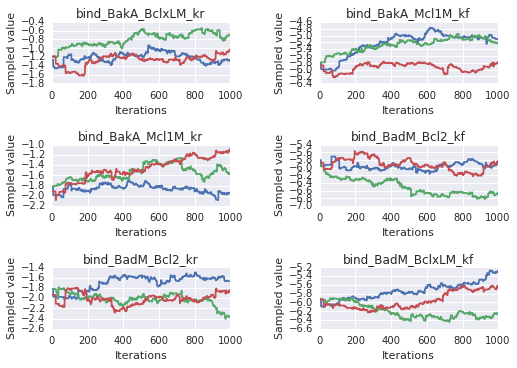

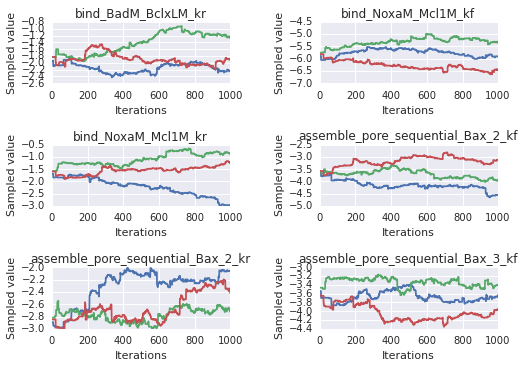

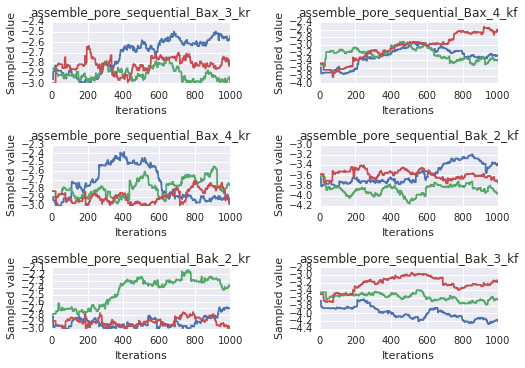

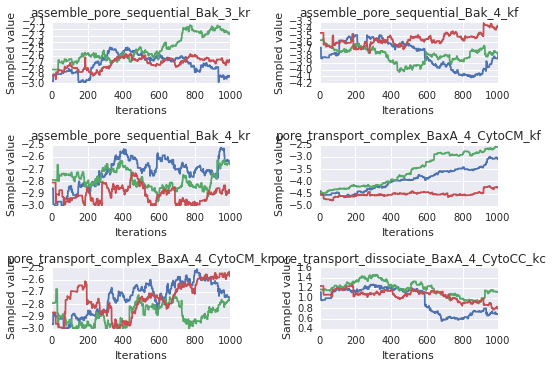

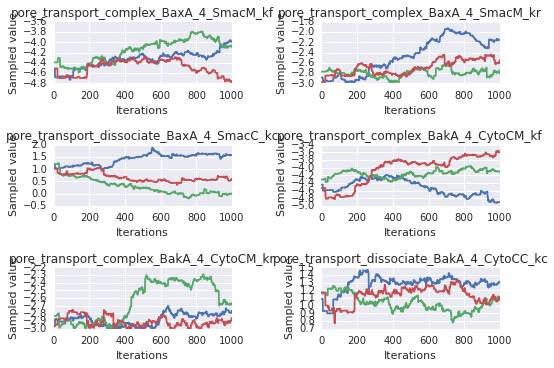

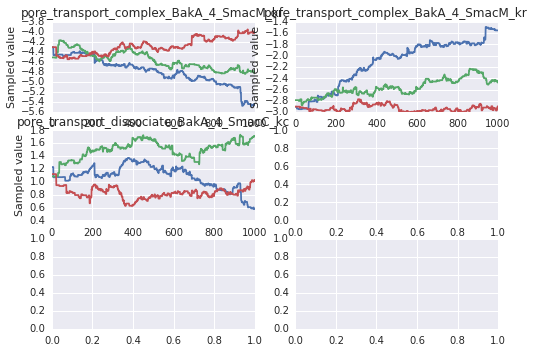

In [10]:
sample_plots(param_trace_dicts['a'])

In [11]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=600, thin=1)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


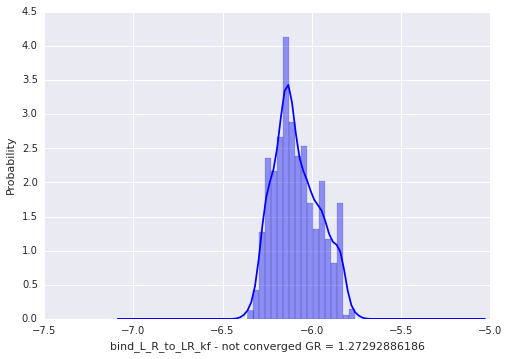

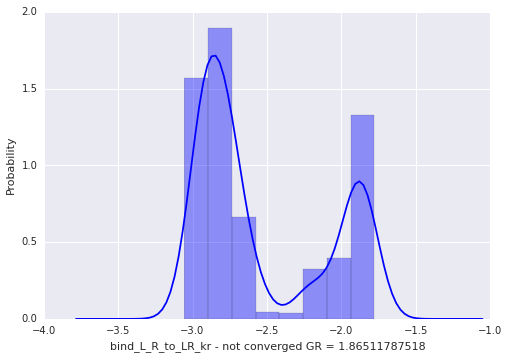

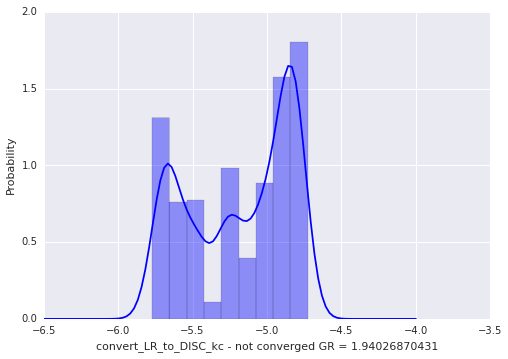

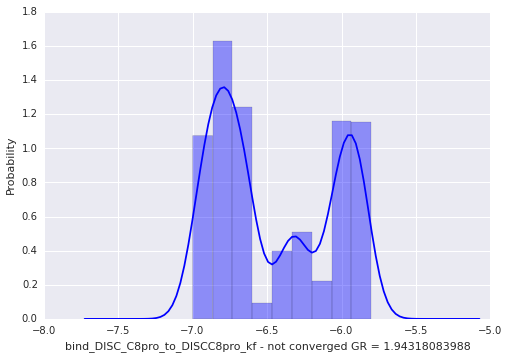

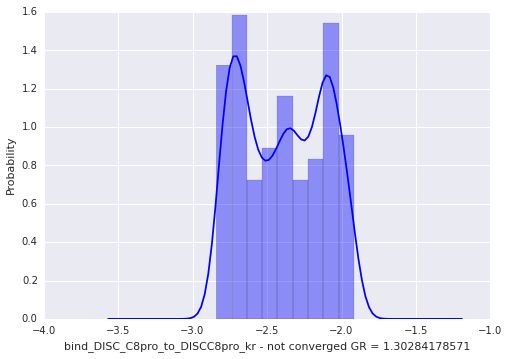

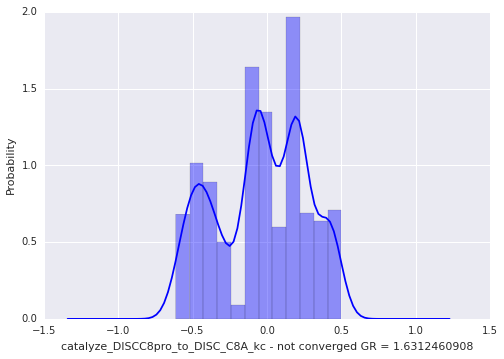

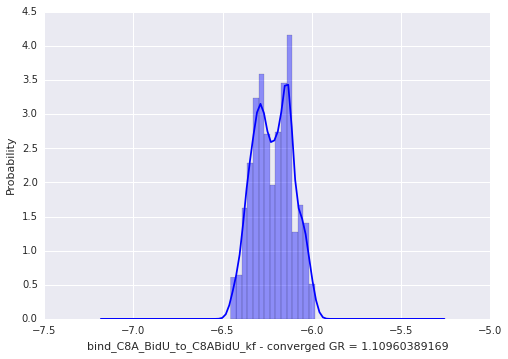

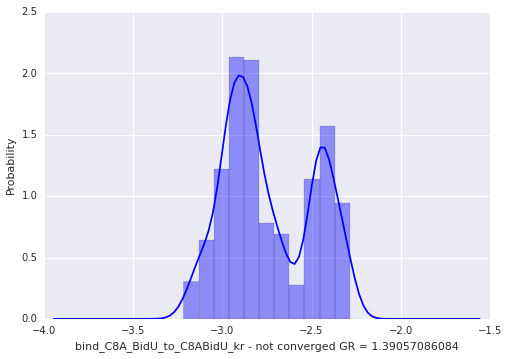

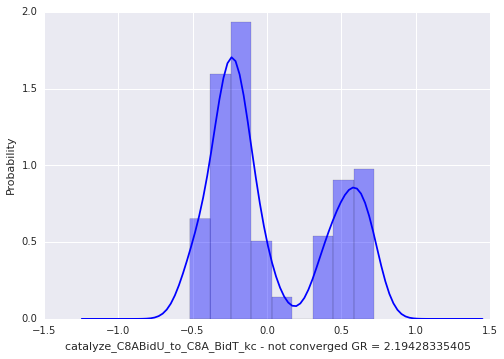

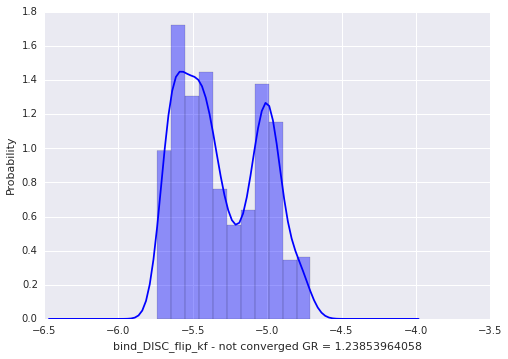

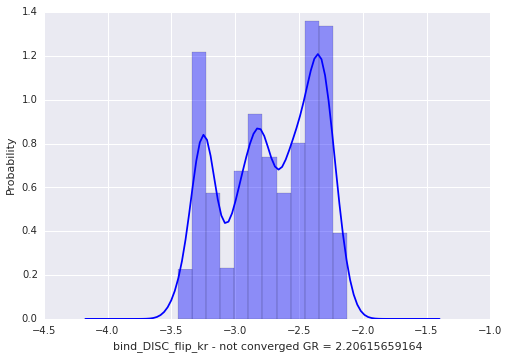

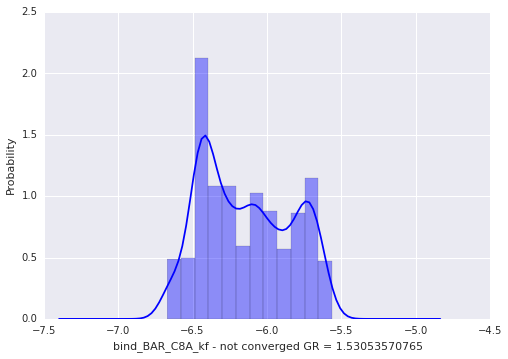

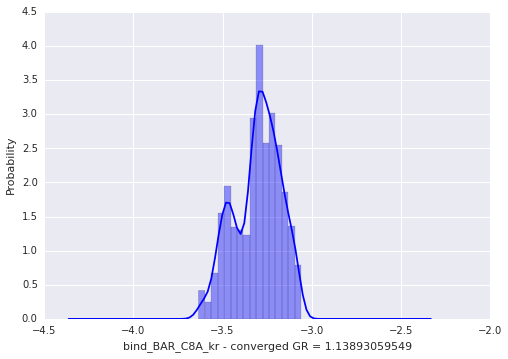

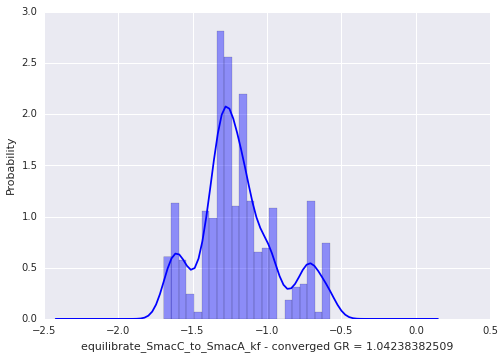

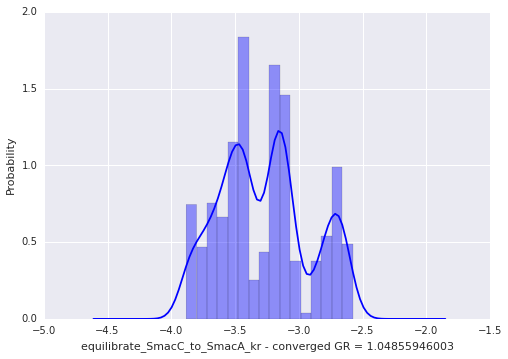

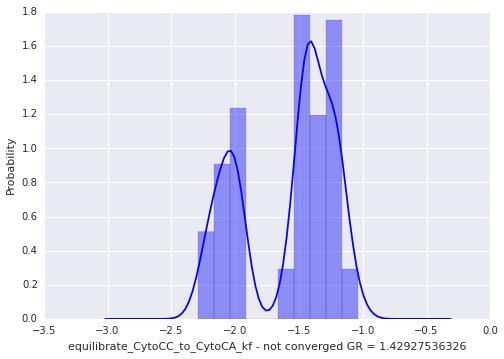

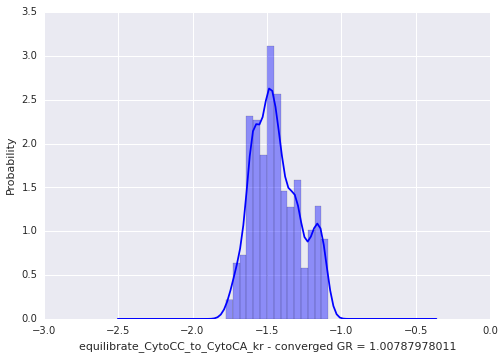

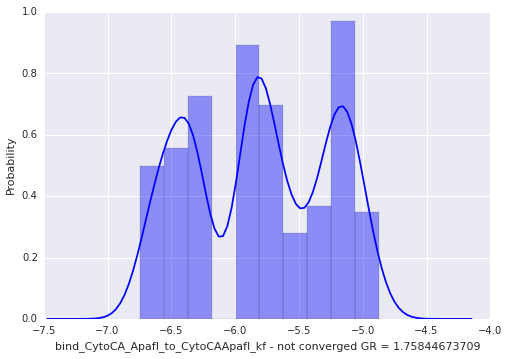

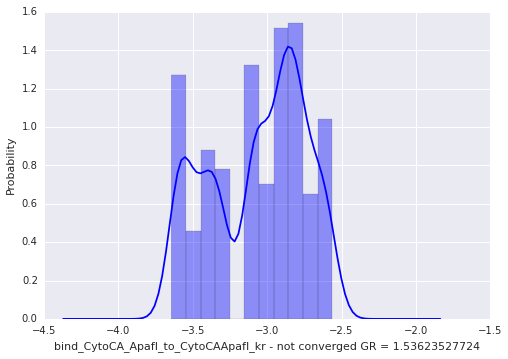

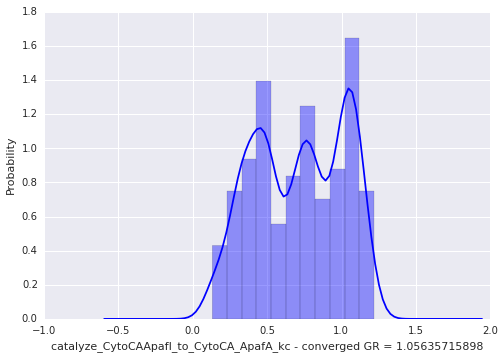

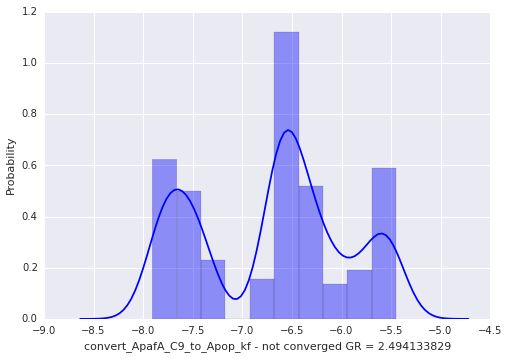

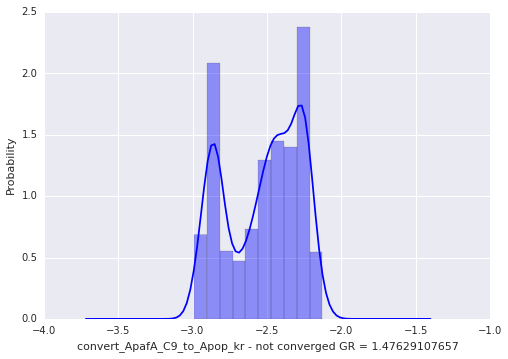

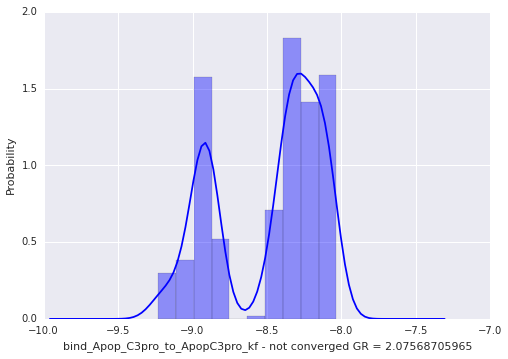

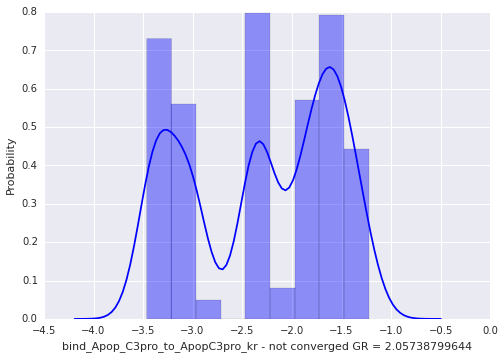

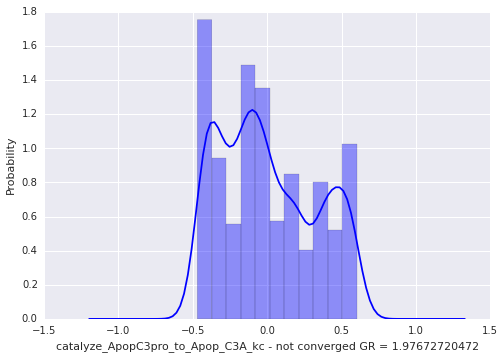

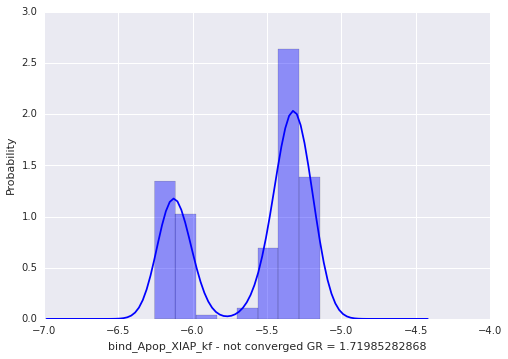

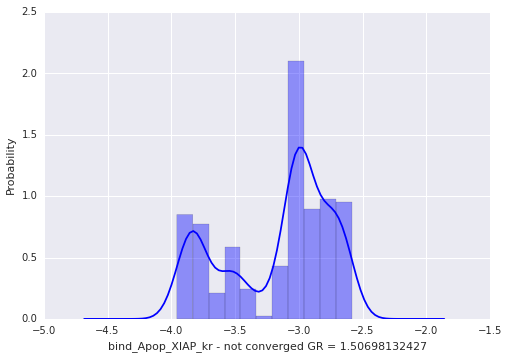

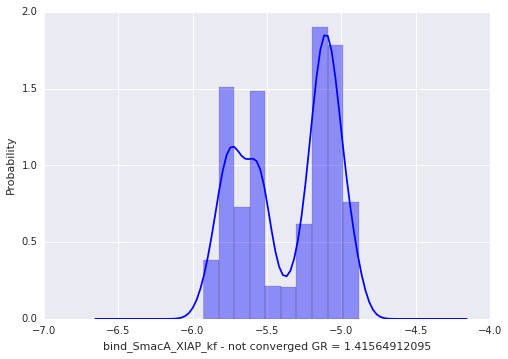

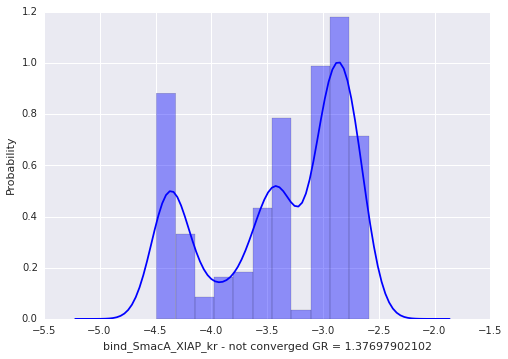

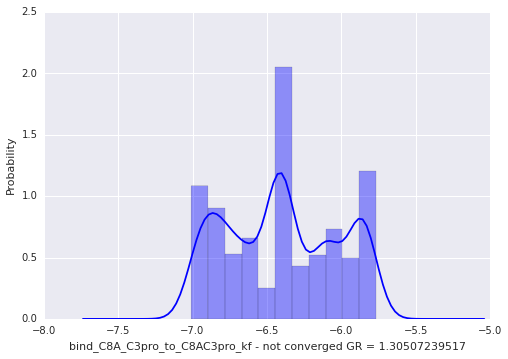

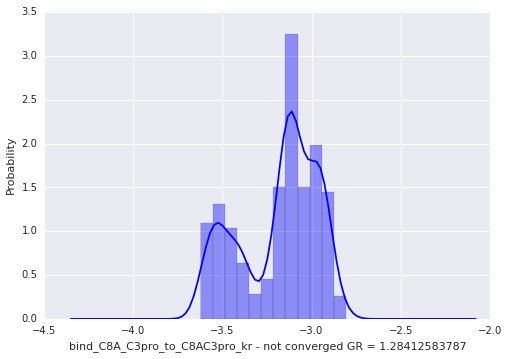

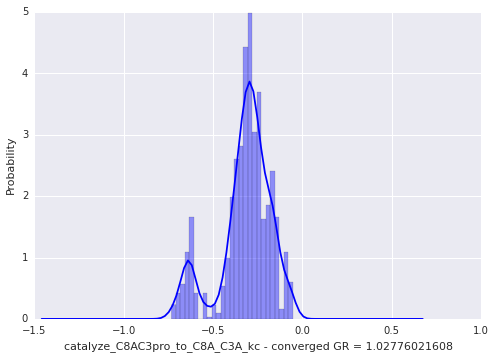

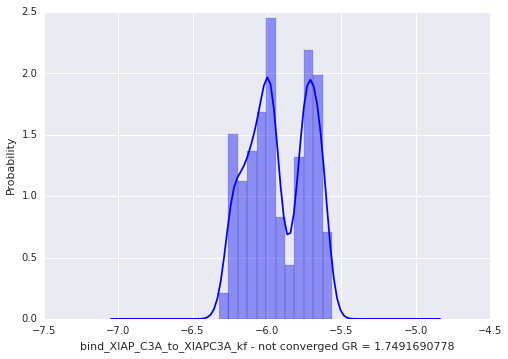

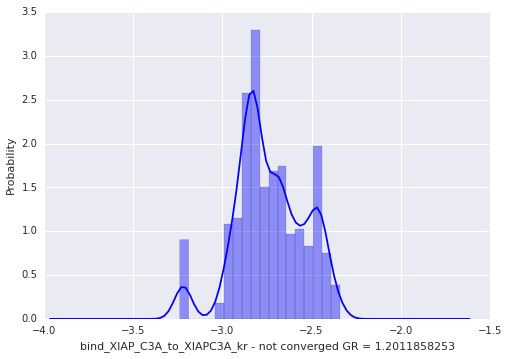

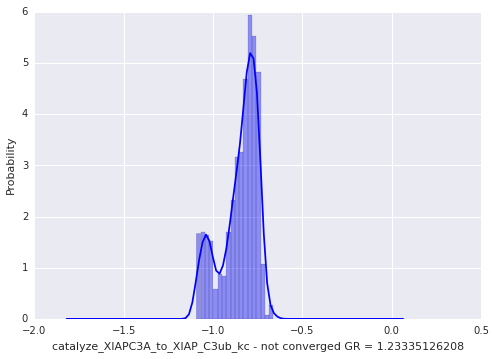

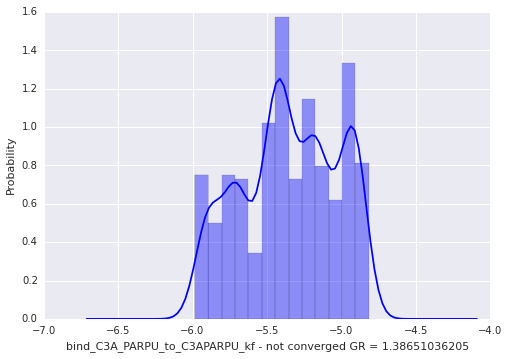

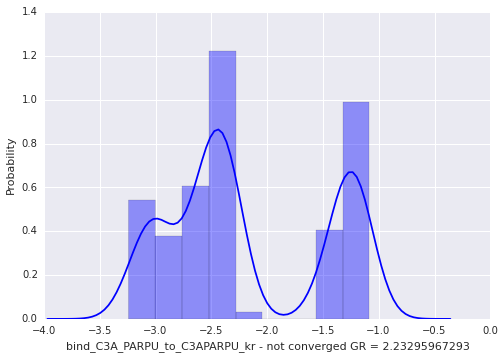

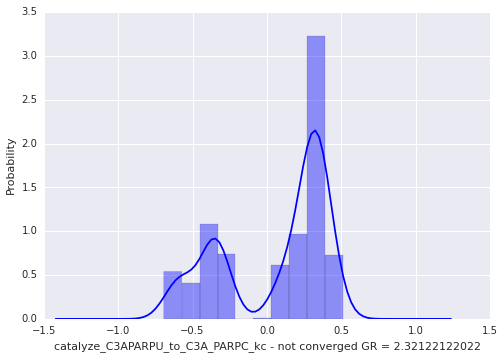

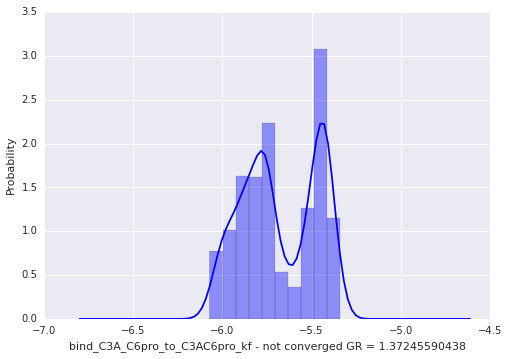

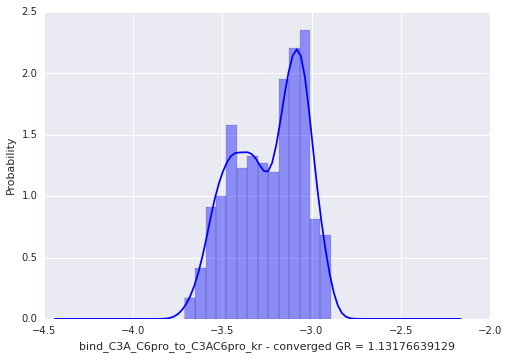

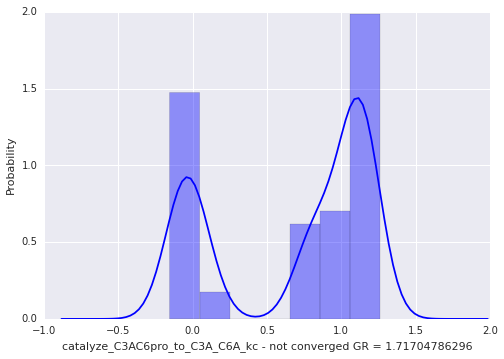

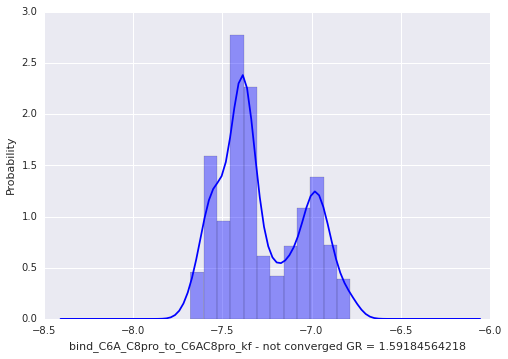

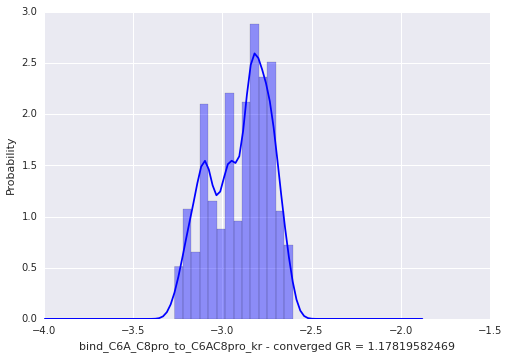

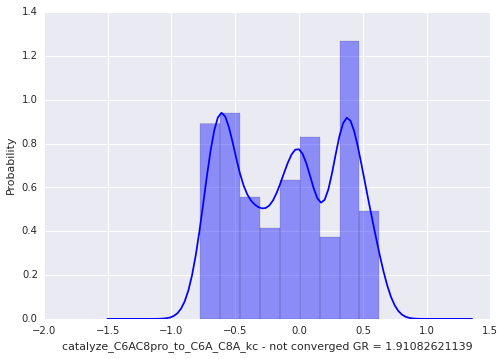

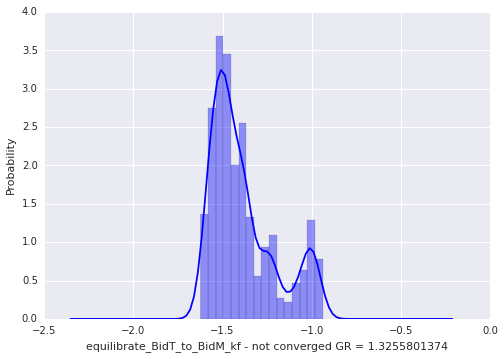

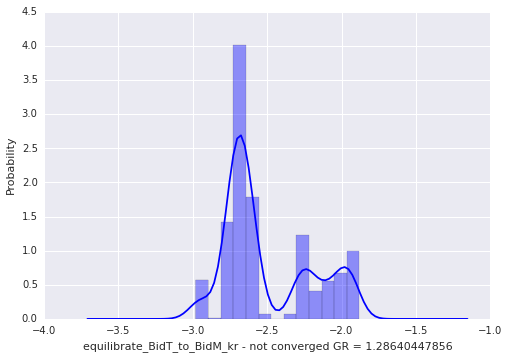

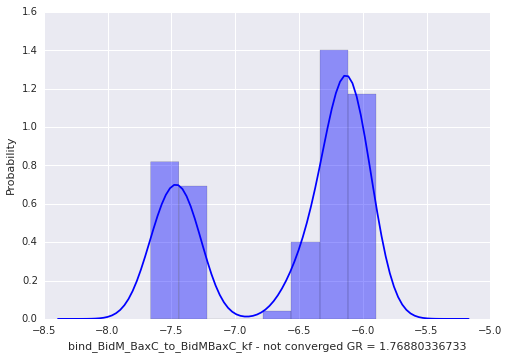

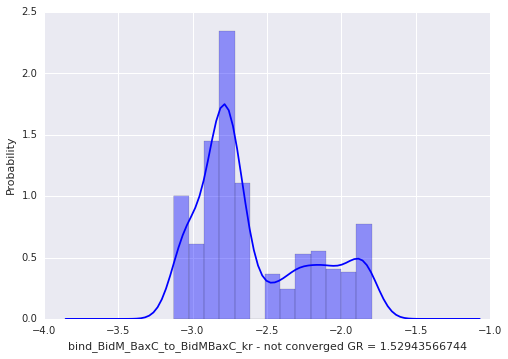

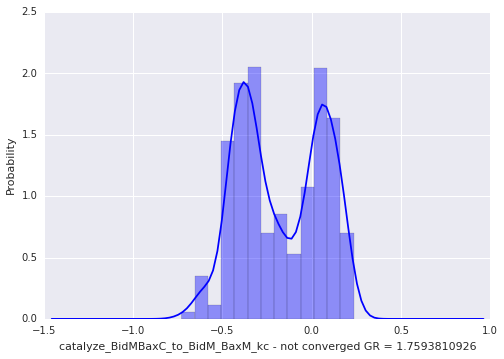

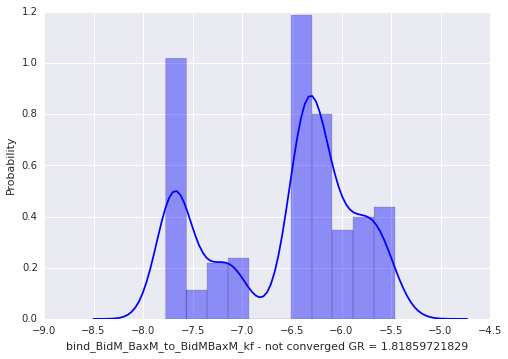

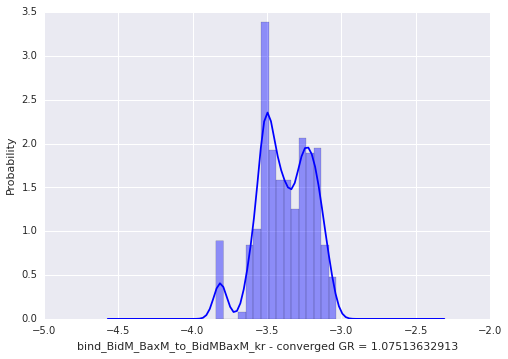

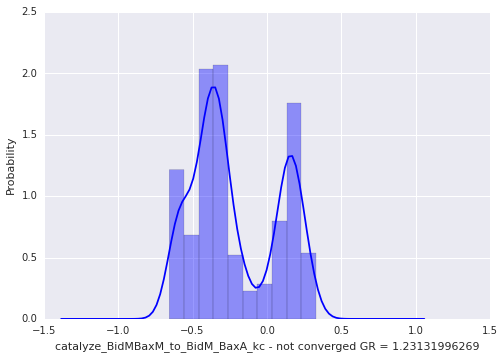

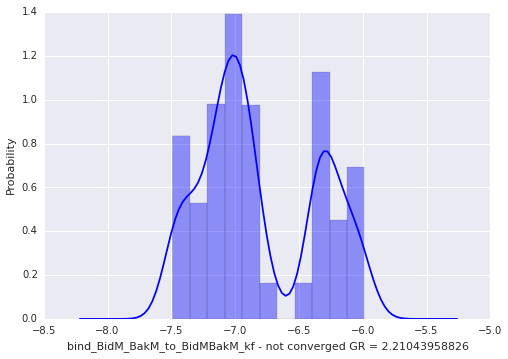

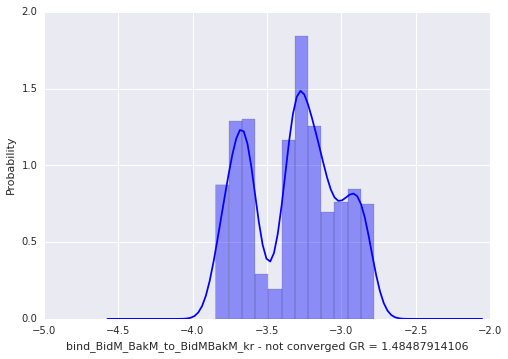

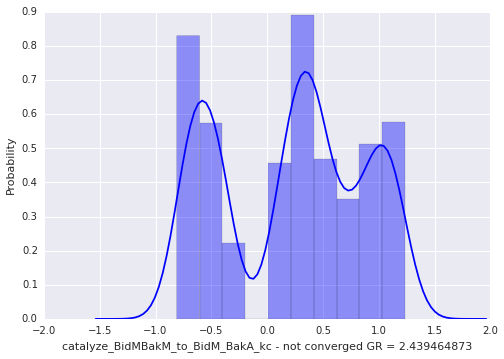

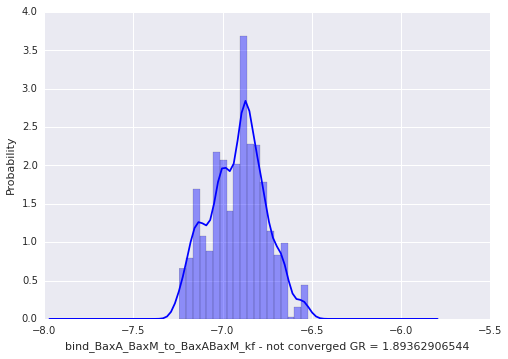

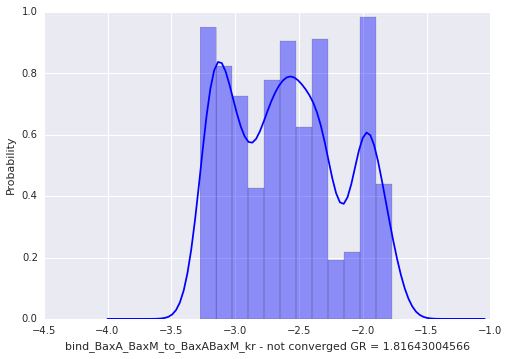

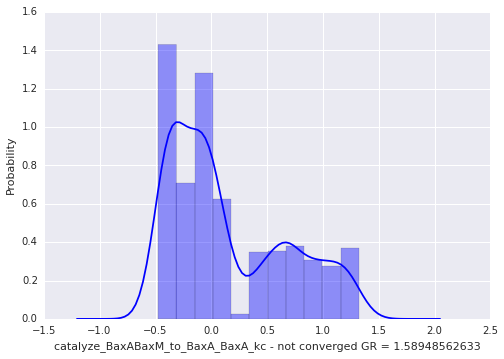

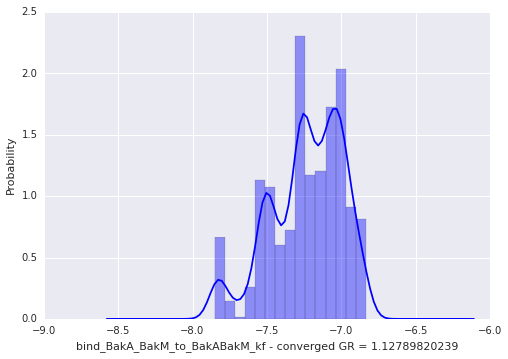

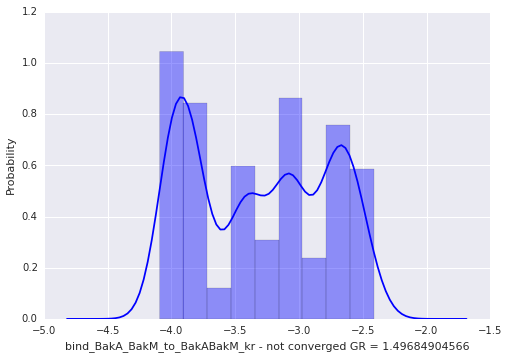

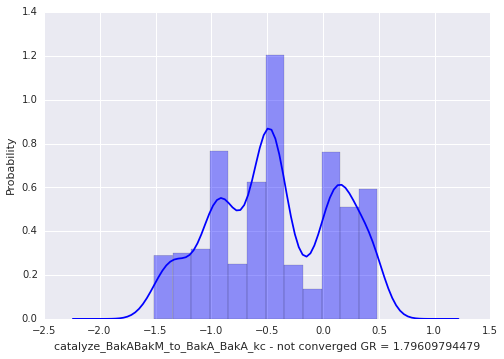

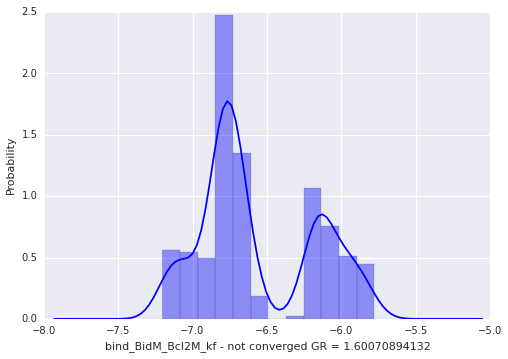

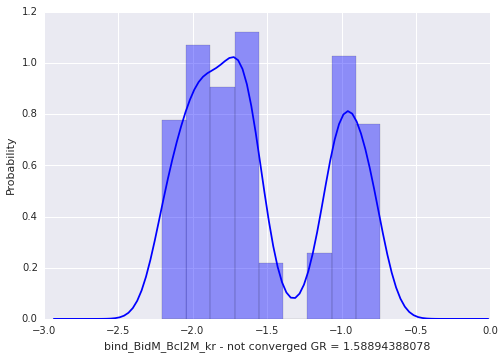

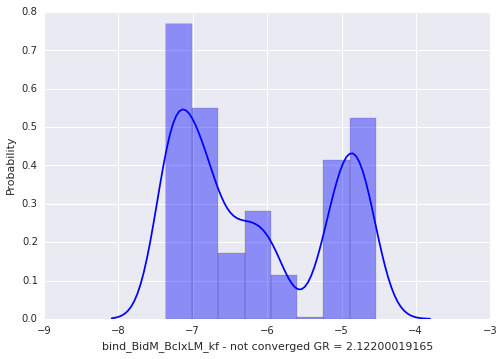

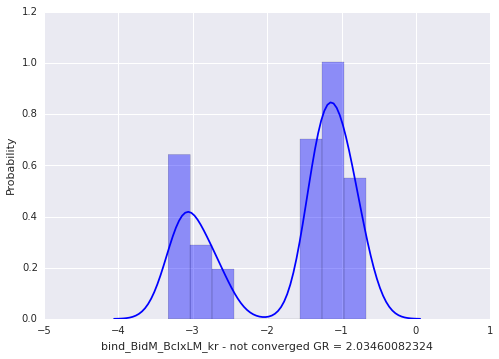

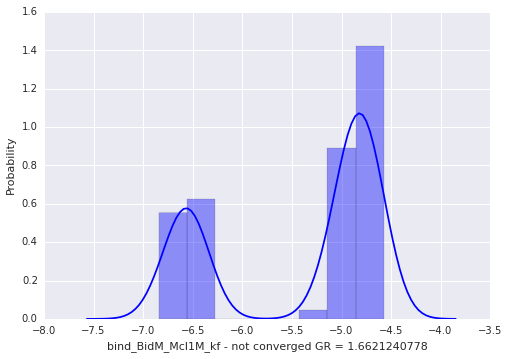

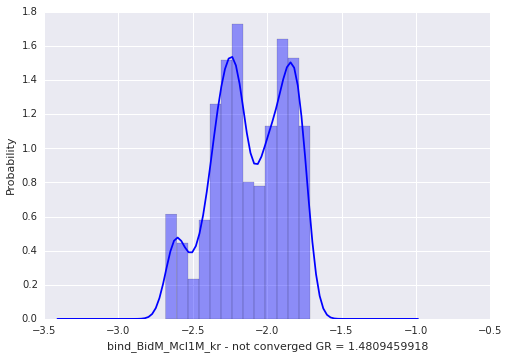

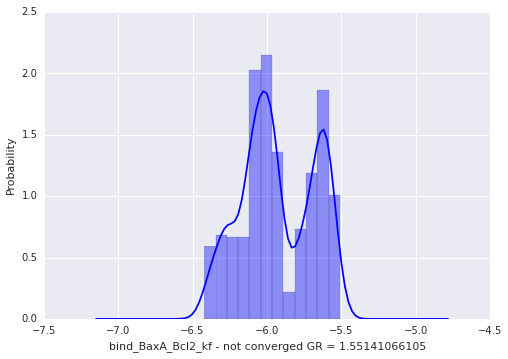

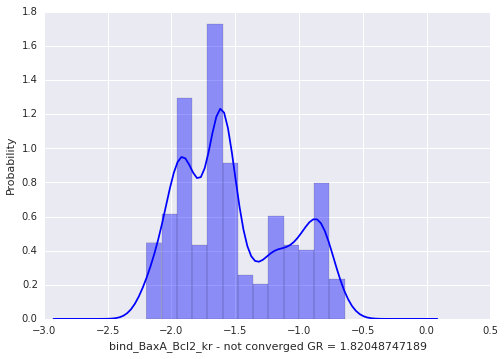

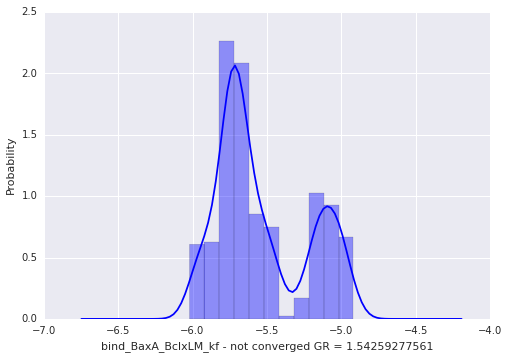

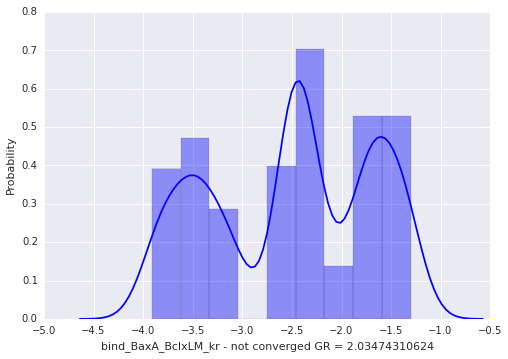

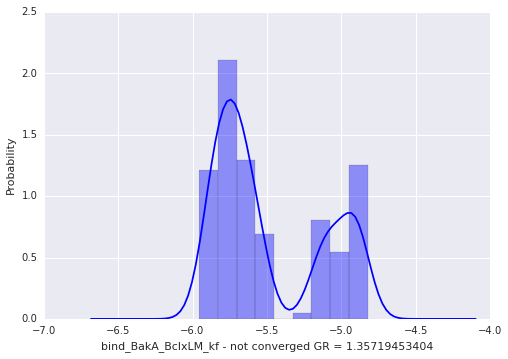

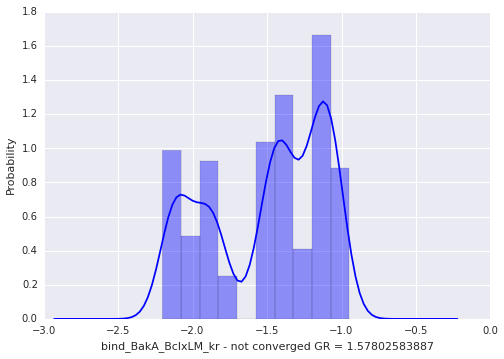

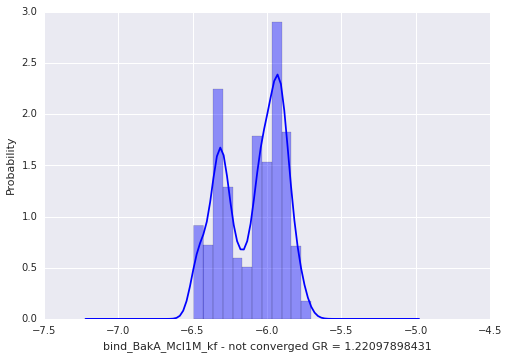

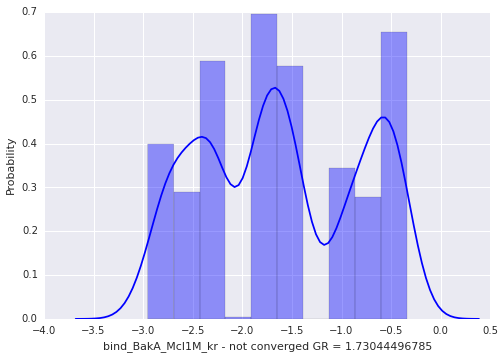

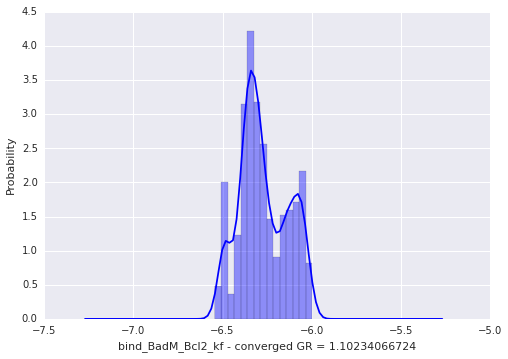

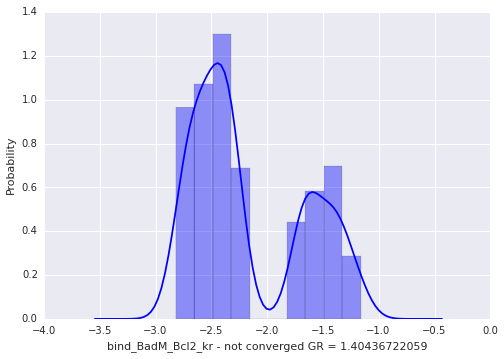

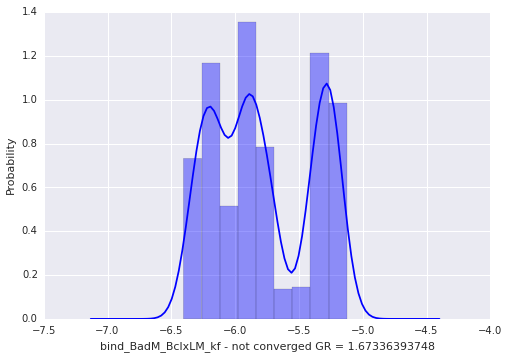

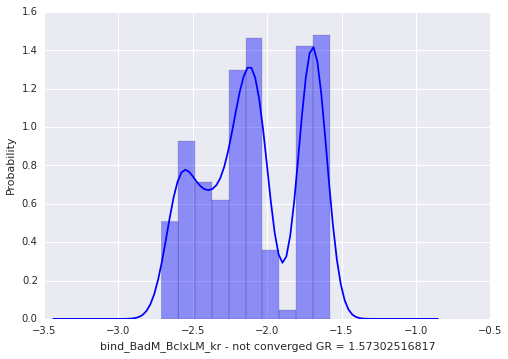

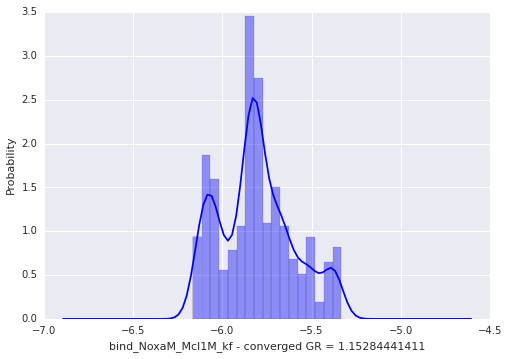

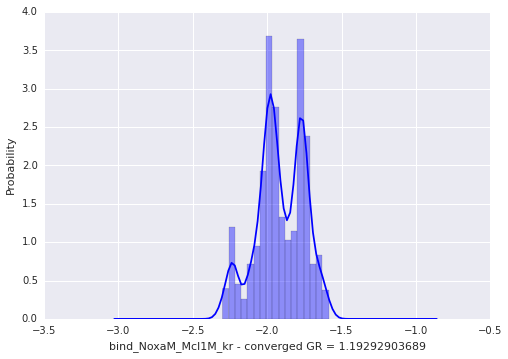

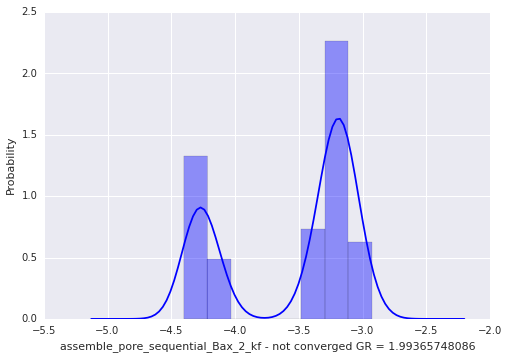

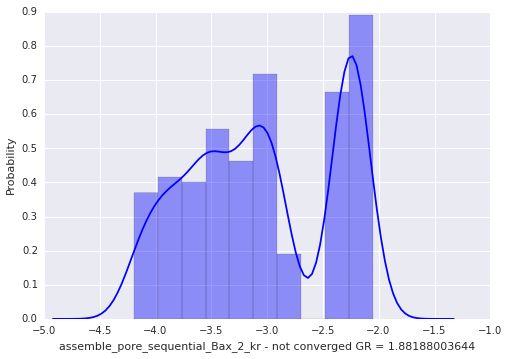

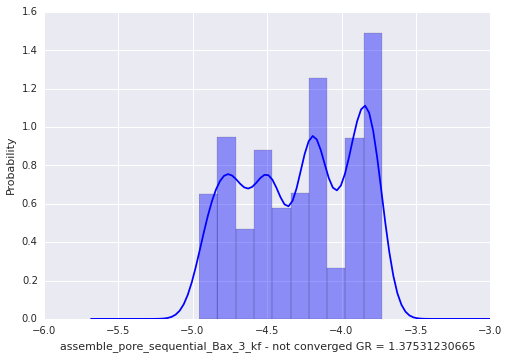

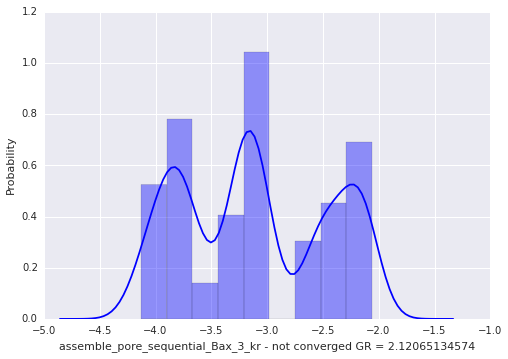

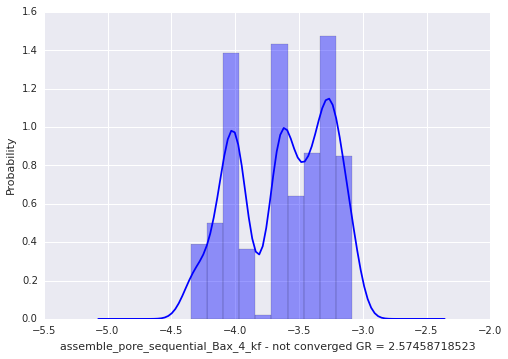

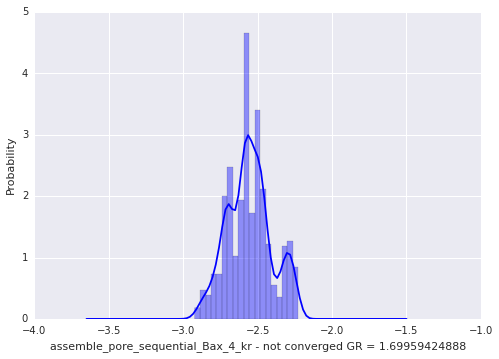

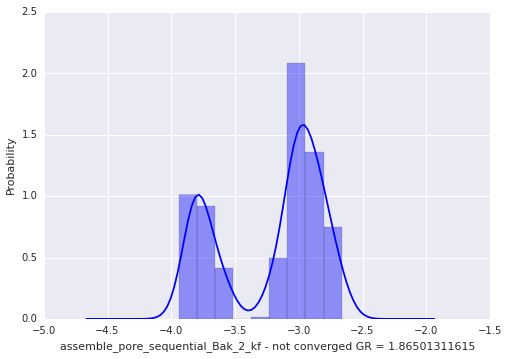

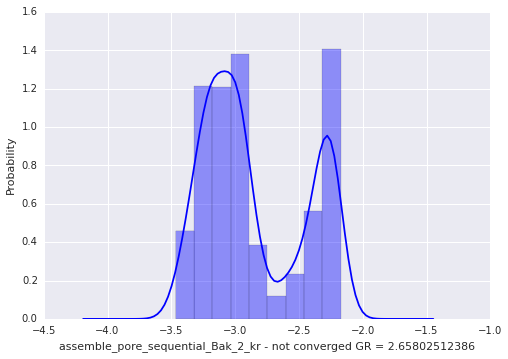

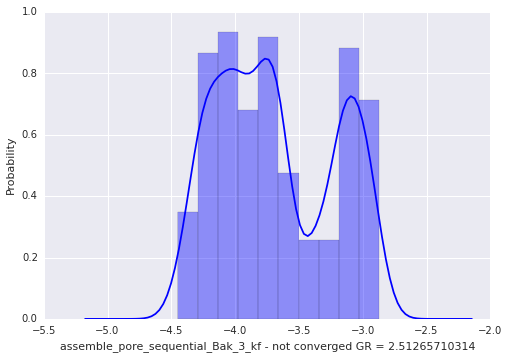

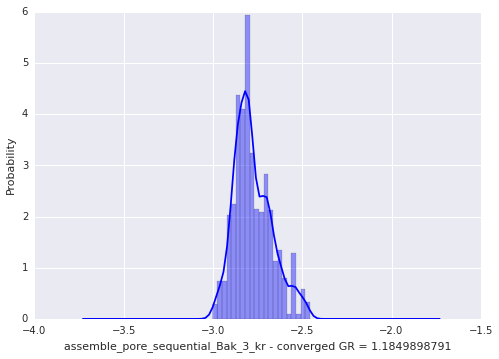

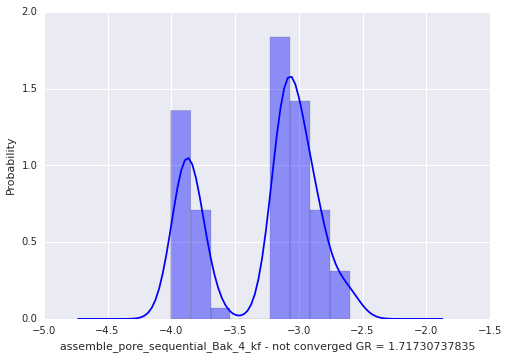

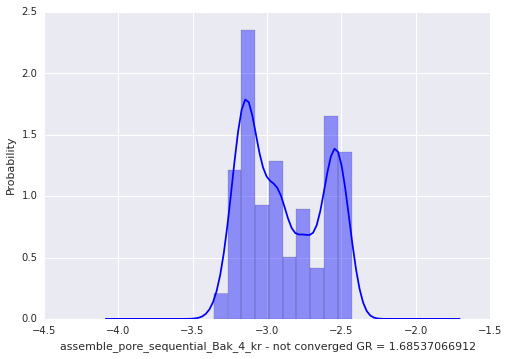

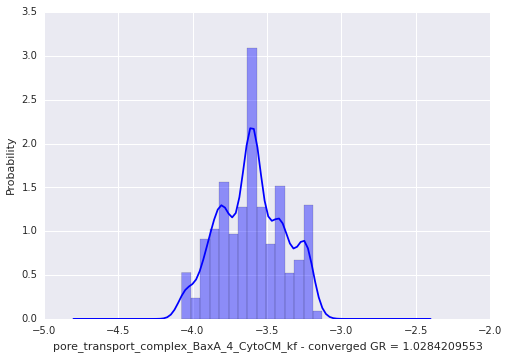

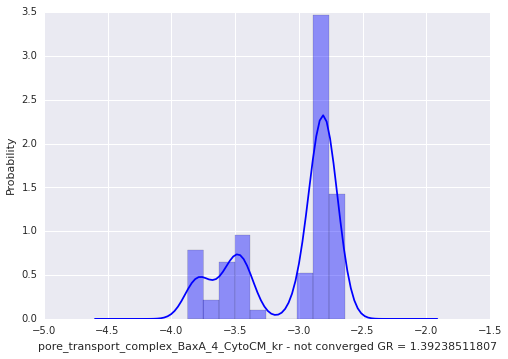

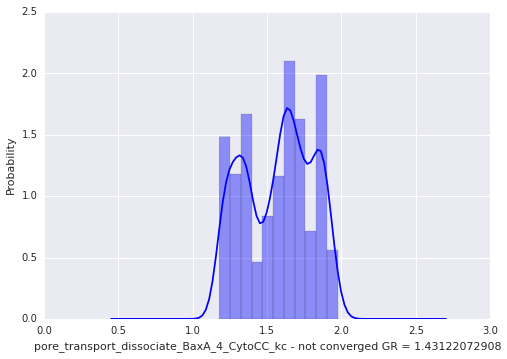

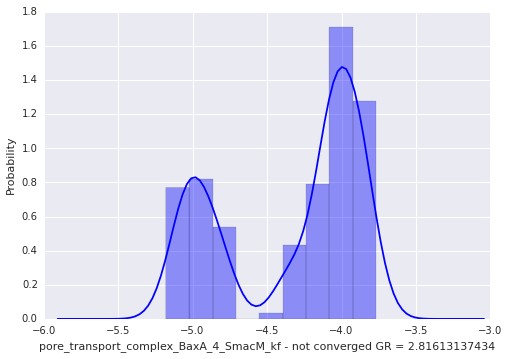

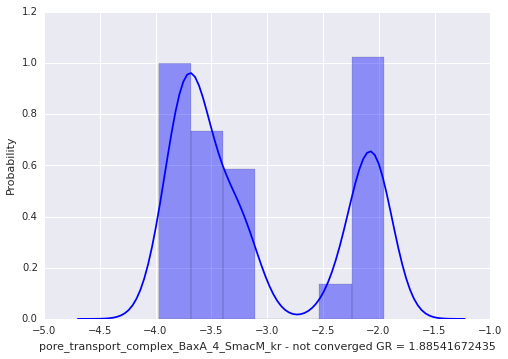

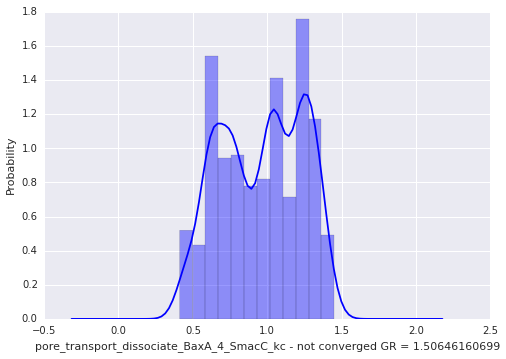

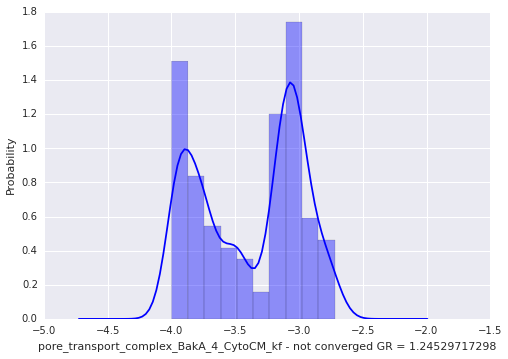

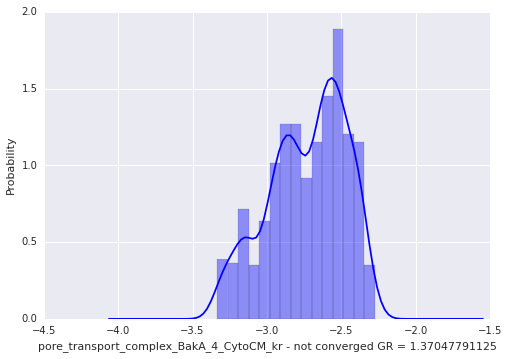

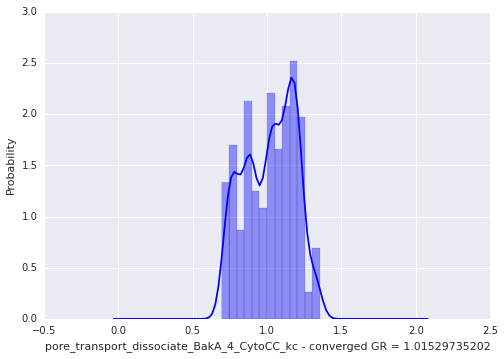

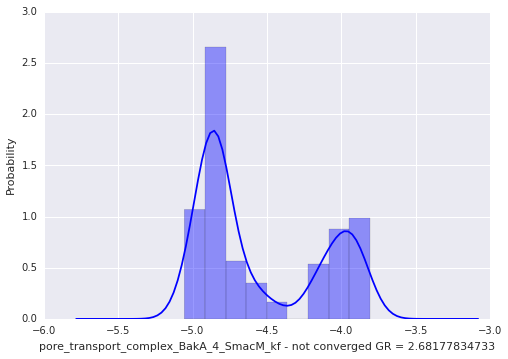

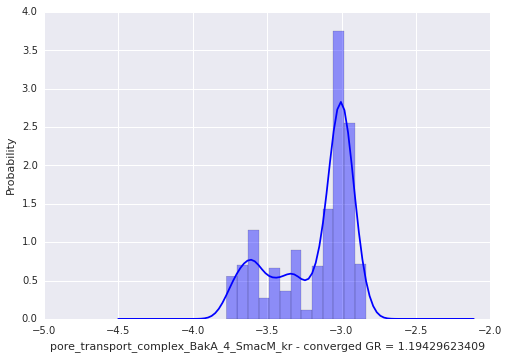

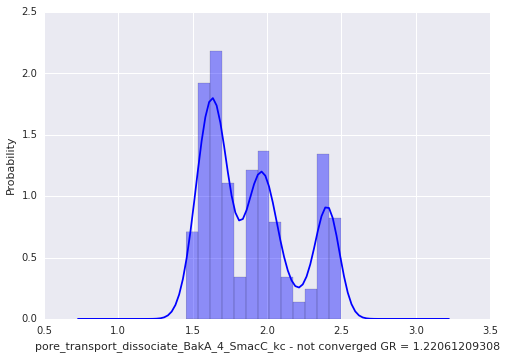

In [12]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True, color='b')
    if gelman_rubin_dicts['a'][param_name] < 1.2:
        sns.axlabel(param_name+' - converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    else:
        sns.axlabel(param_name+' - not converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')

In [12]:
traces['a'][1][:,0]

array([-6.19411699, -6.19411699, -6.19411699, -6.19411699, -6.19411699,
       -6.19411699, -6.19411699, -6.19411699, -6.19411699, -6.19411699,
       -6.19411699, -6.19411699, -6.19411699, -6.19411699, -6.19411699,
       -6.19411699, -6.19411699, -6.17963898, -6.17963898, -6.17963898,
       -6.17963898, -6.17963898, -6.17963898, -6.17963898, -6.17963898,
       -6.17963898, -6.17963898, -6.17963898, -6.17963898, -6.17963898,
       -6.17963898, -6.23957843, -6.23957843, -6.23957843, -6.23957843,
       -6.23957843, -6.28117129, -6.28117129, -6.28117129, -6.28117129,
       -6.28117129, -6.28117129, -6.28117129, -6.28117129, -6.28117129,
       -6.28117129, -6.26536486, -6.26536486, -6.26536486, -6.26536486,
       -6.26536486, -6.26536486, -6.26536486, -6.26536486, -6.26536486,
       -6.27828954, -6.31246655, -6.32018034, -6.32018034, -6.32018034,
       -6.32018034, -6.35184889, -6.35184889, -6.35184889, -6.33054103,
       -6.33054103, -6.33054103, -6.33054103, -6.33054103, -6.33

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


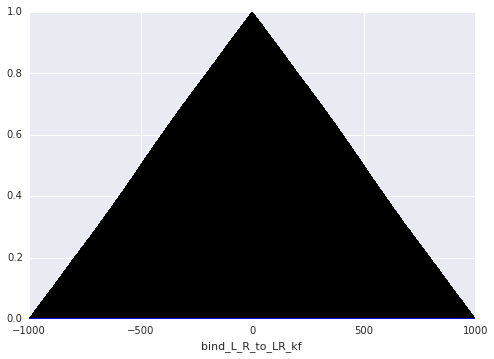

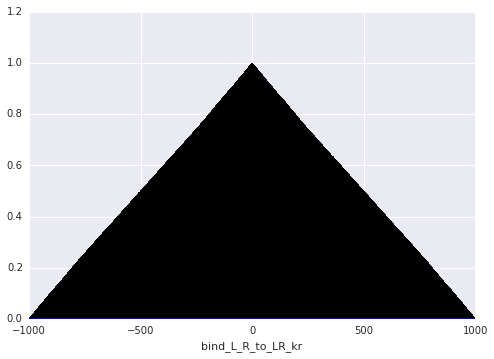

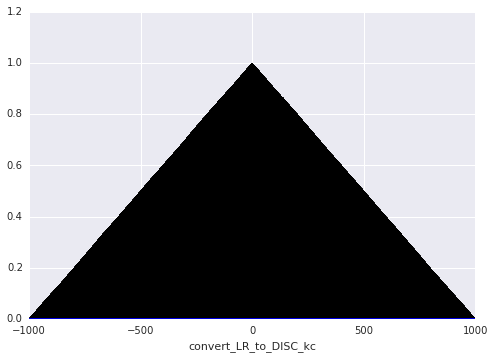

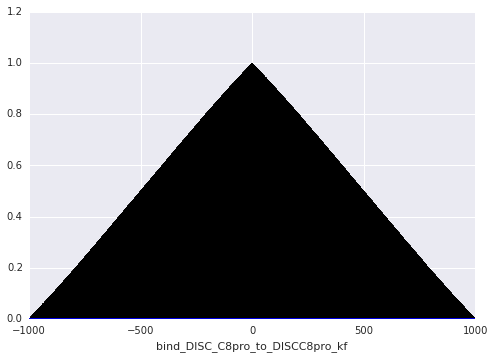

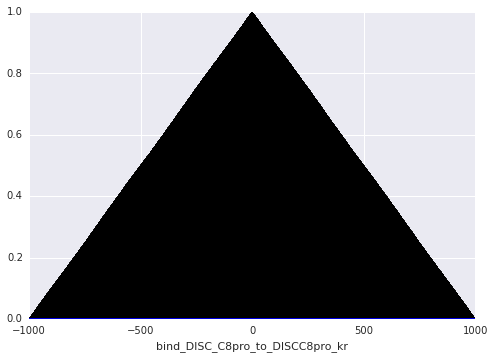

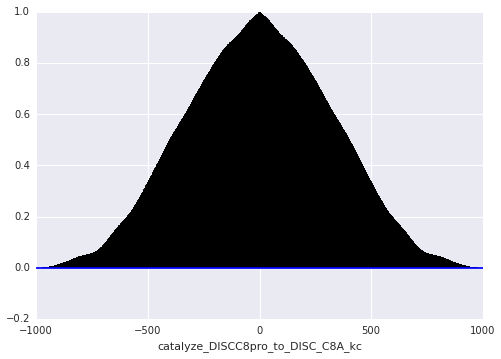

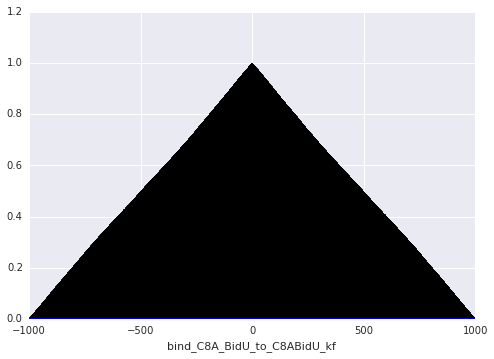

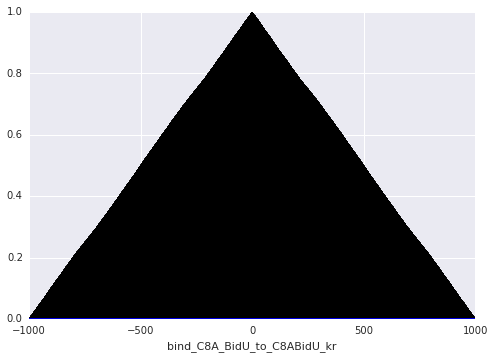

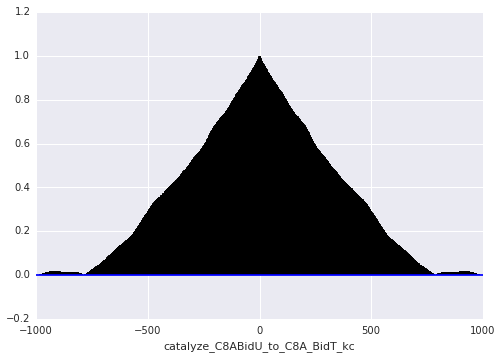

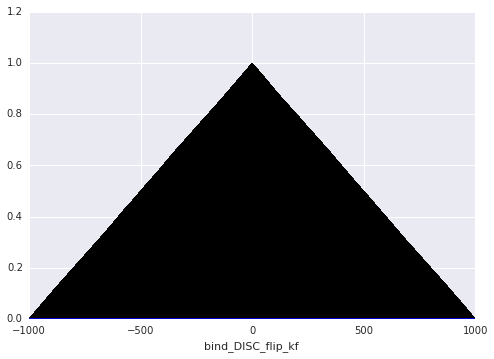

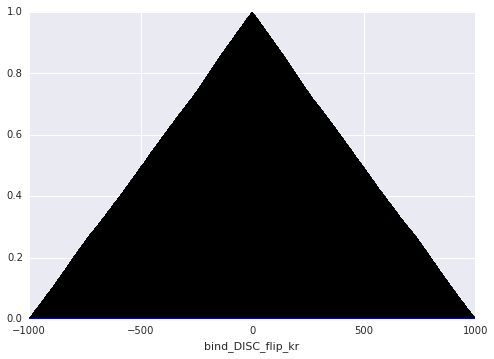

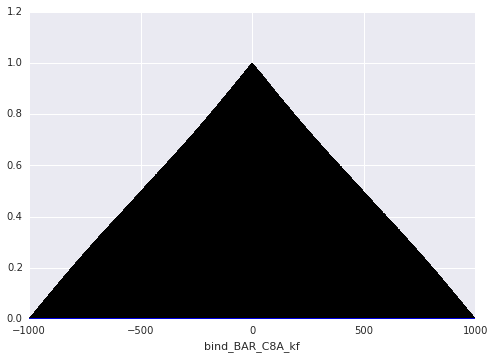

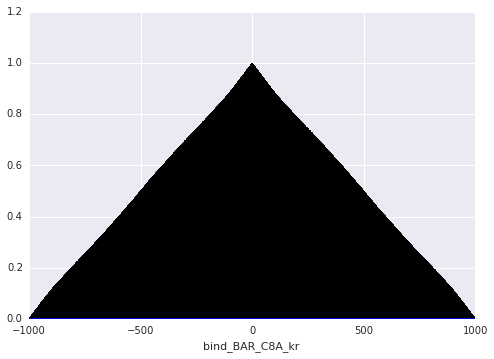

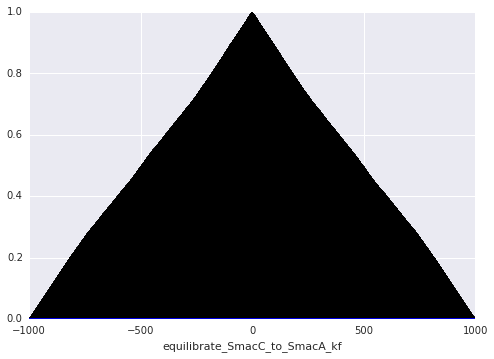

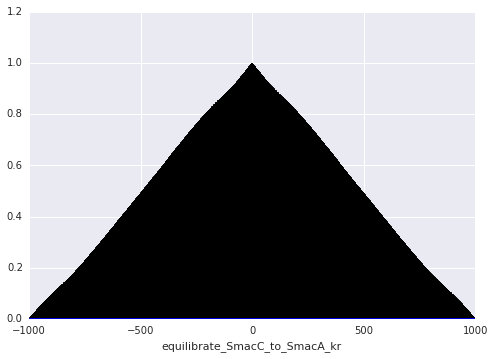

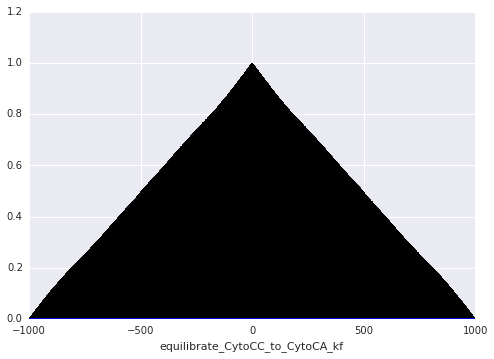

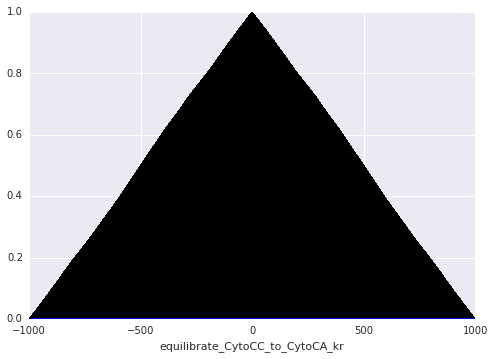

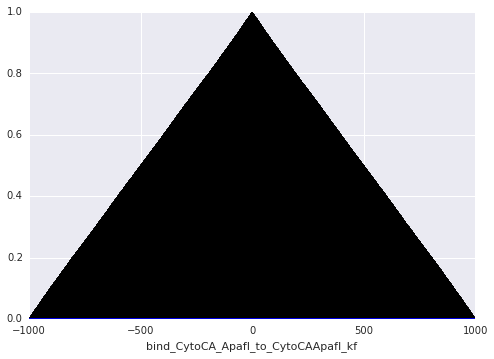

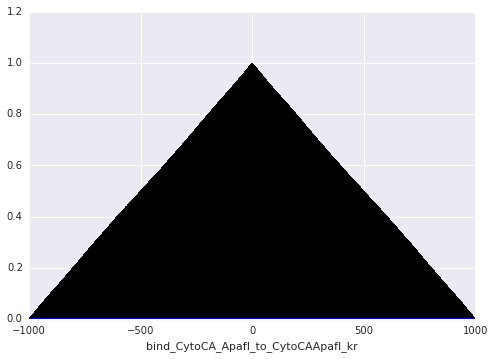

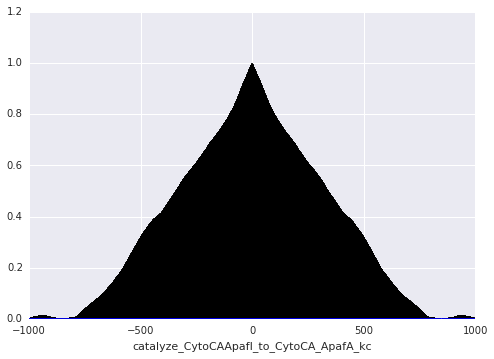

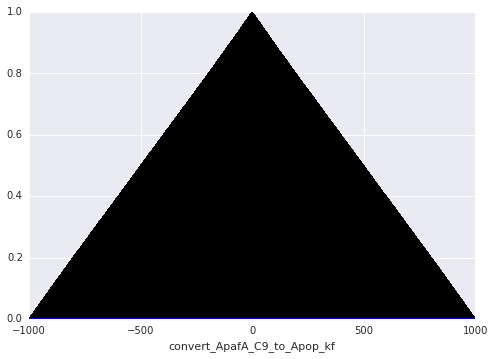

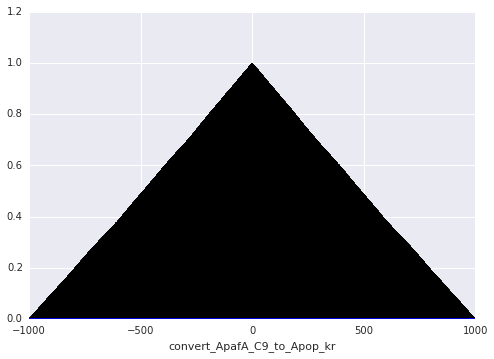

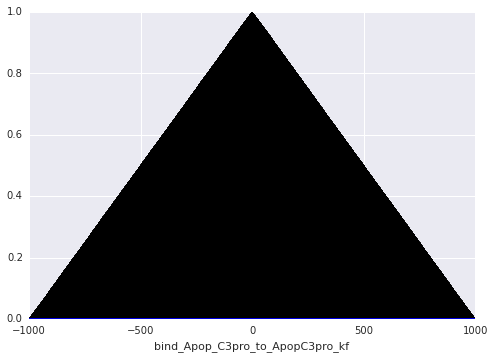

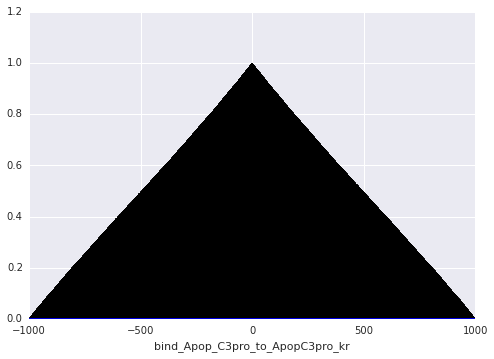

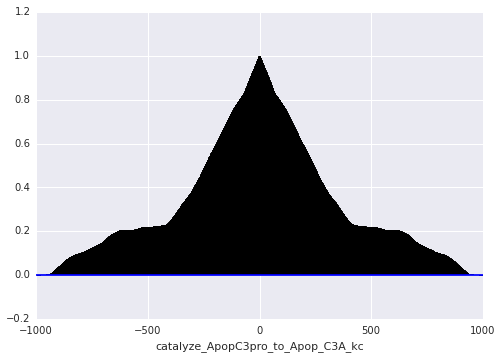

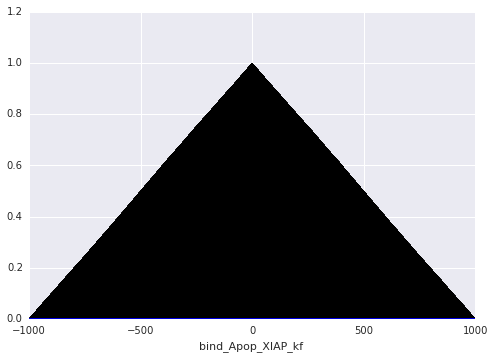

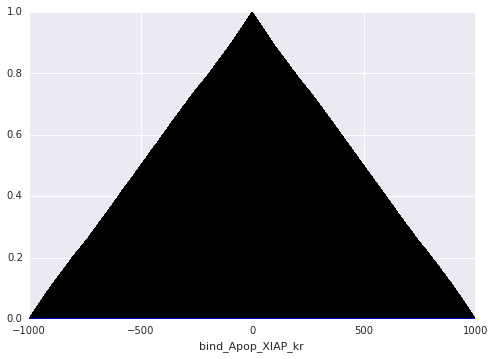

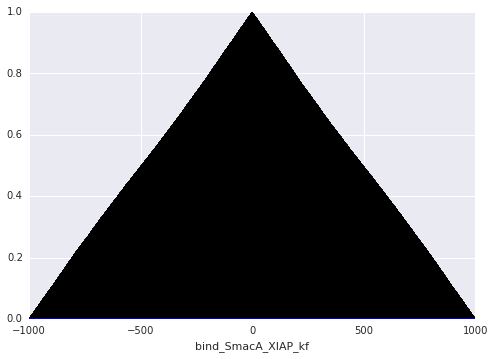

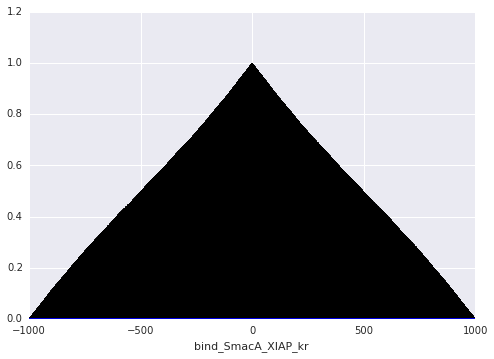

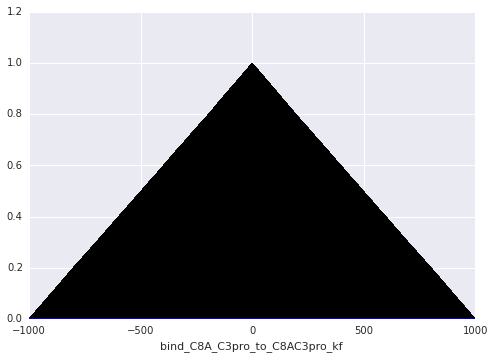

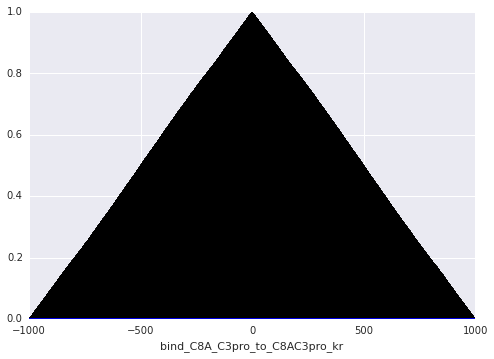

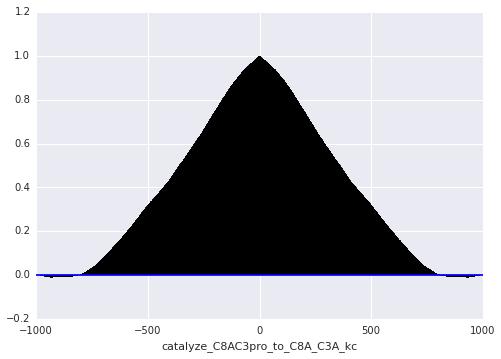

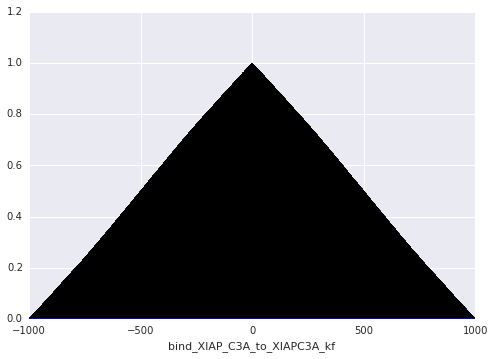

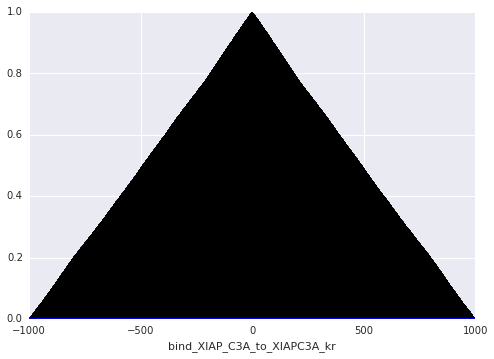

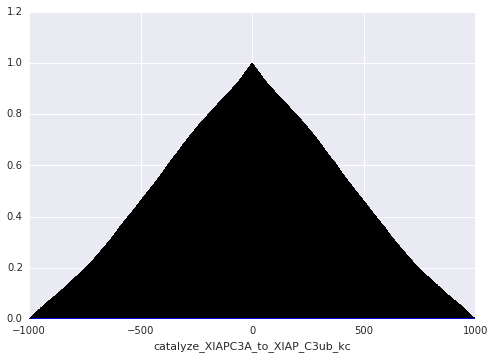

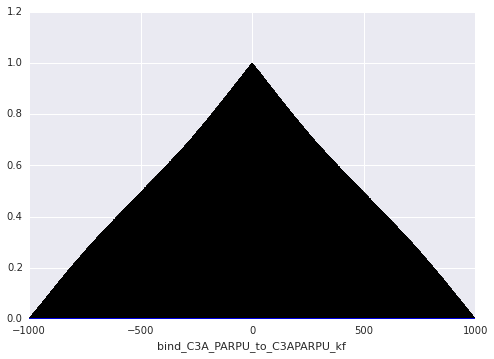

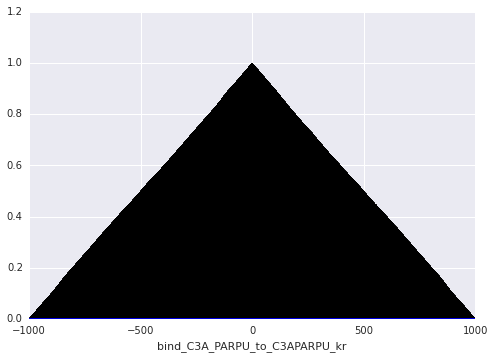

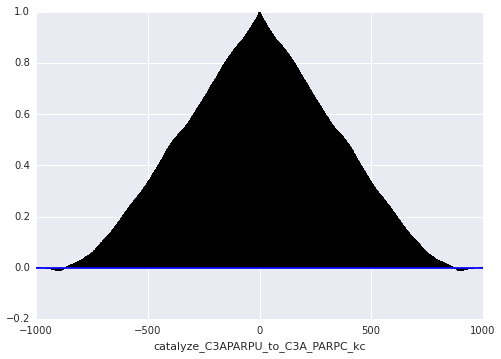

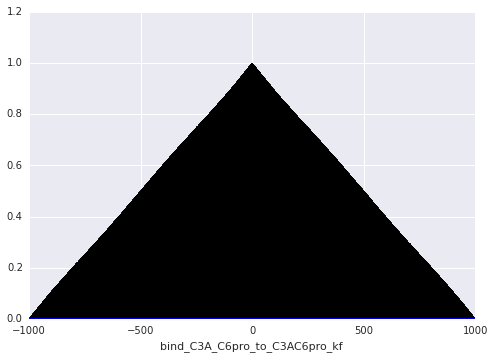

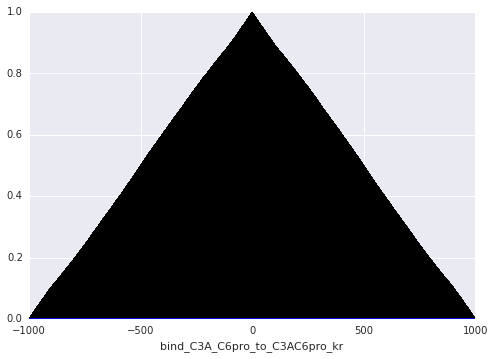

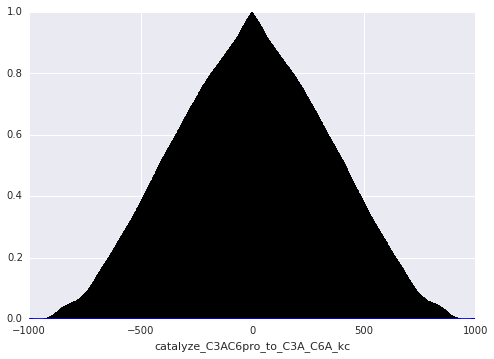

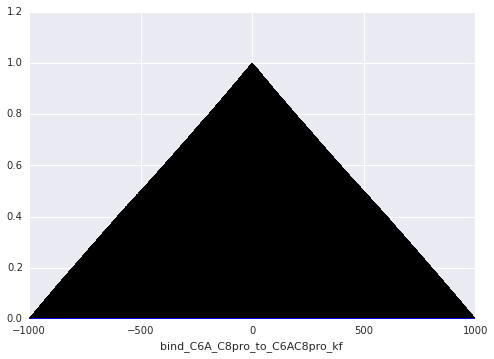

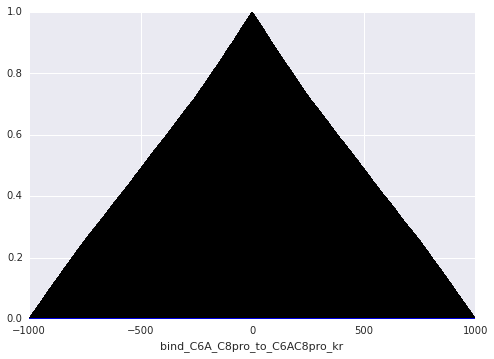

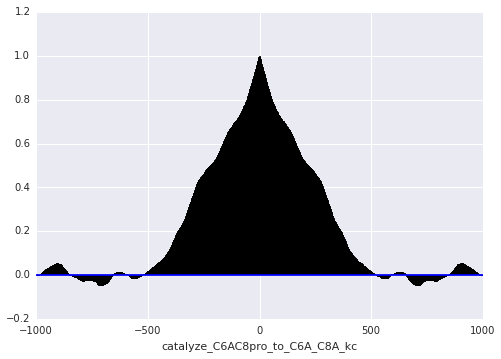

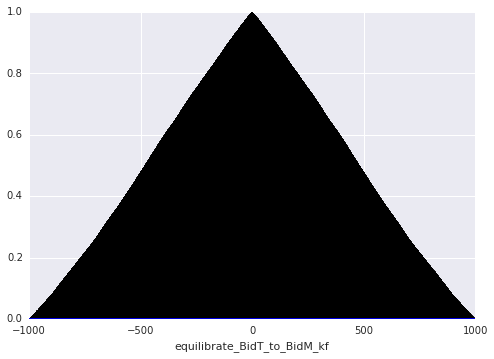

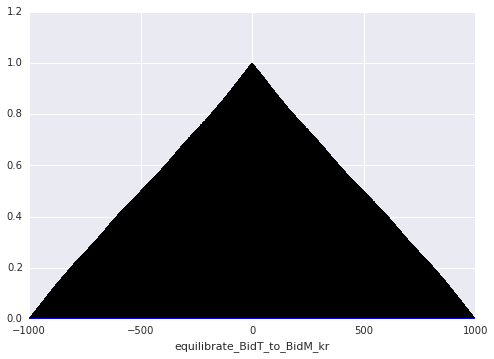

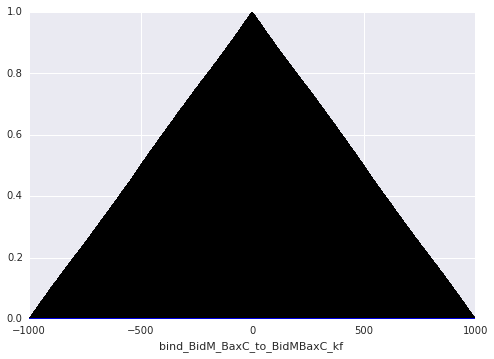

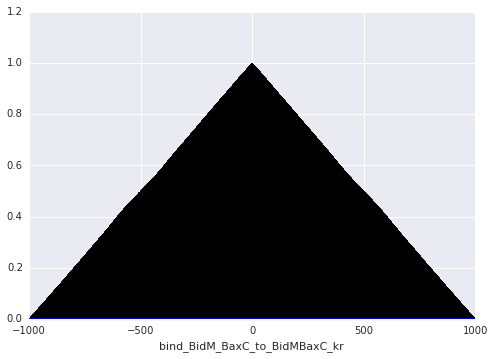

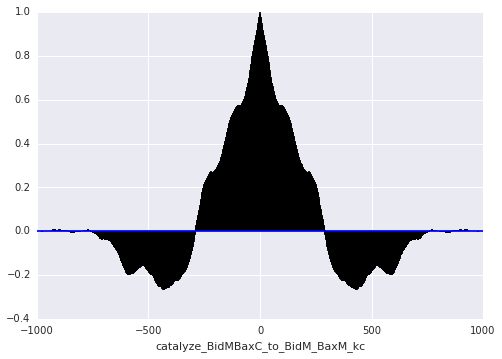

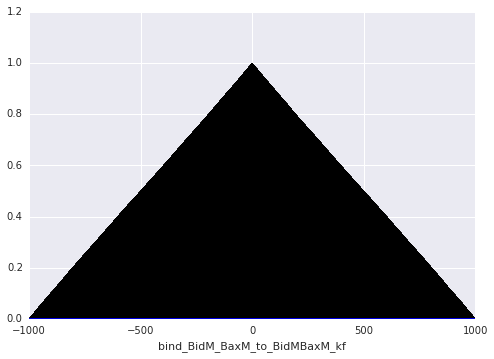

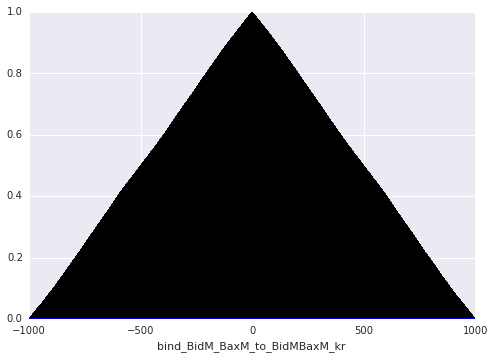

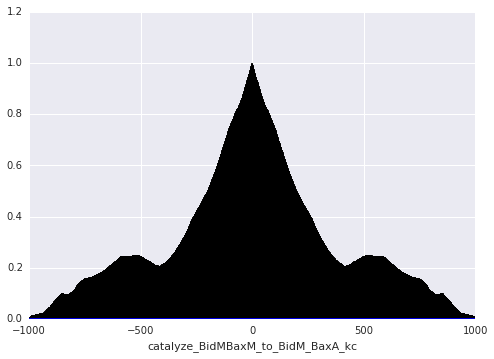

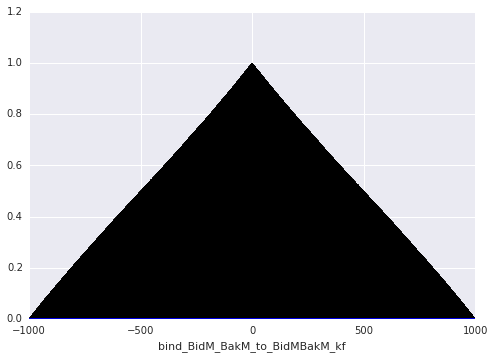

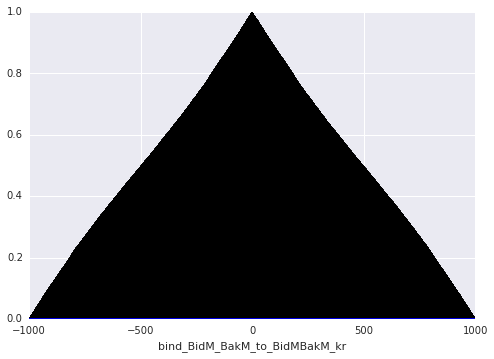

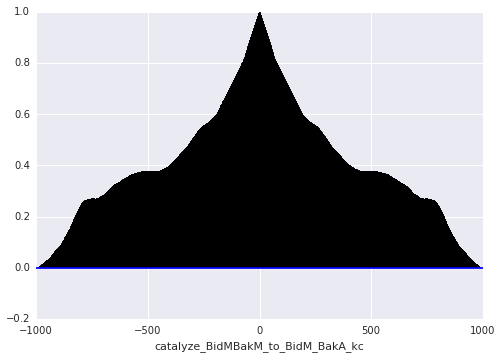

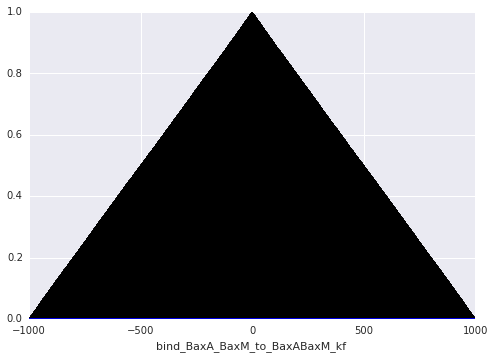

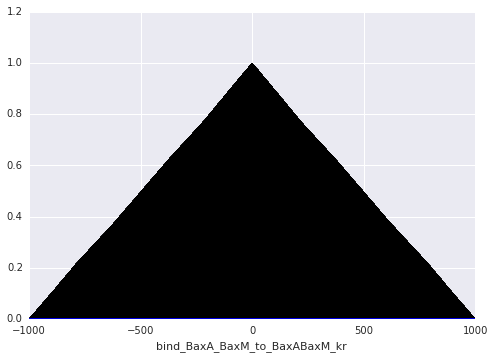

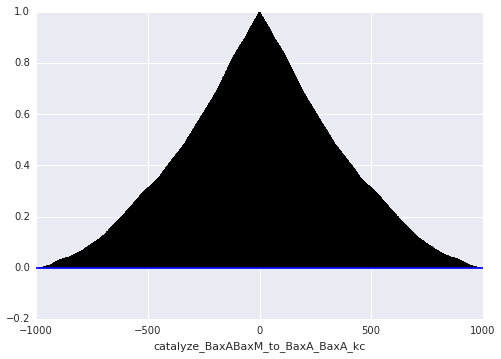

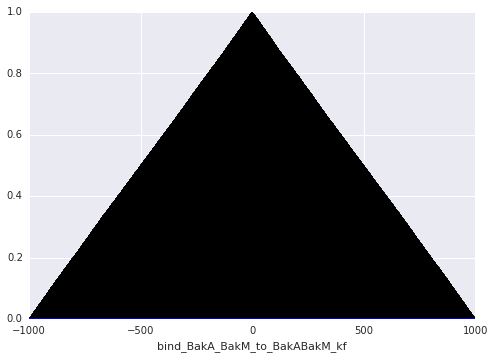

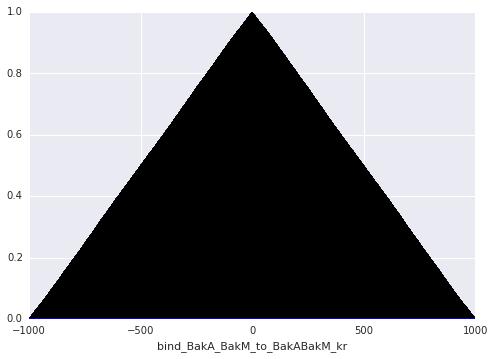

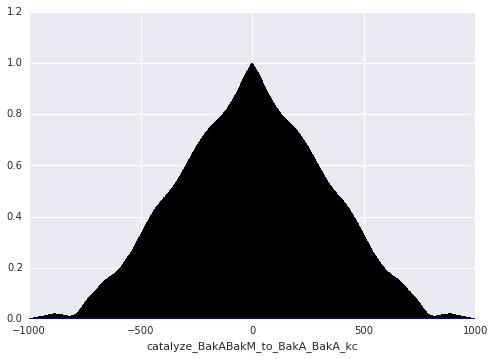

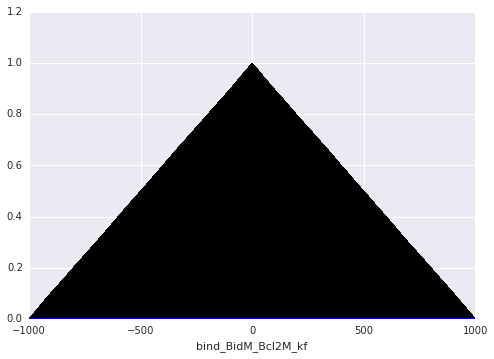

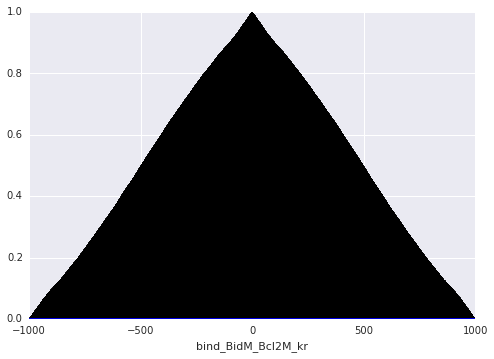

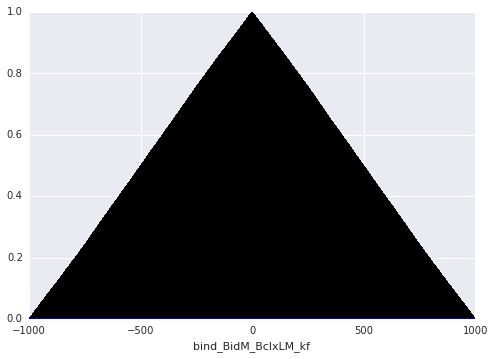

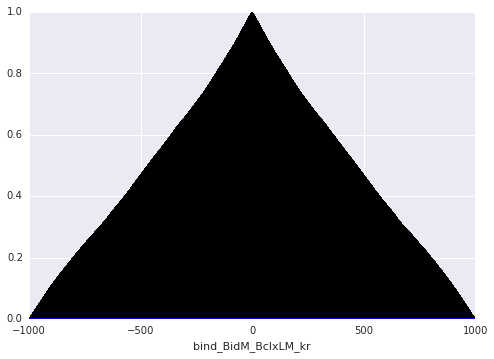

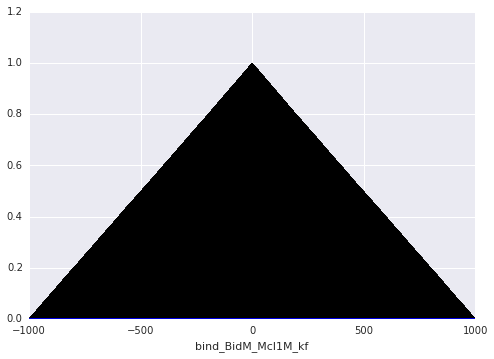

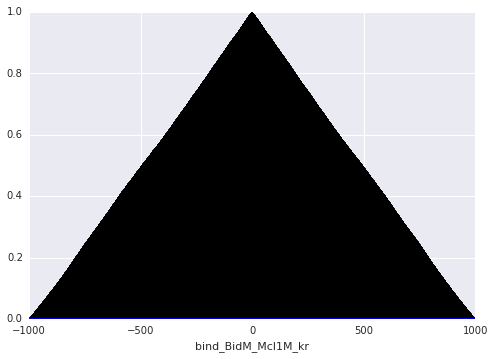

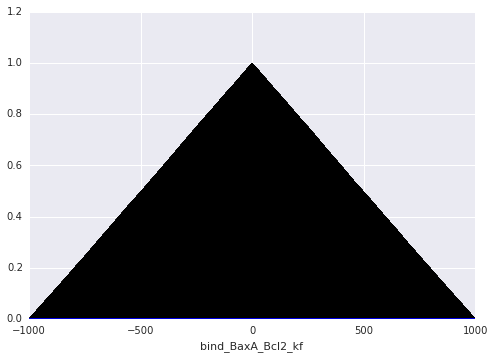

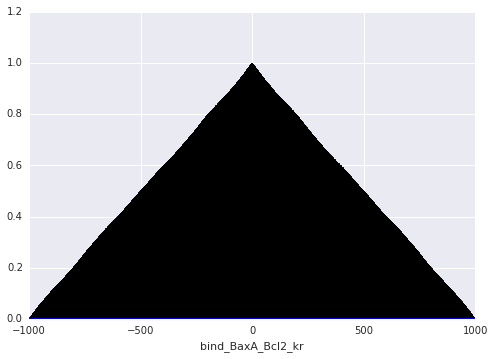

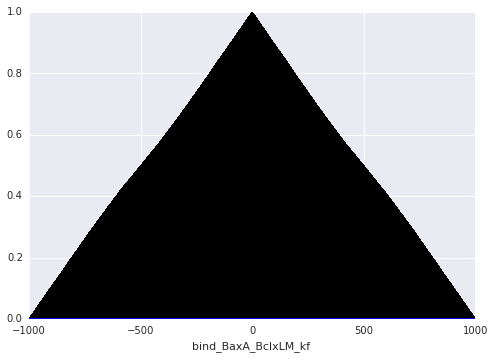

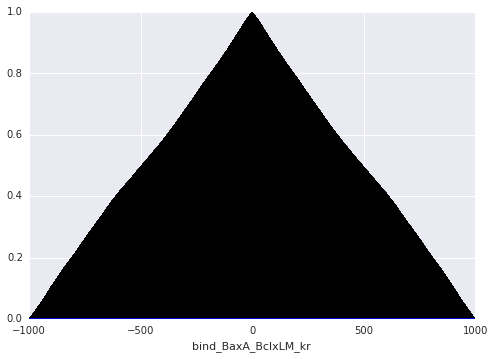

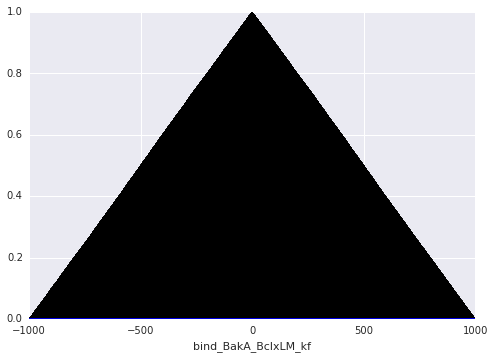

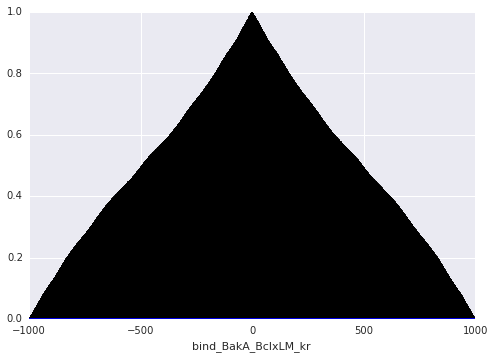

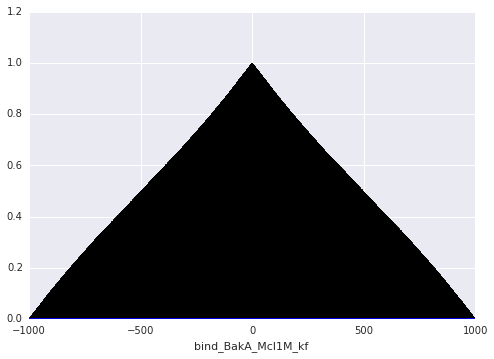

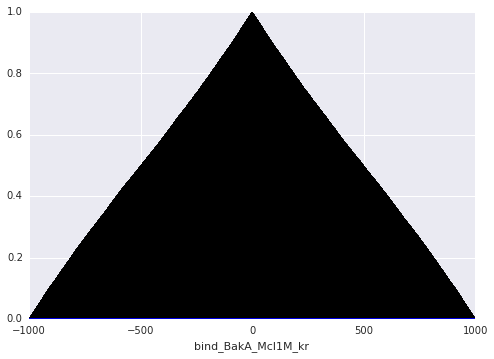

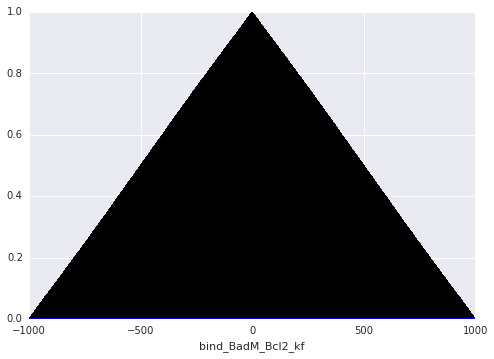

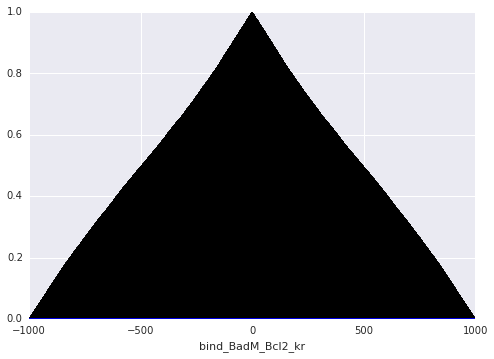

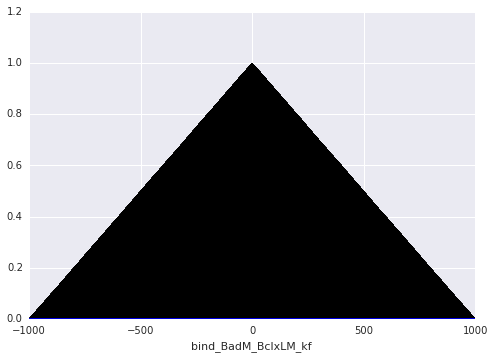

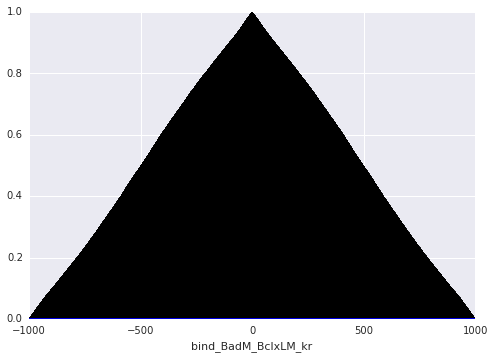

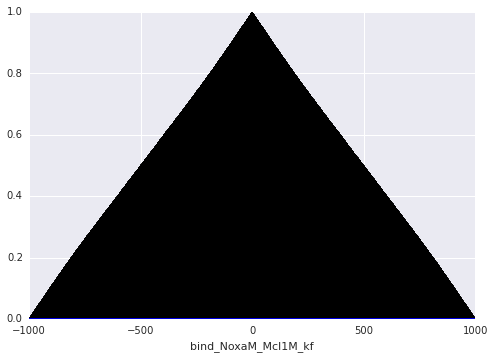

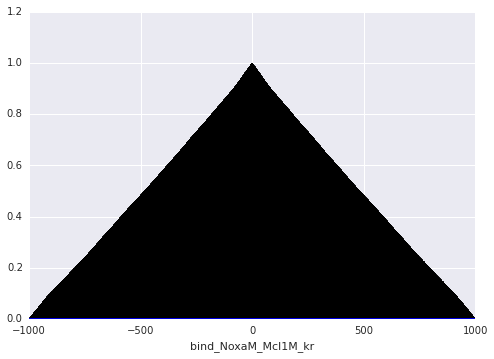

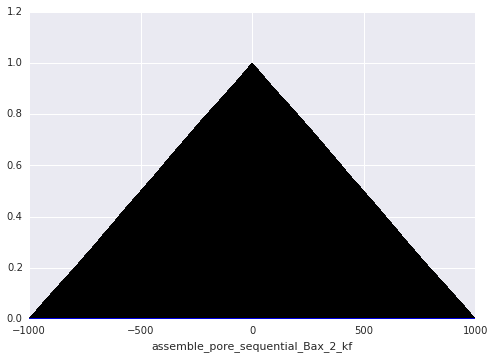

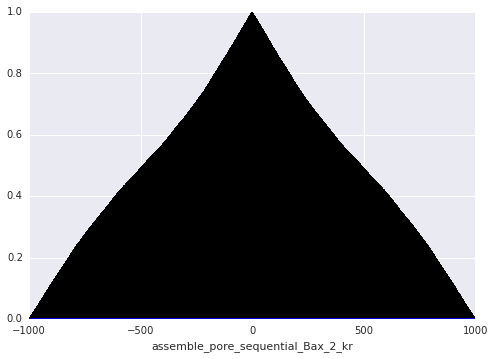

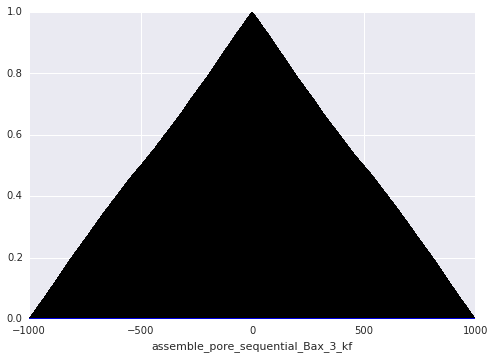

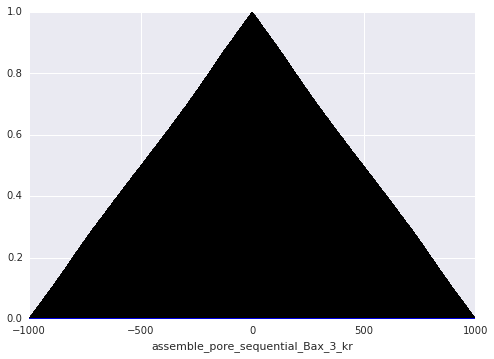

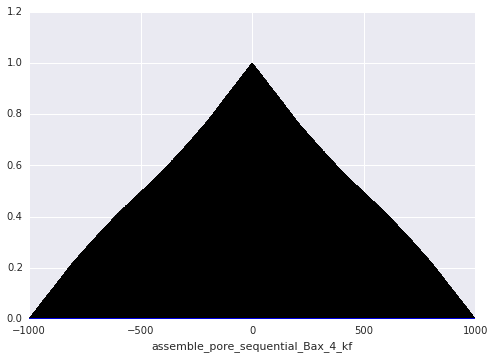

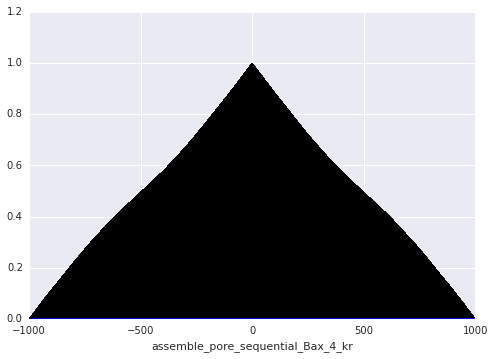

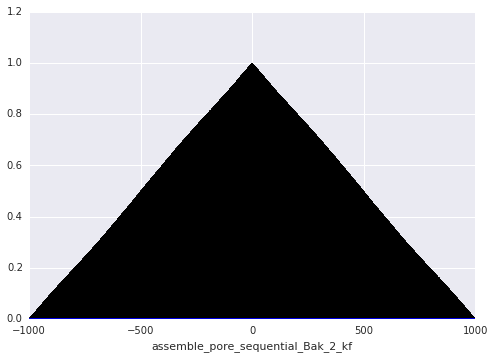

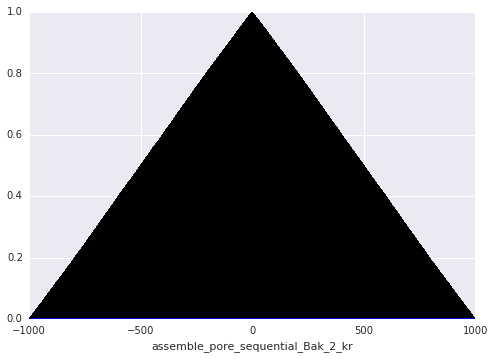

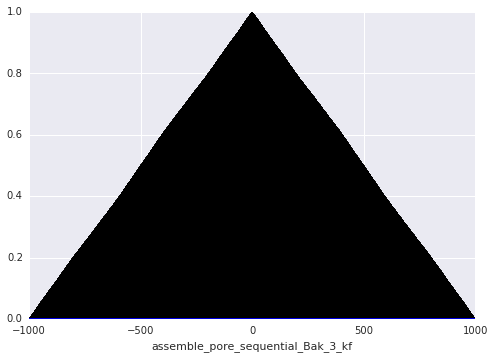

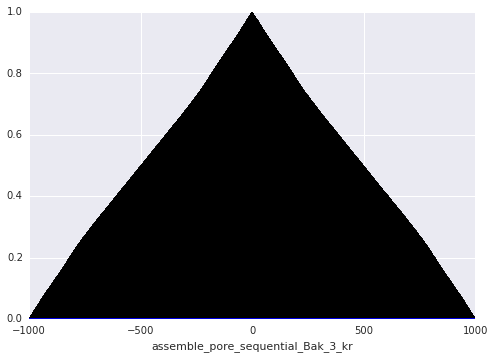

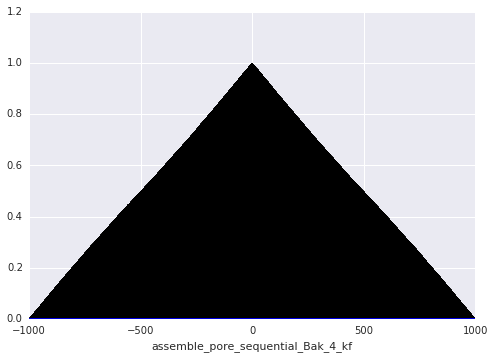

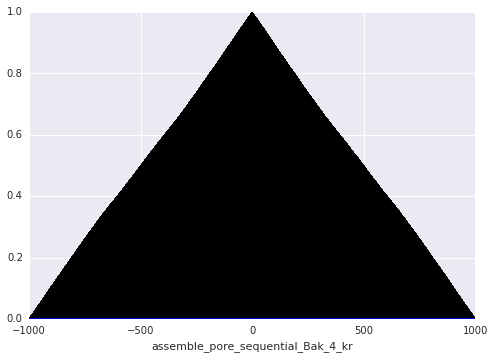

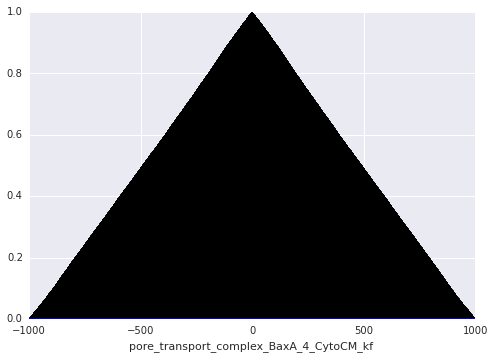

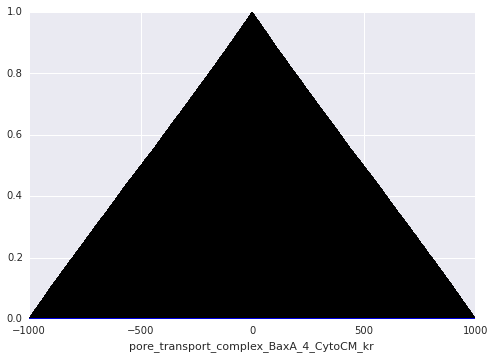

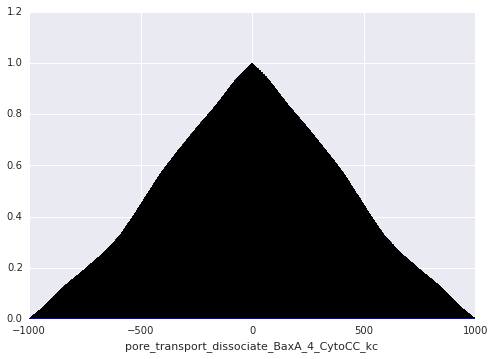

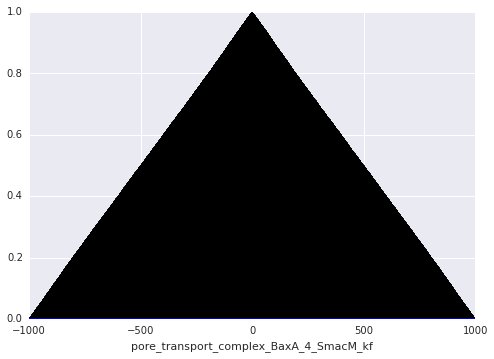

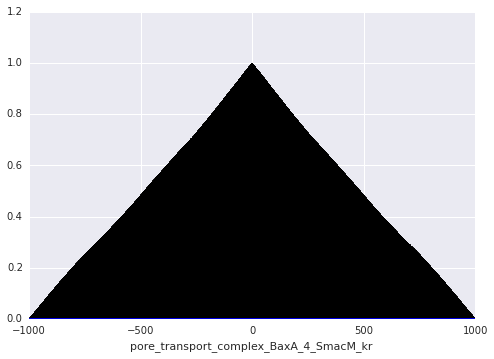

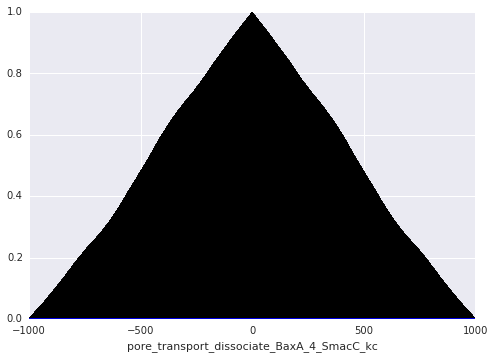

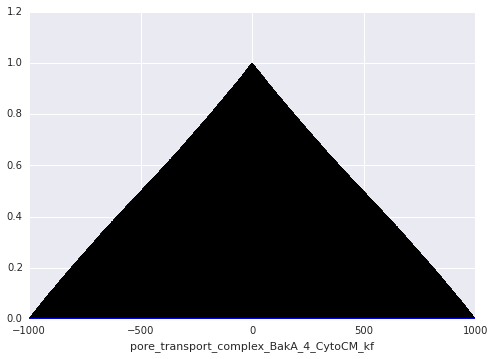

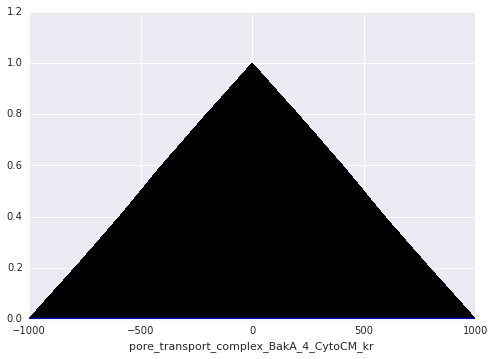

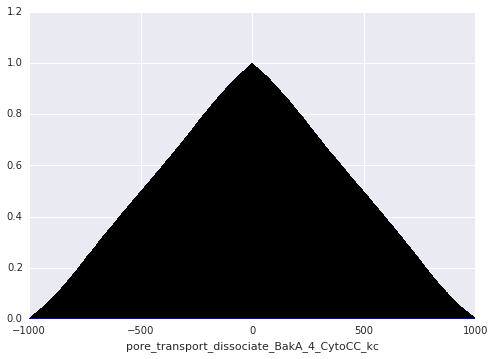

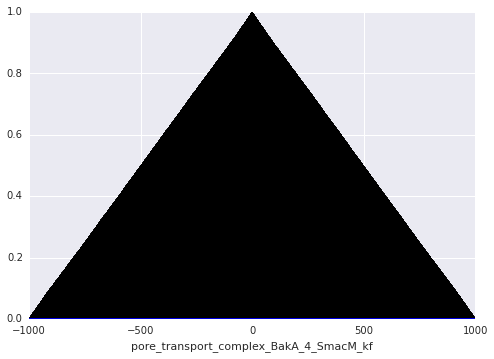

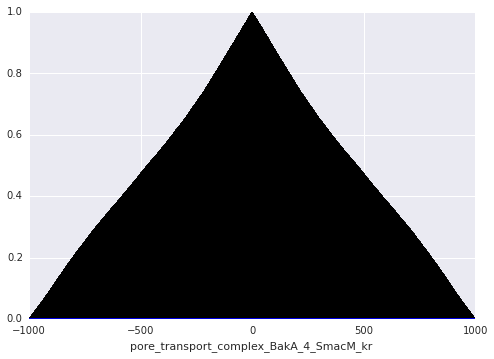

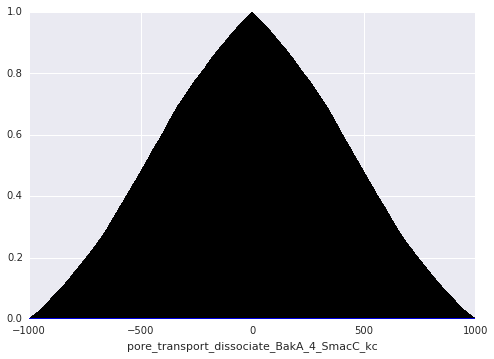

In [13]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][0][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

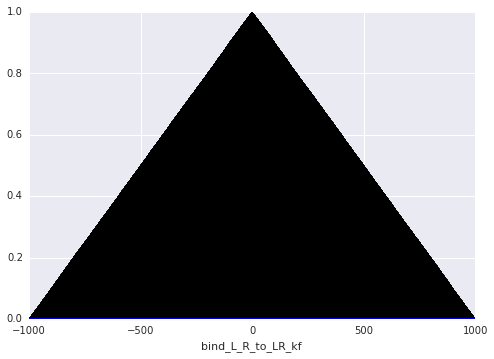

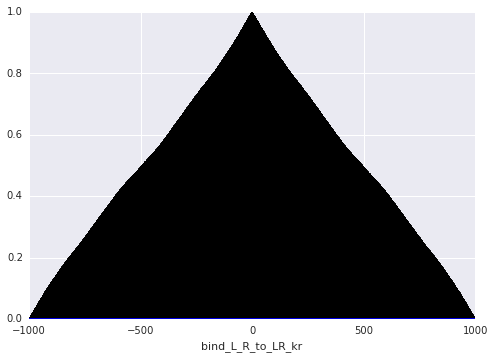

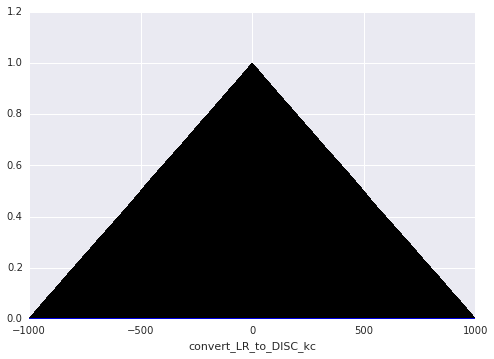

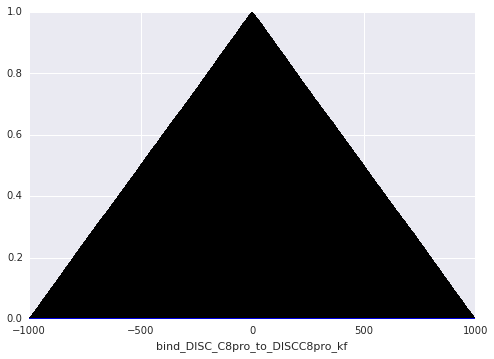

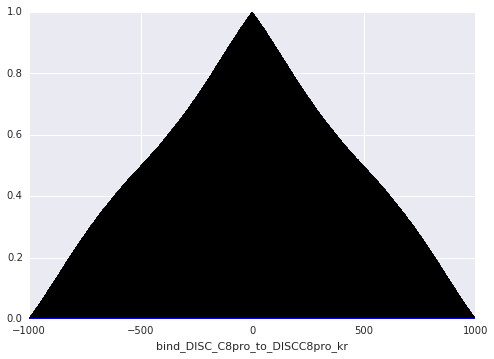

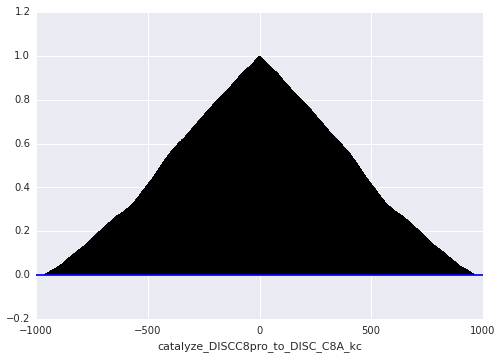

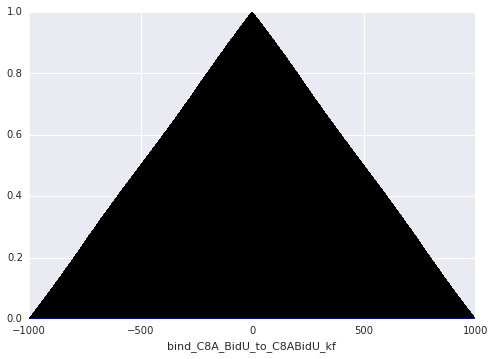

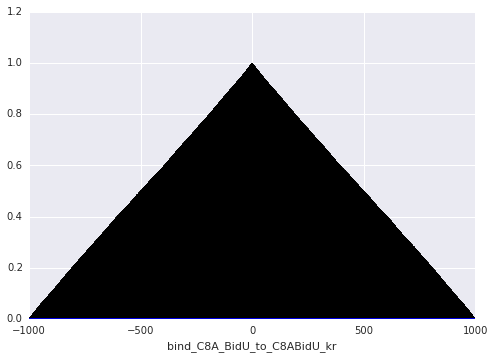

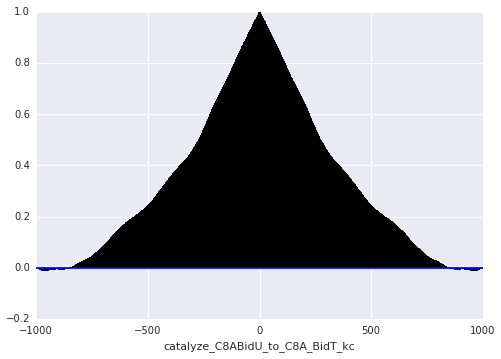

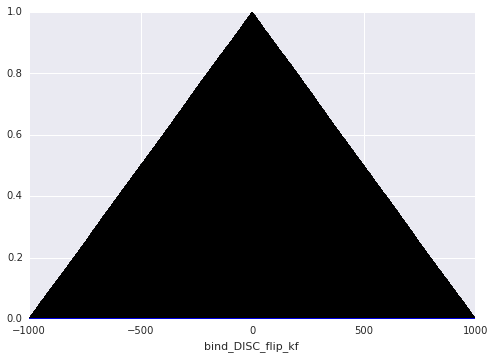

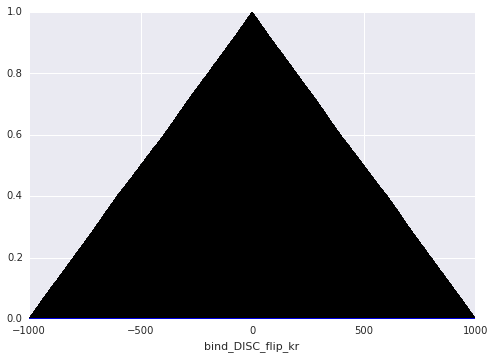

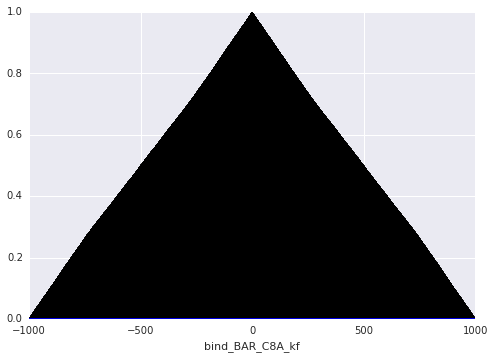

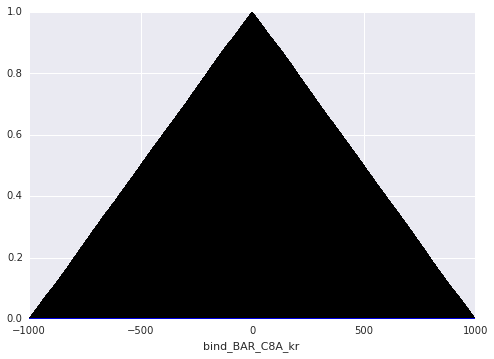

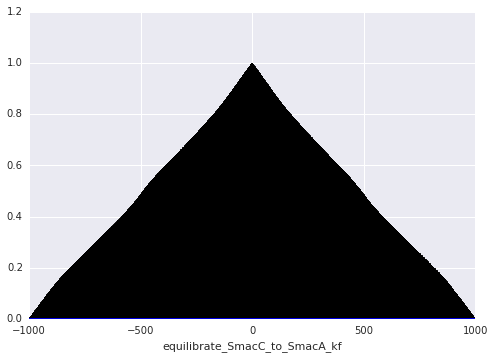

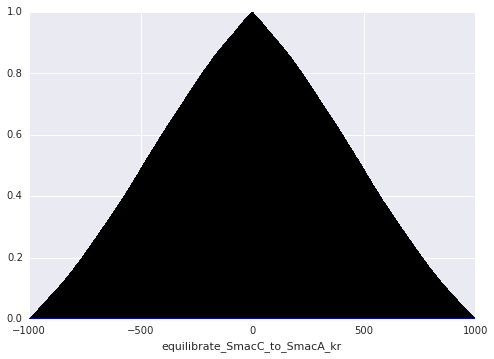

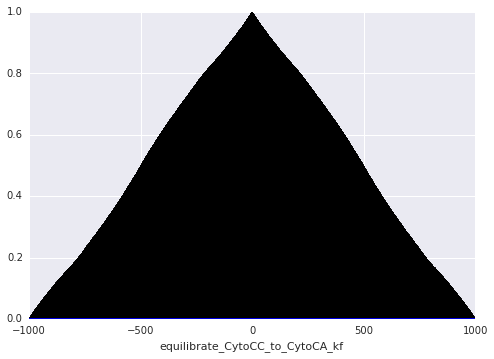

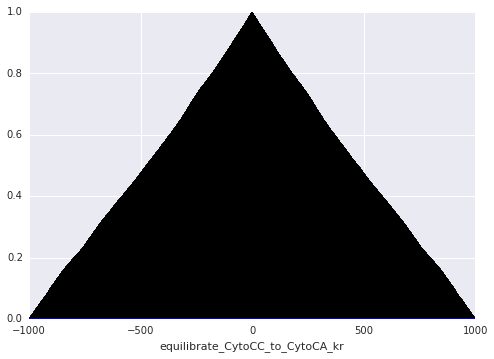

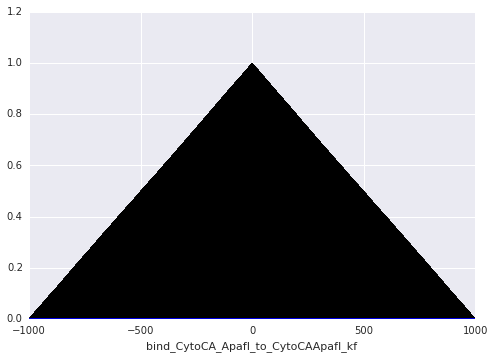

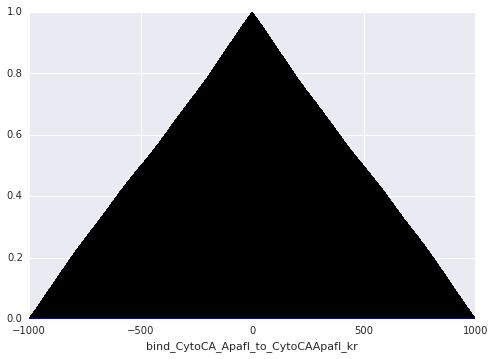

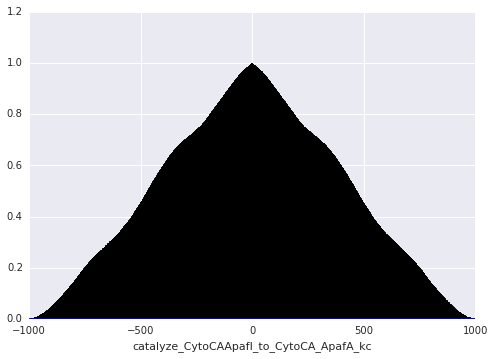

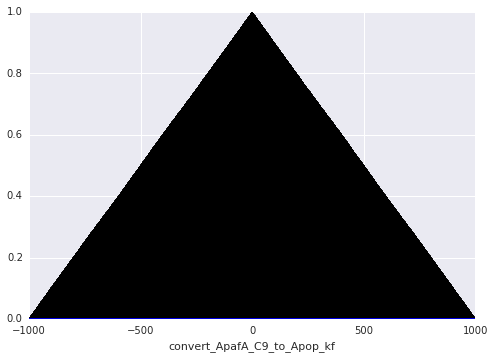

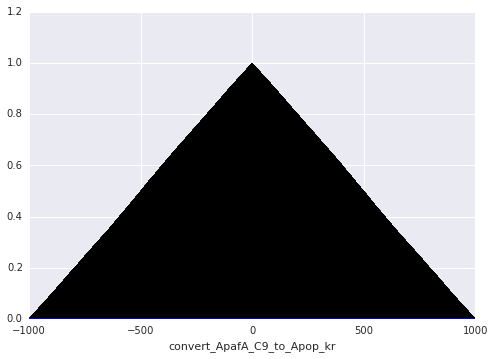

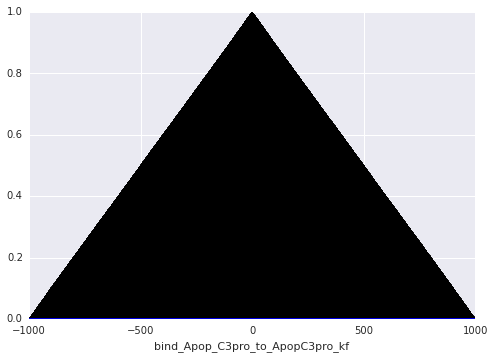

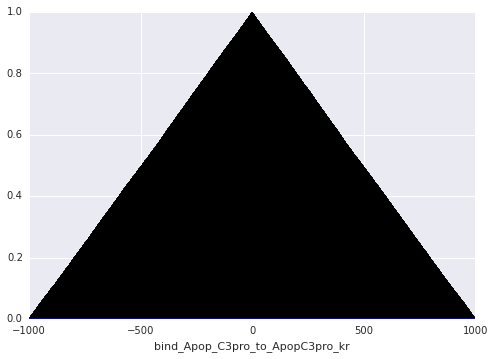

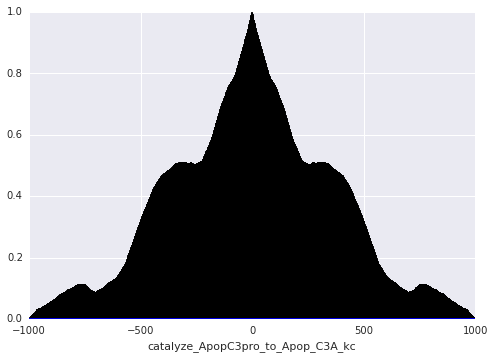

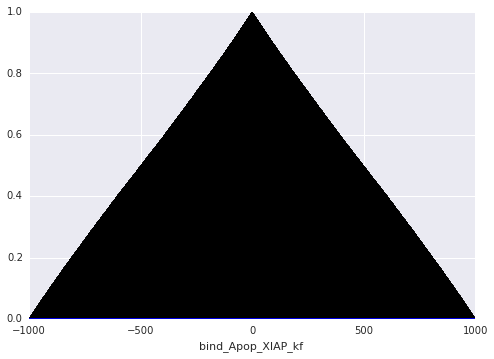

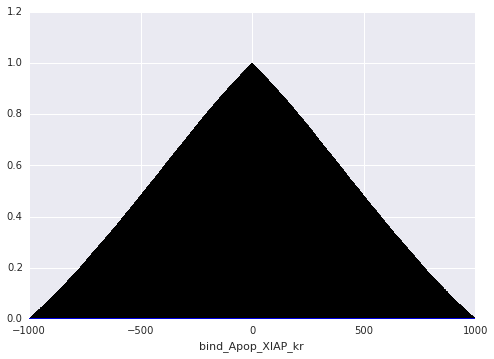

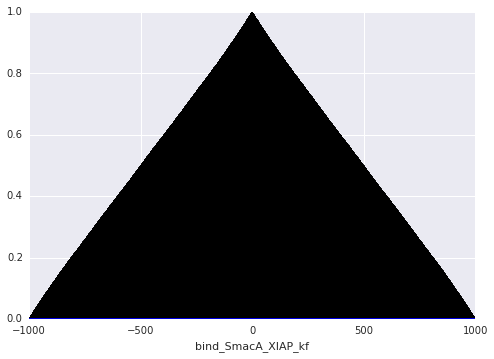

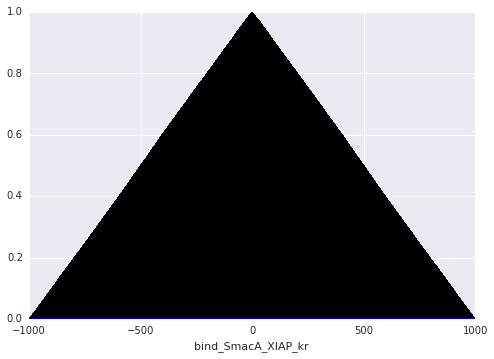

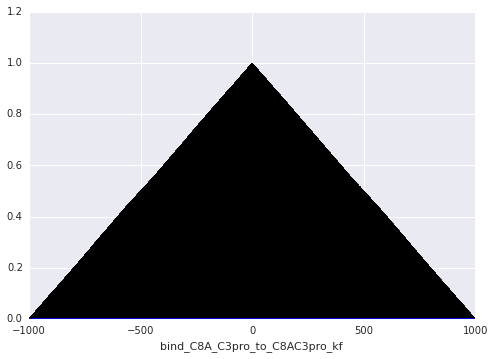

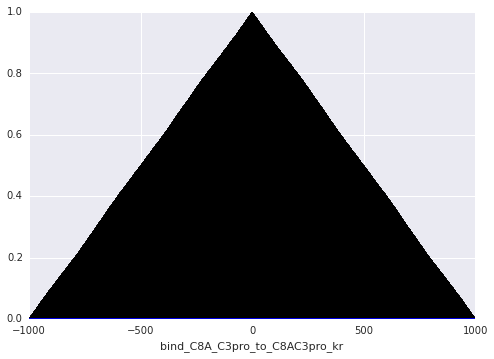

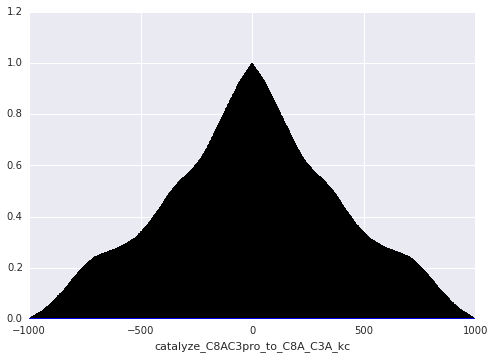

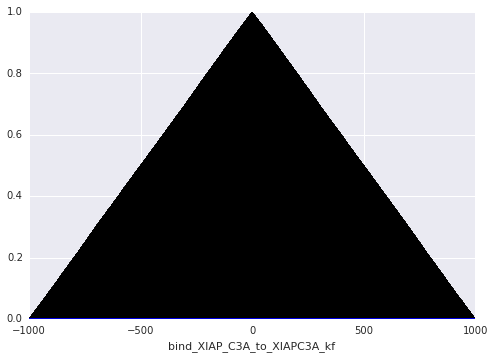

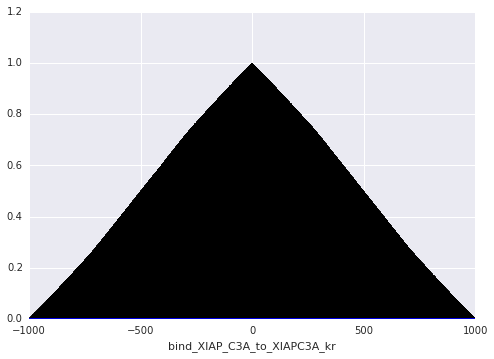

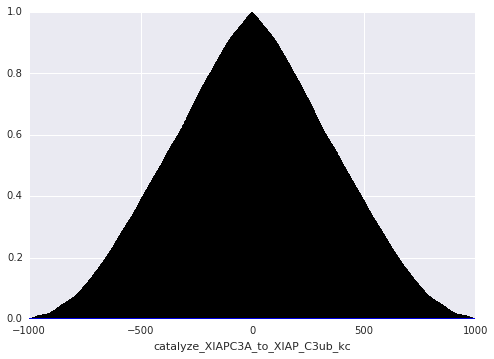

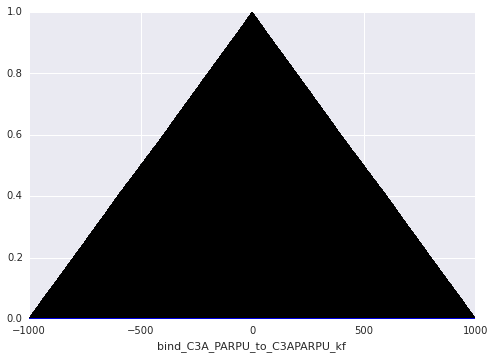

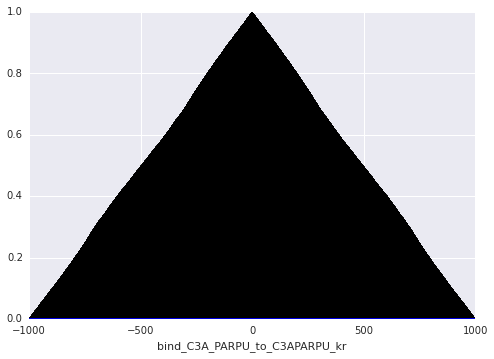

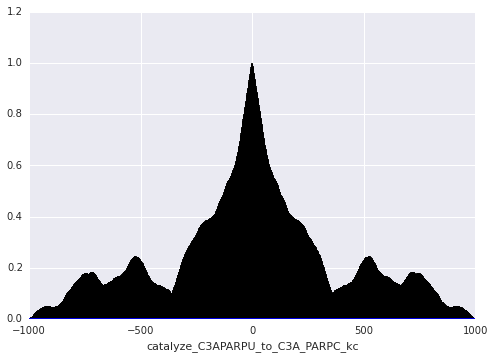

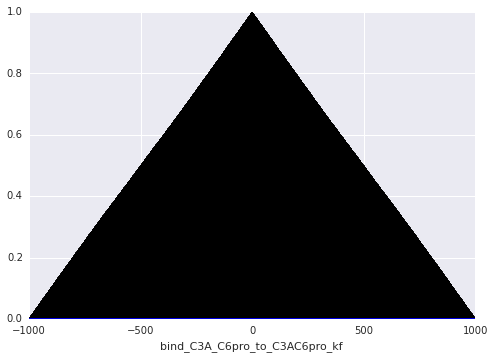

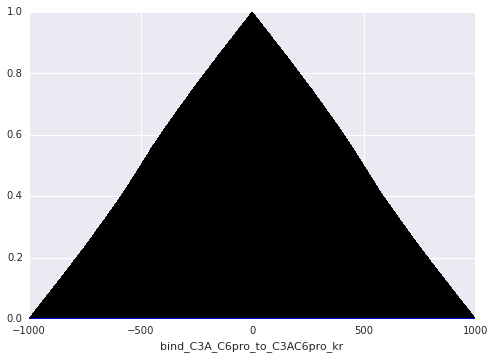

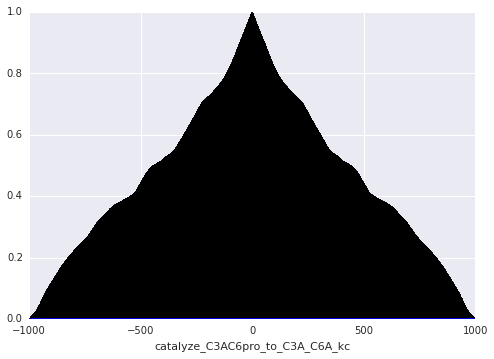

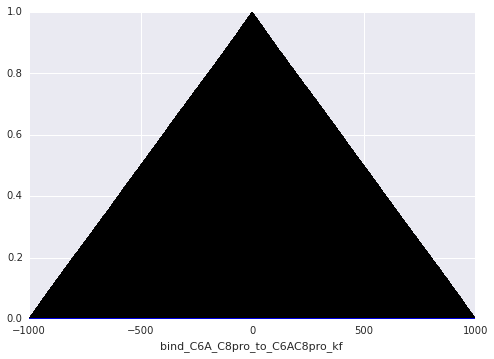

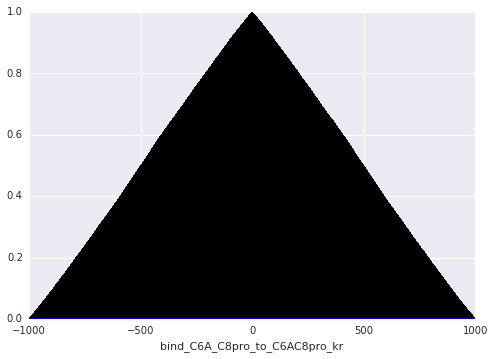

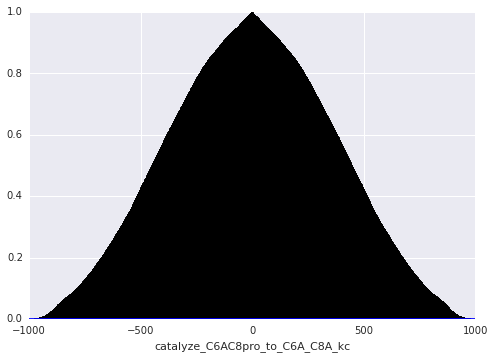

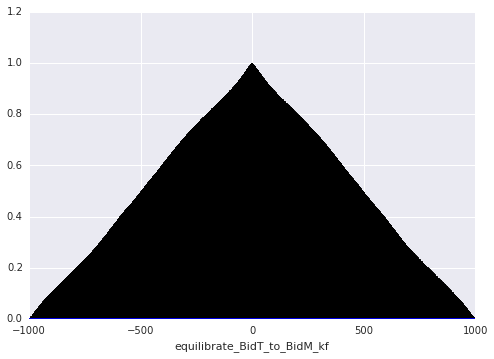

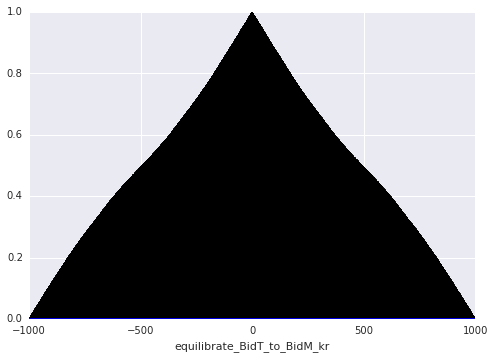

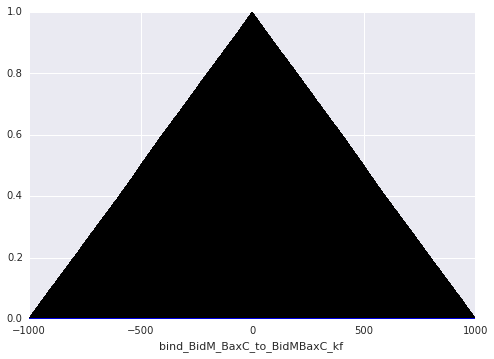

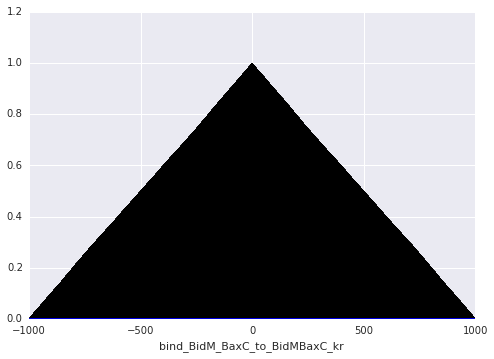

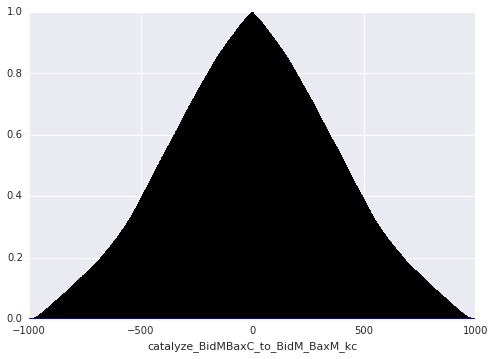

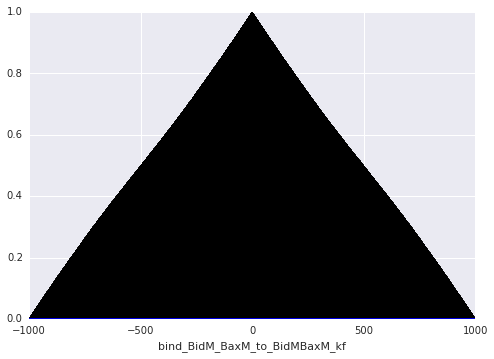

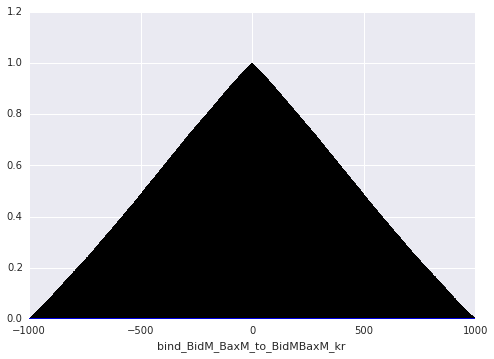

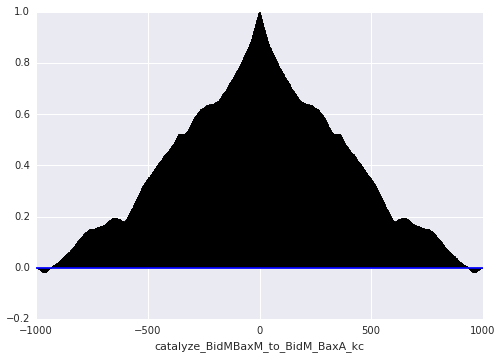

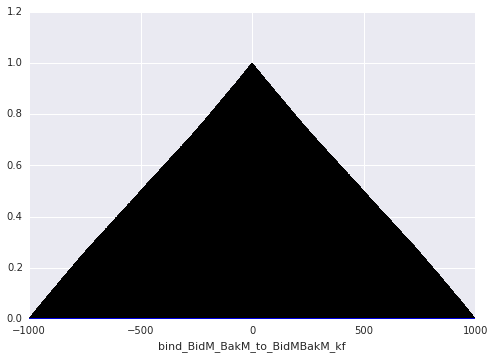

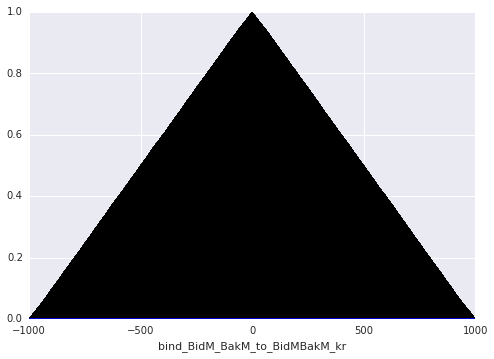

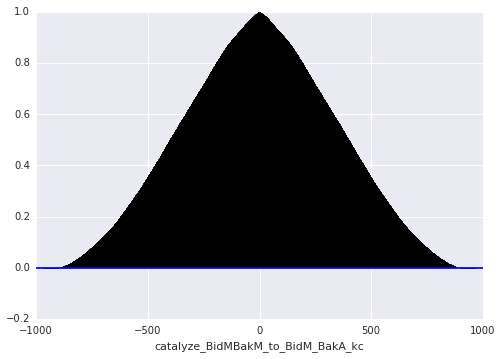

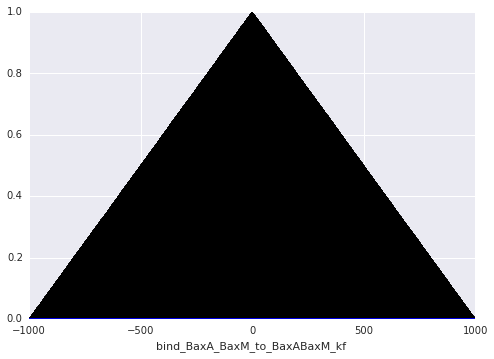

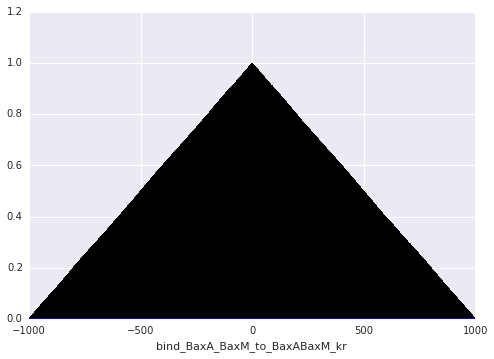

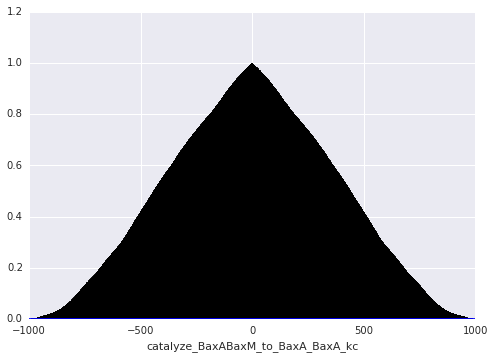

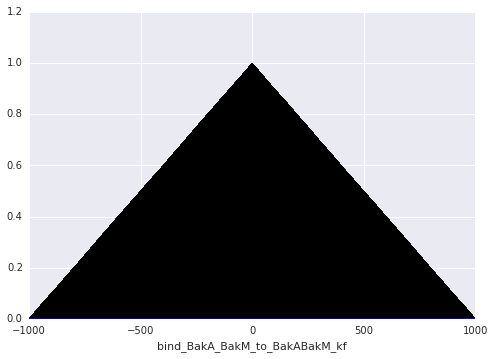

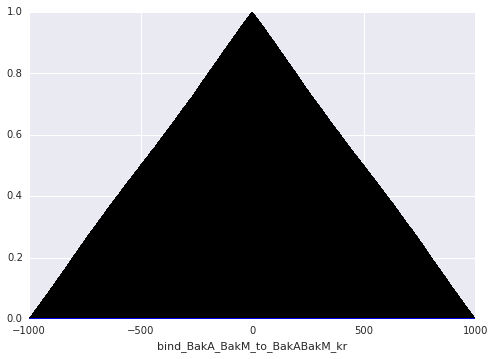

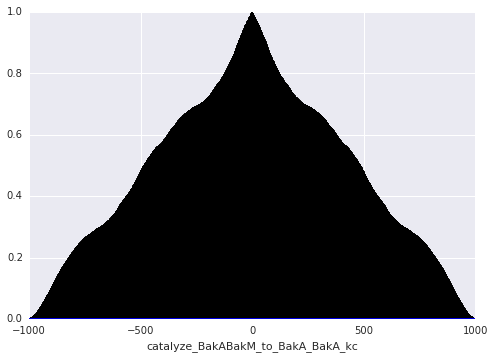

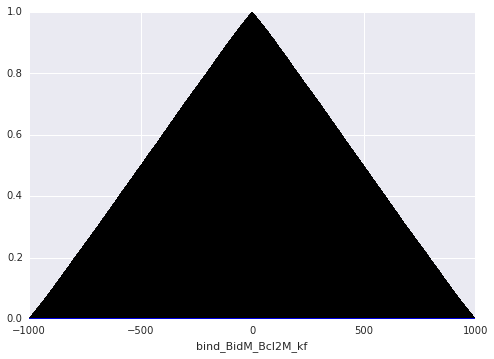

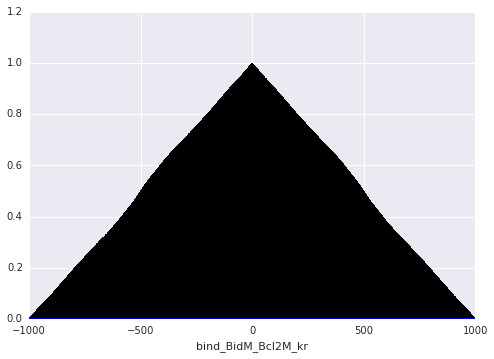

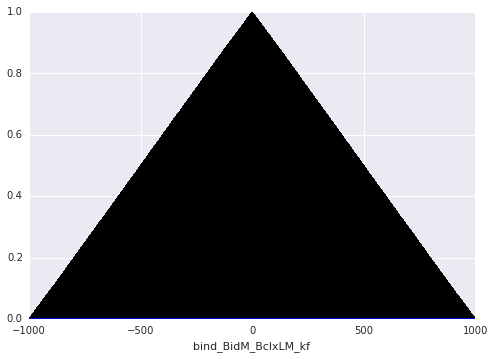

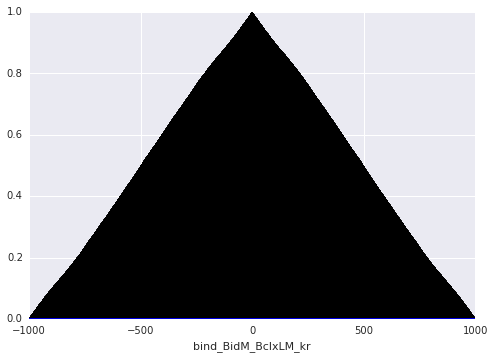

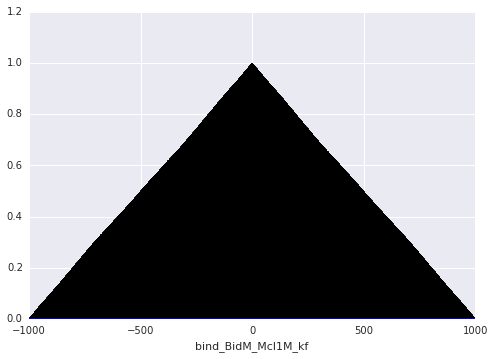

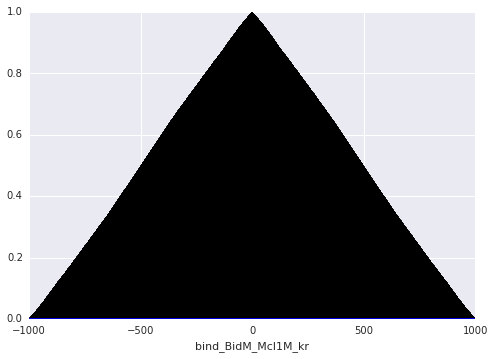

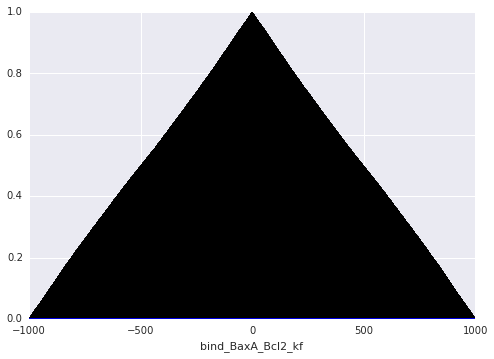

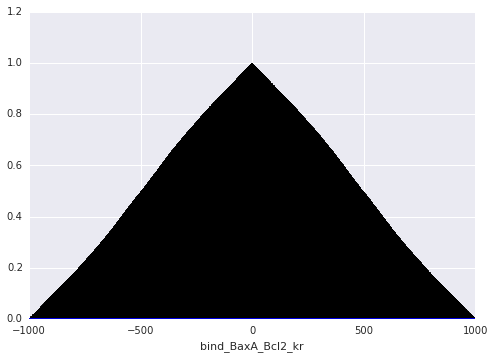

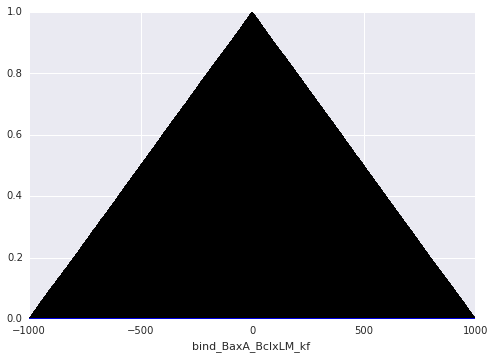

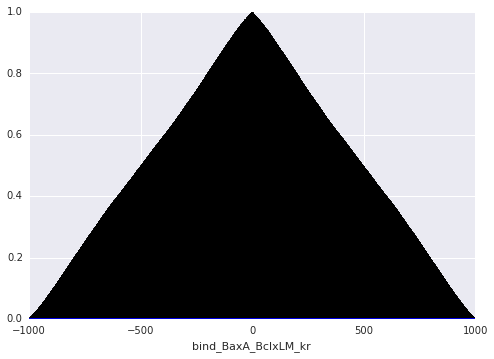

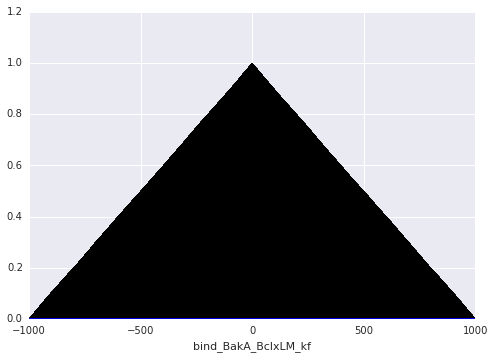

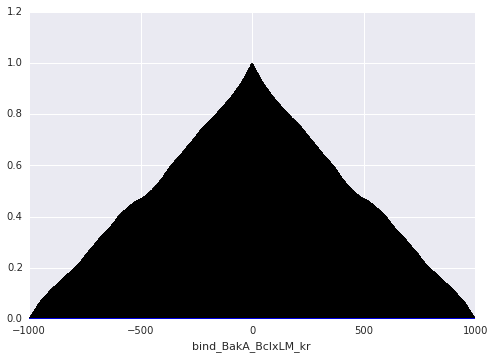

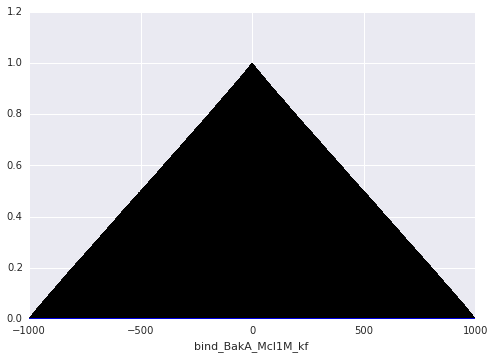

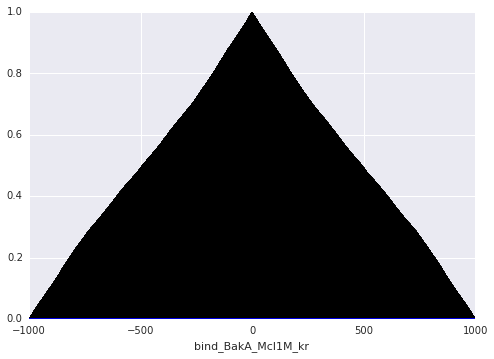

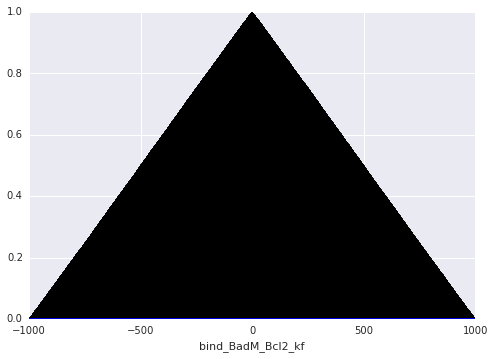

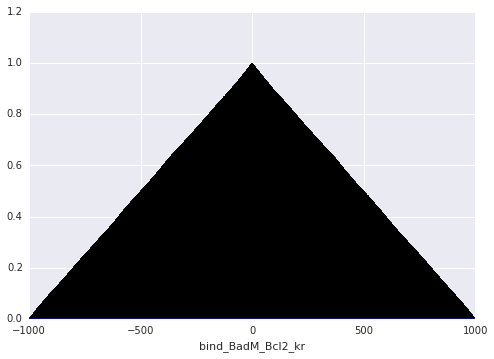

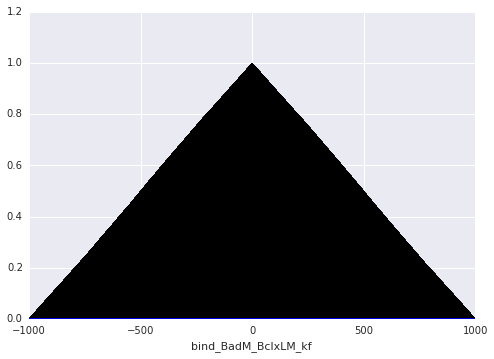

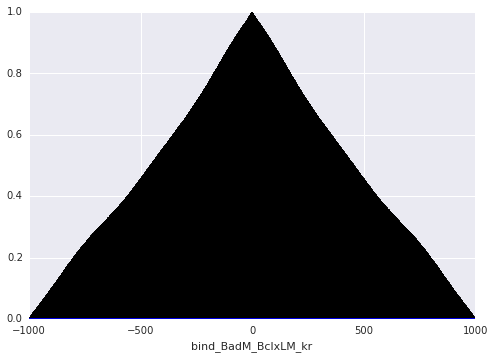

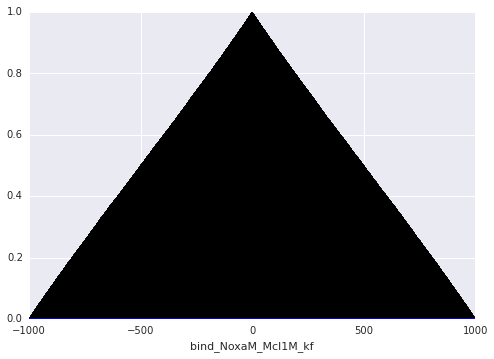

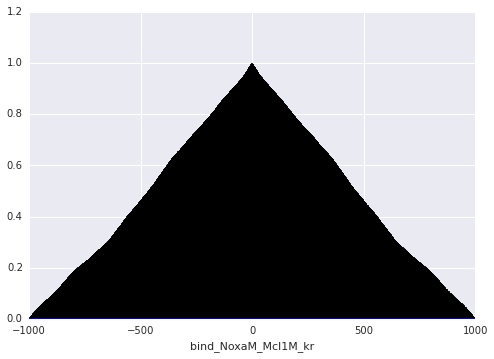

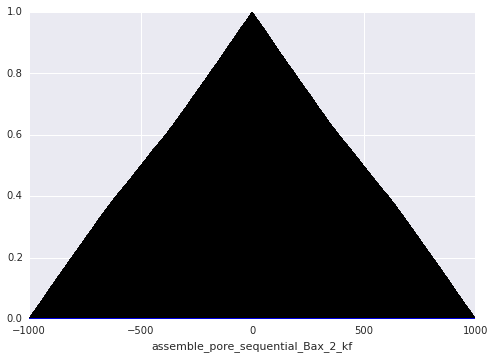

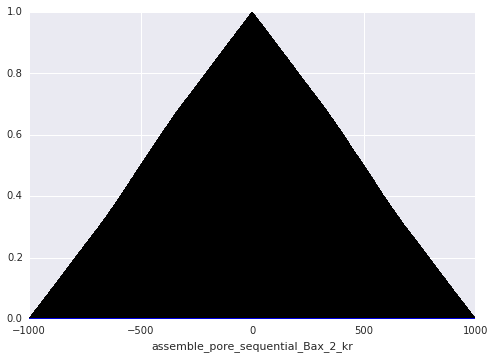

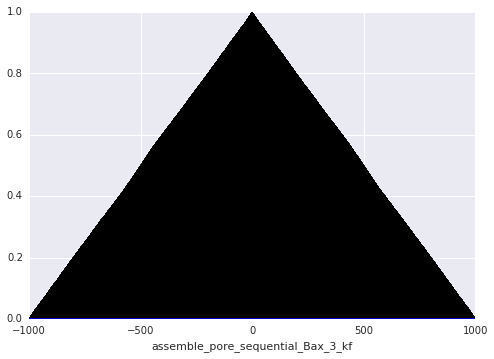

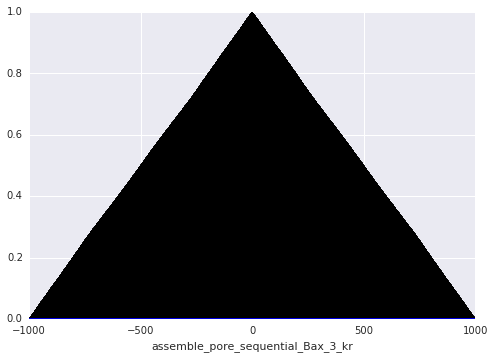

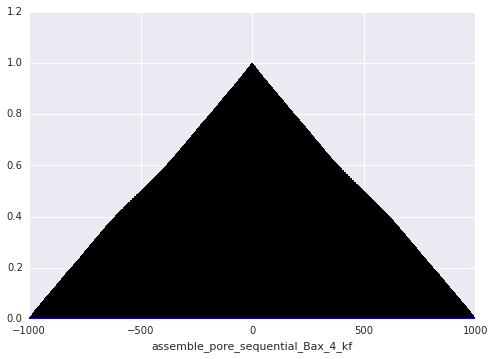

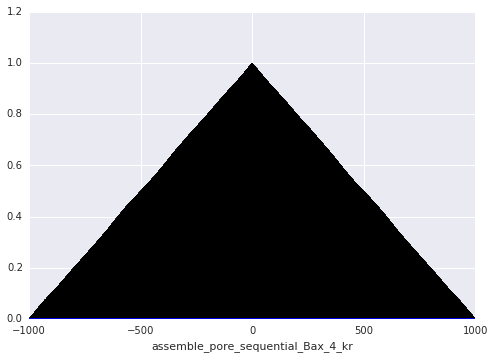

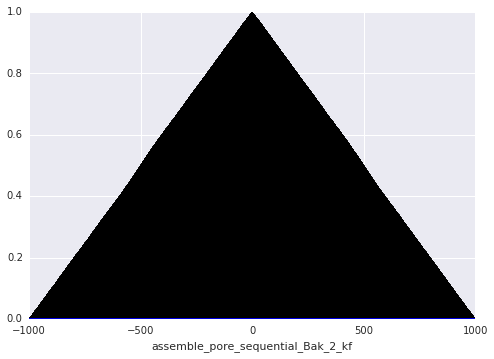

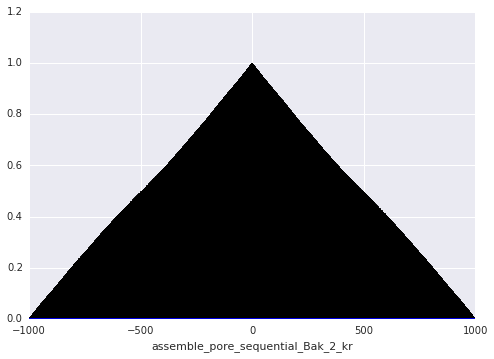

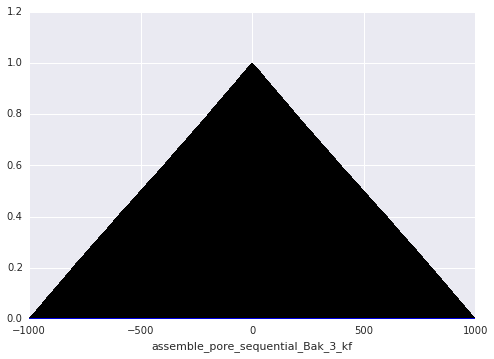

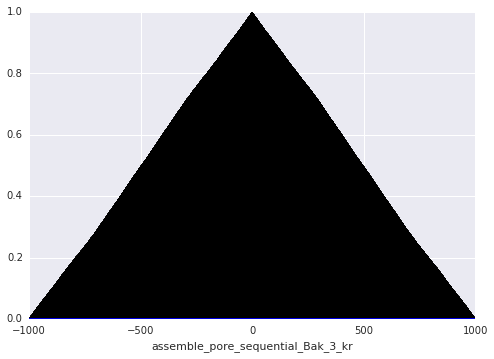

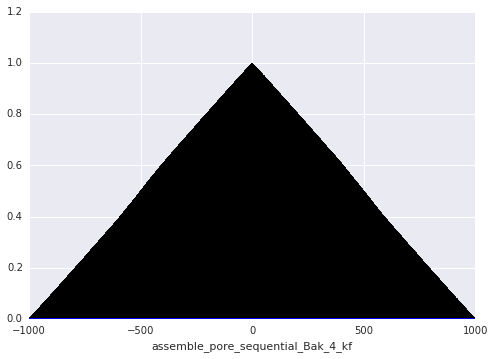

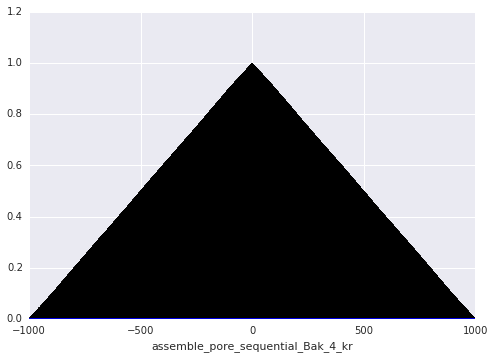

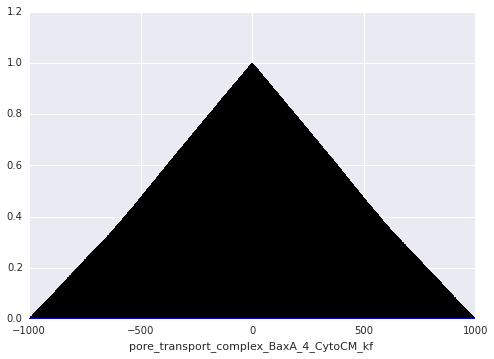

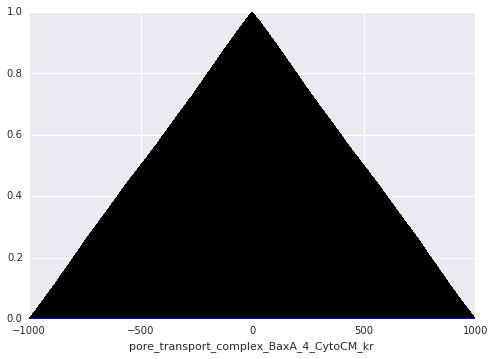

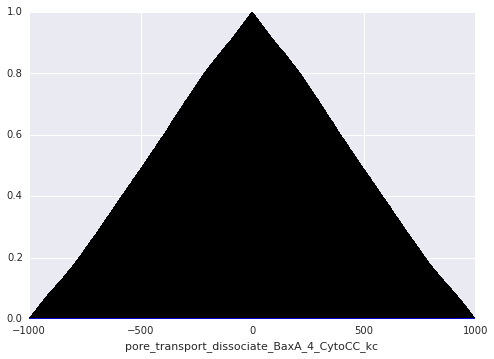

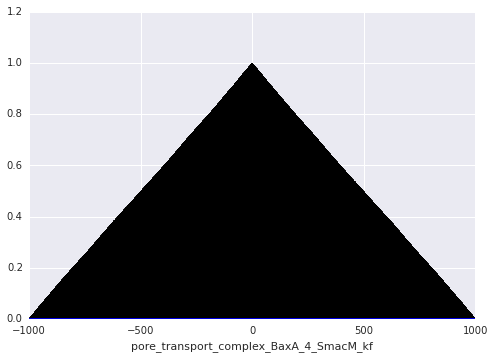

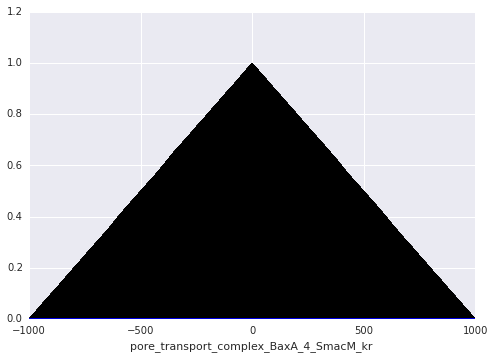

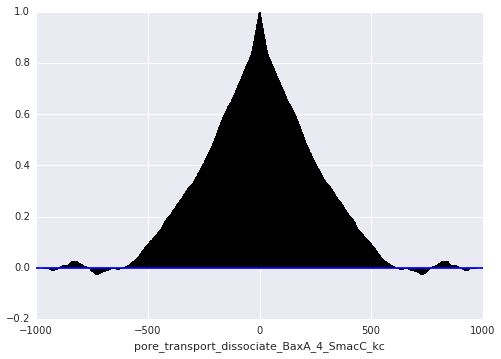

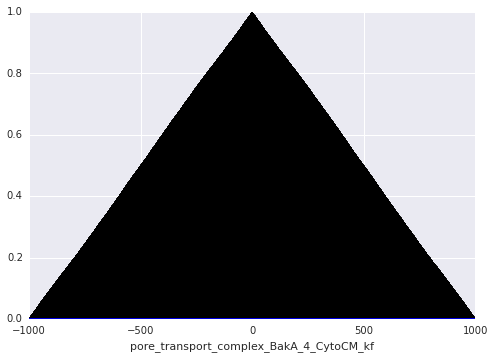

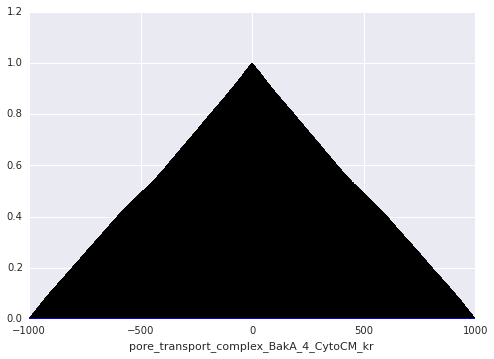

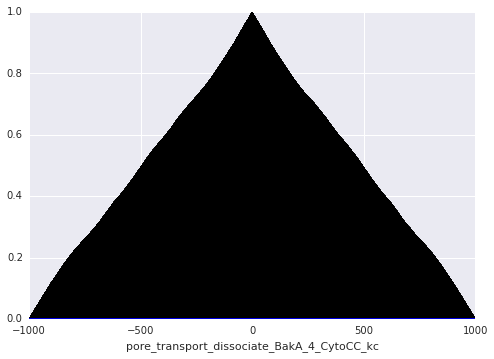

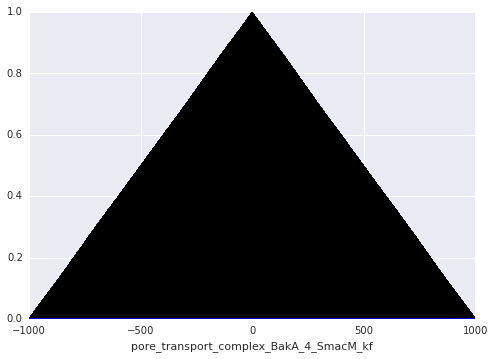

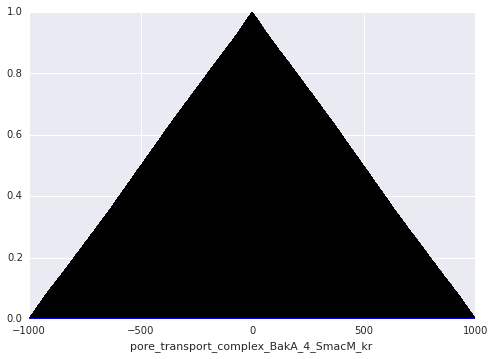

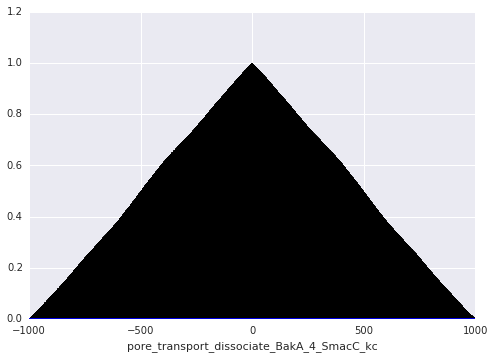

In [14]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][1][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

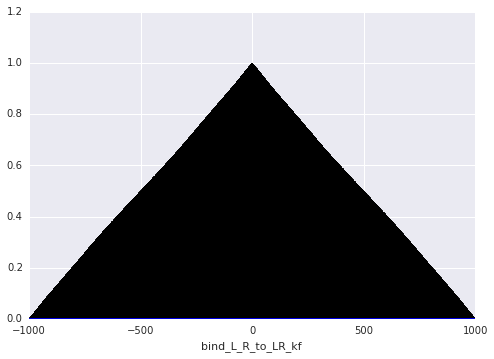

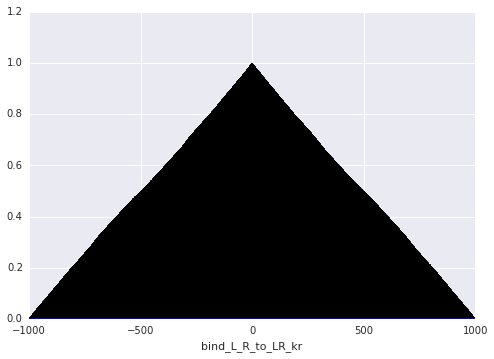

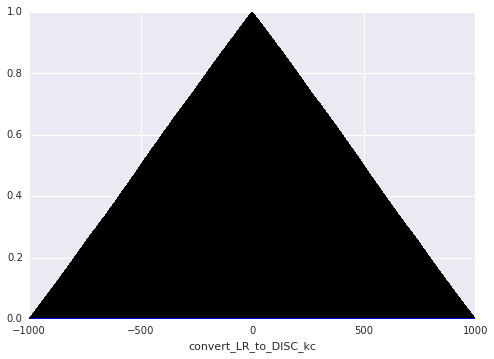

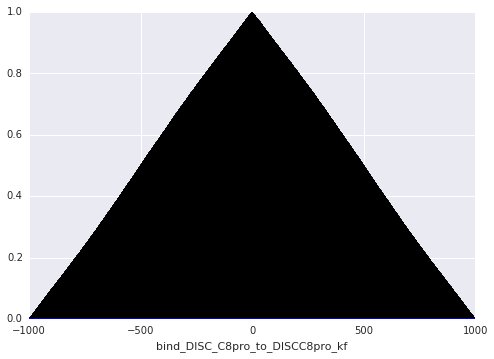

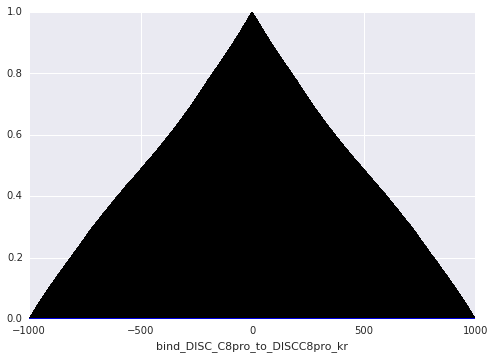

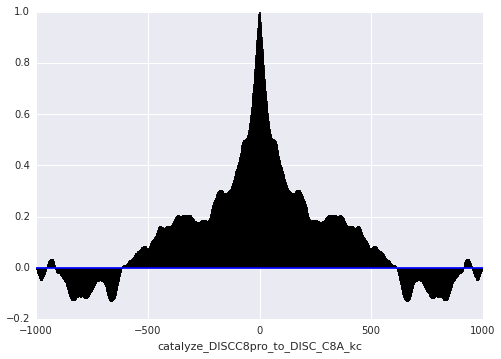

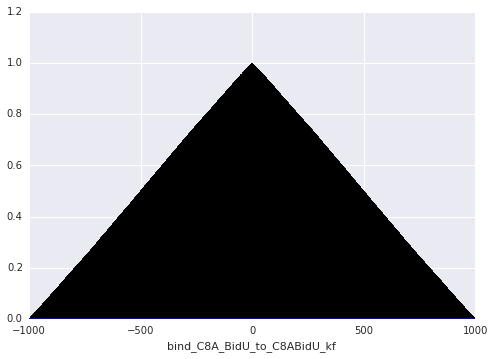

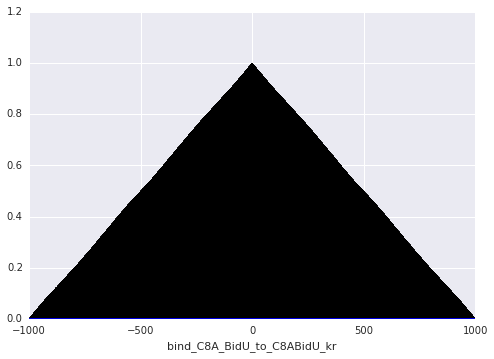

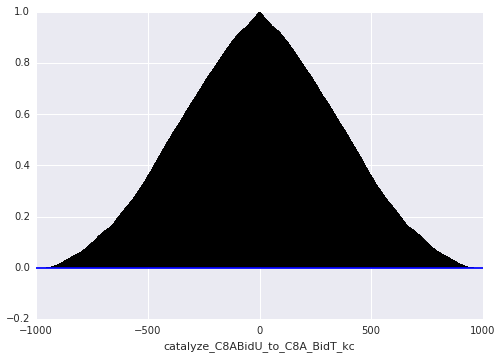

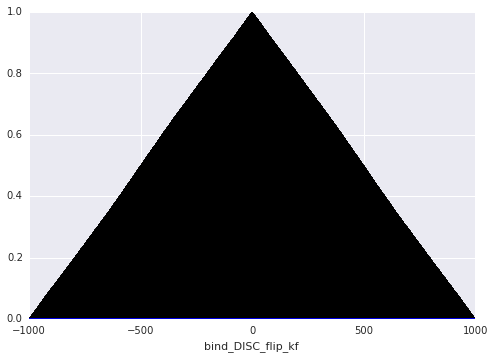

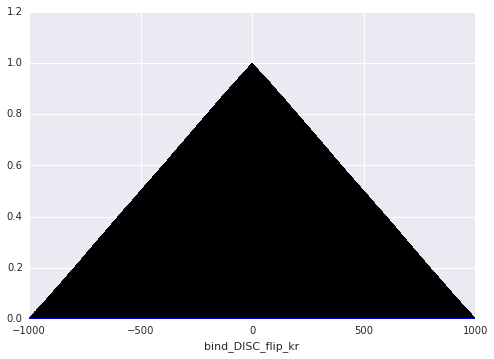

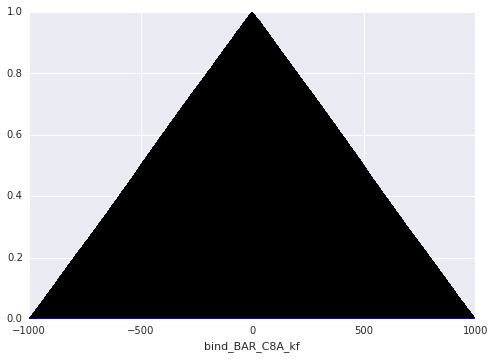

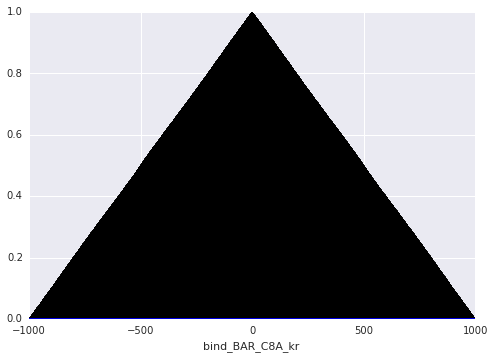

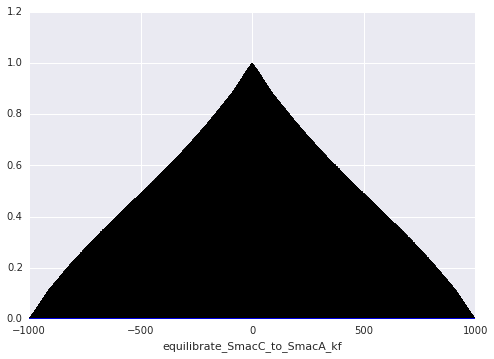

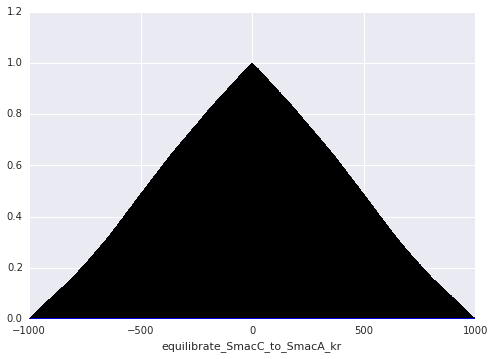

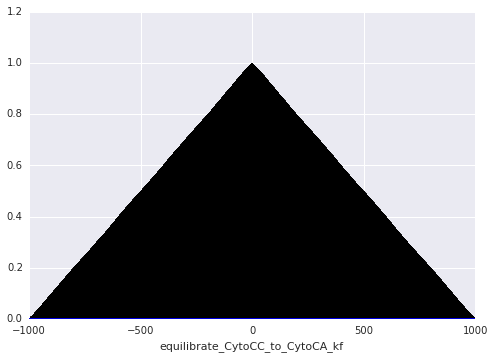

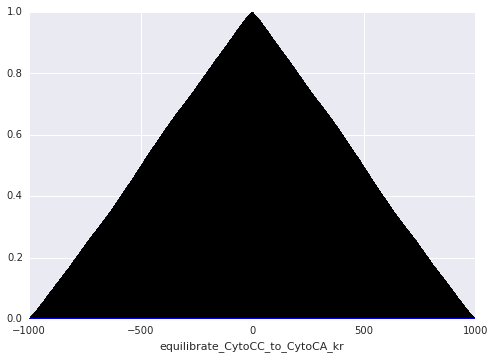

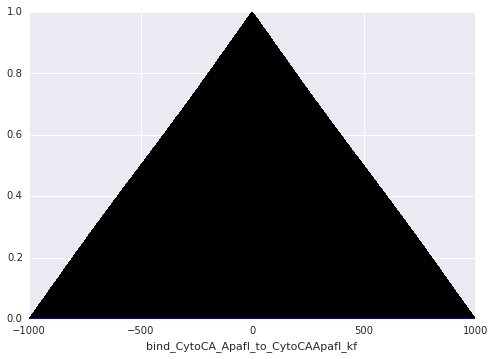

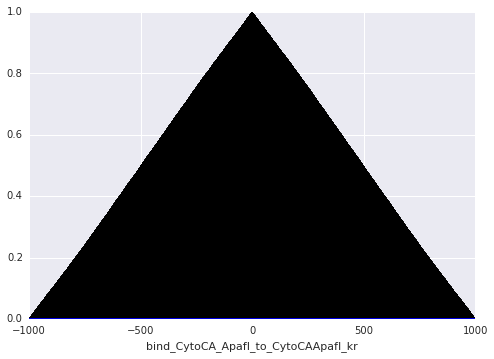

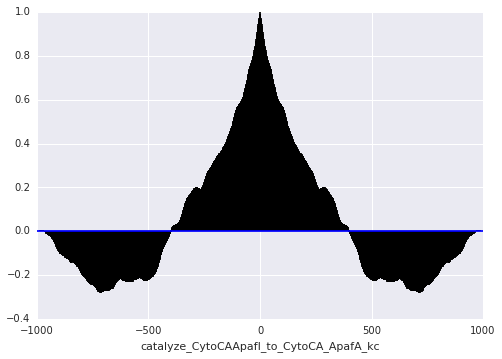

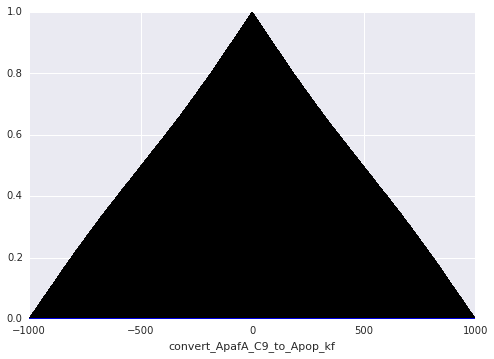

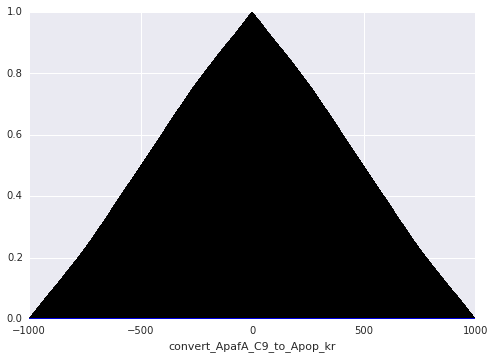

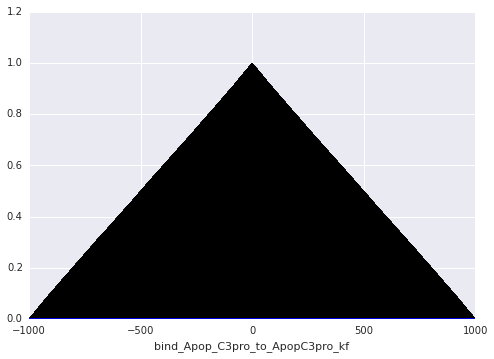

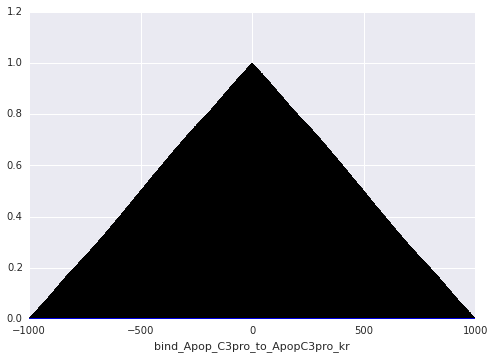

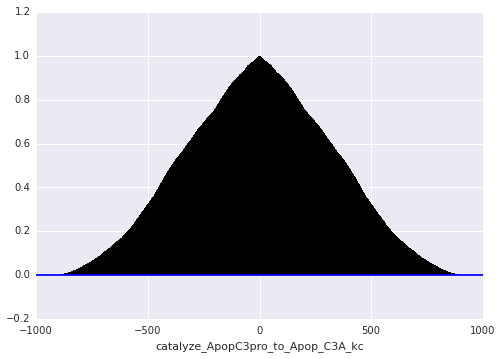

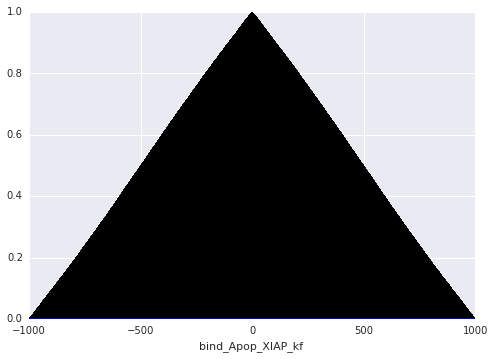

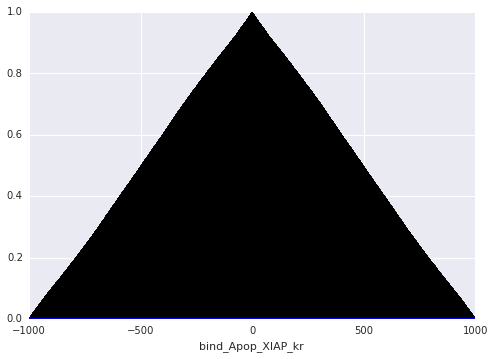

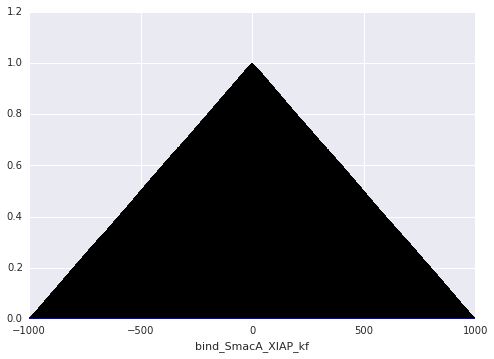

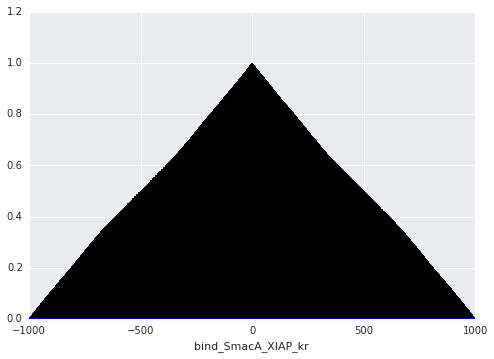

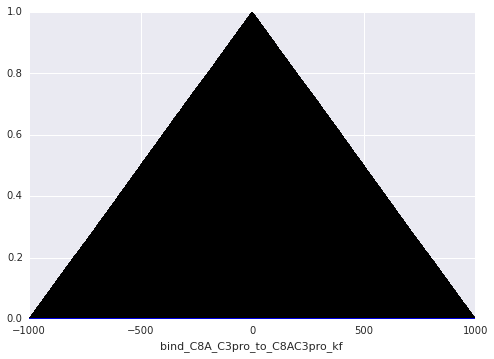

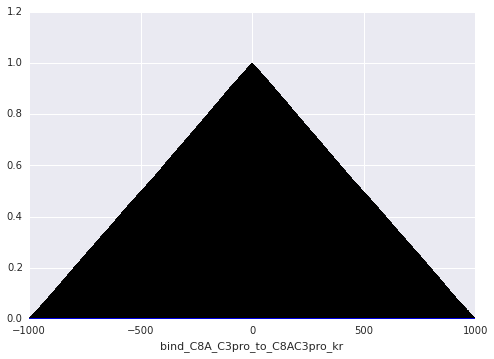

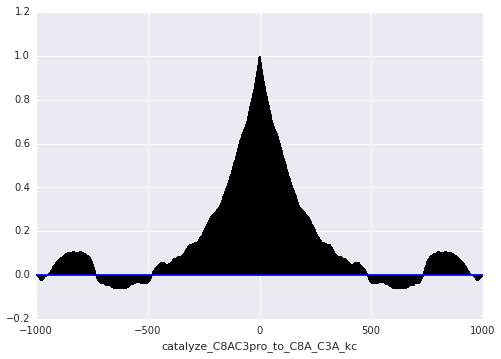

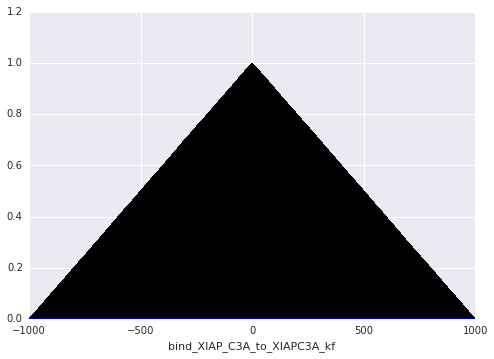

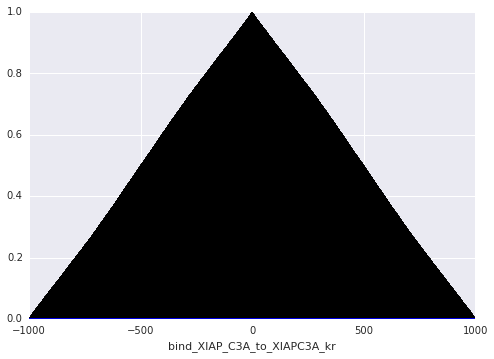

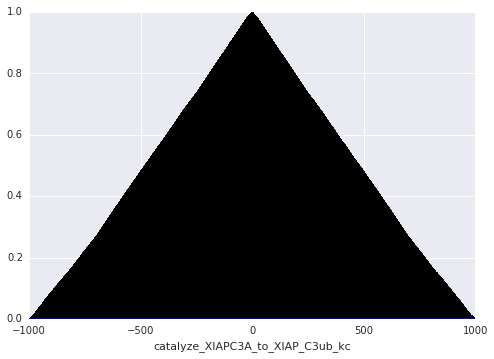

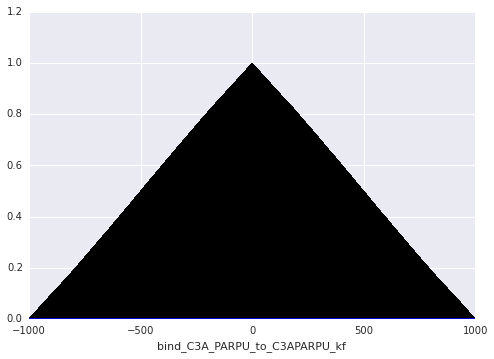

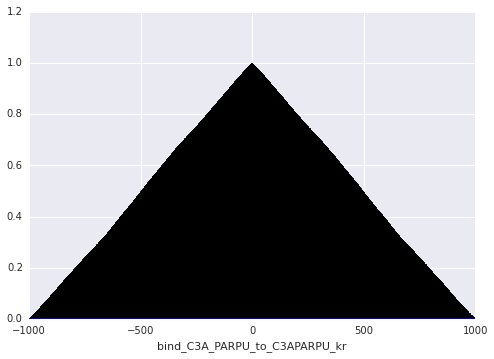

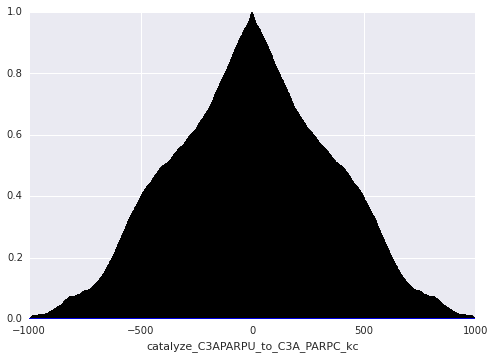

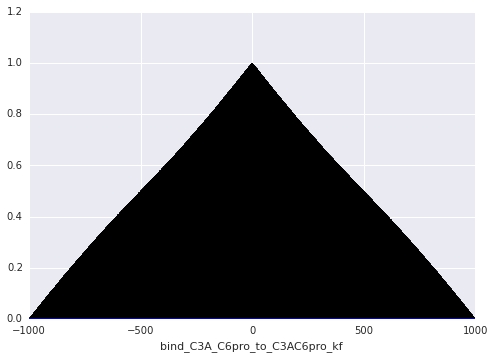

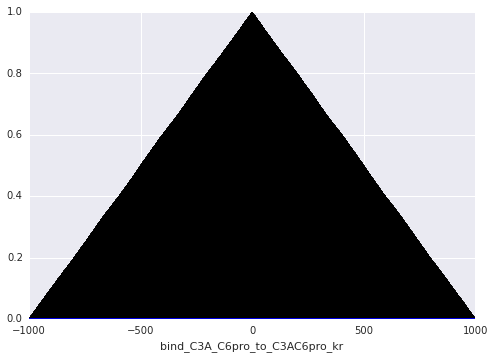

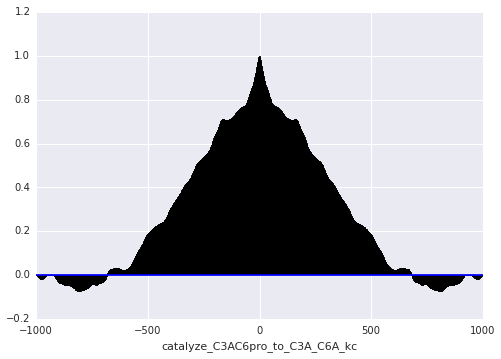

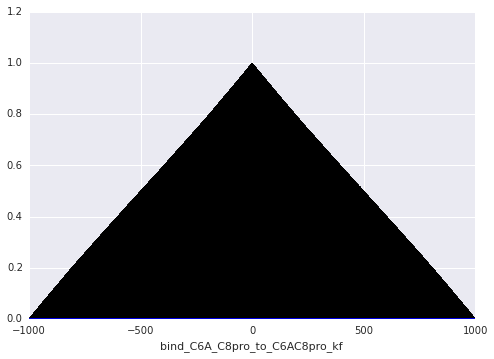

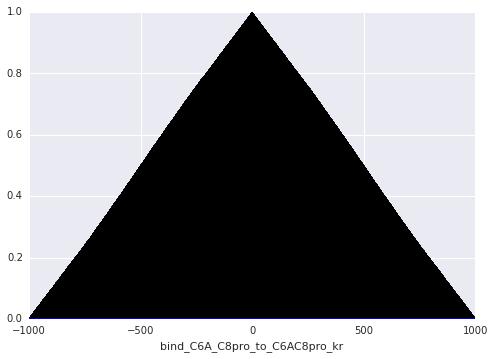

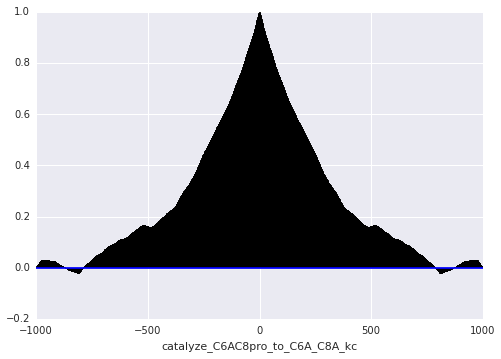

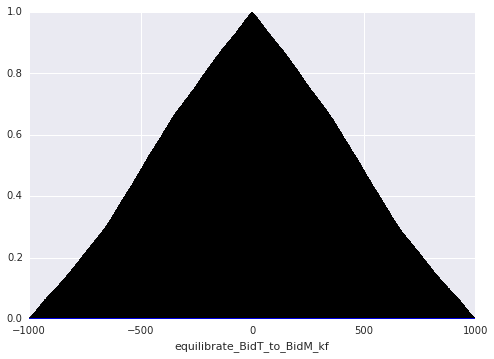

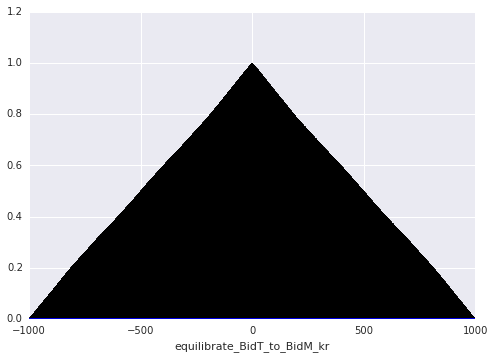

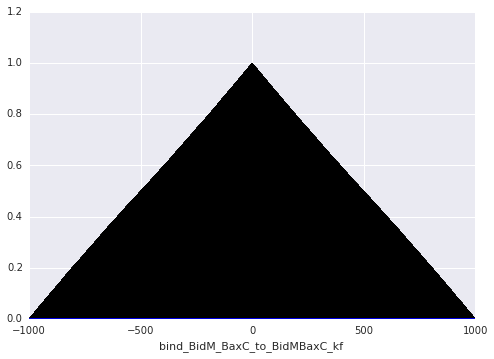

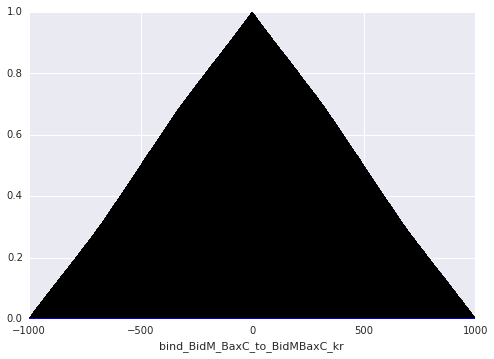

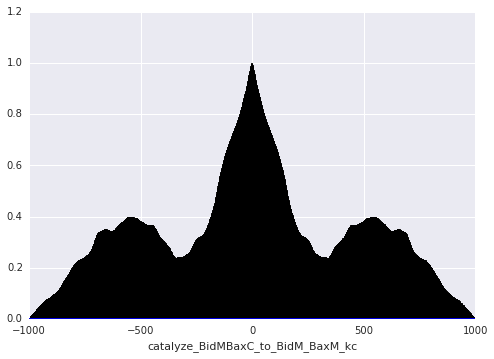

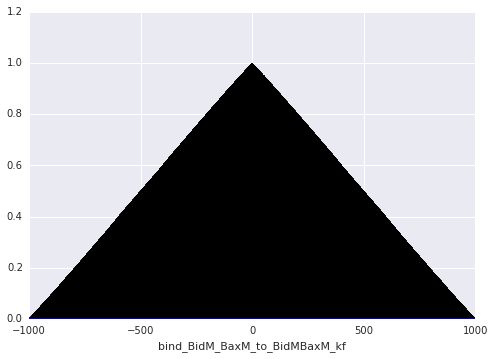

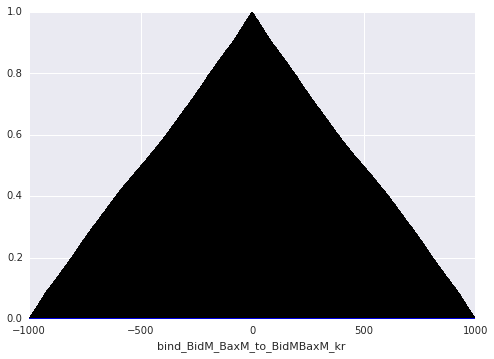

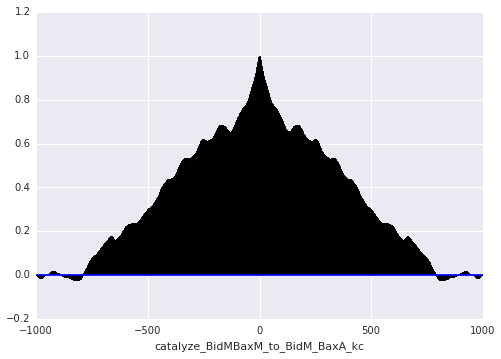

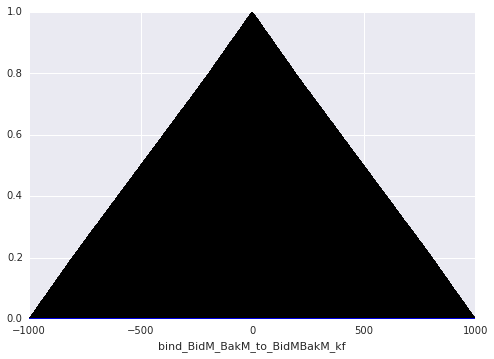

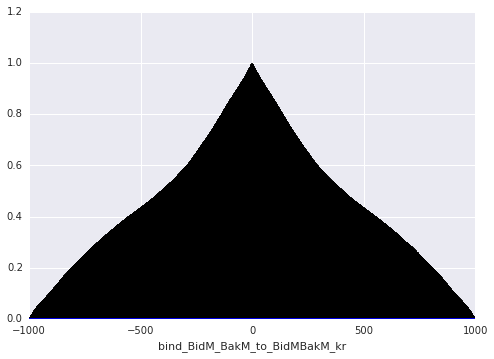

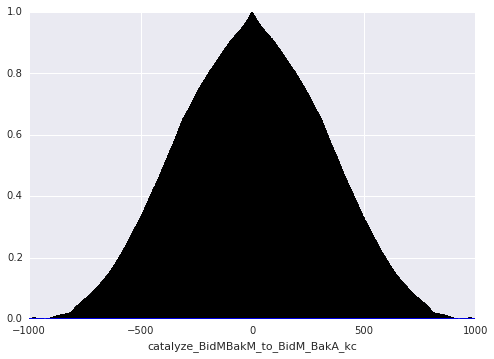

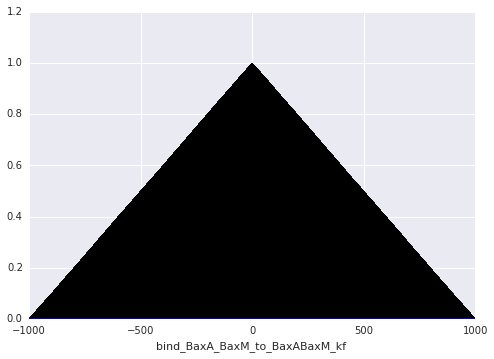

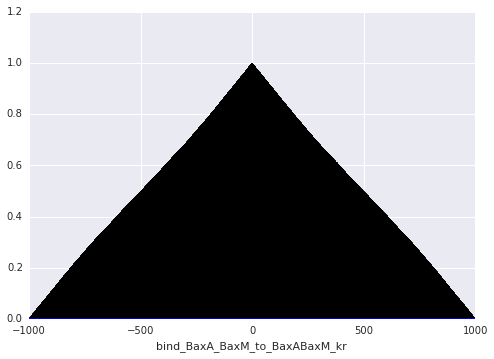

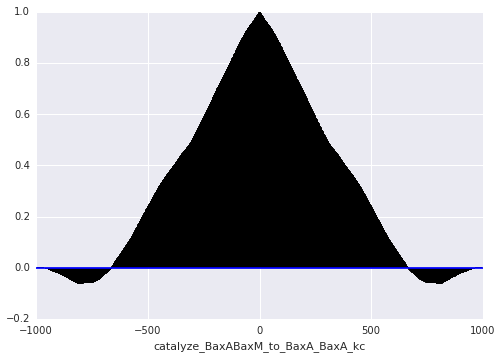

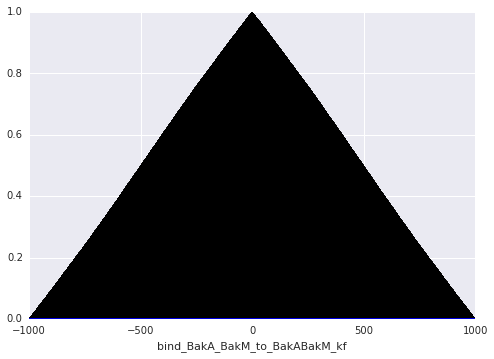

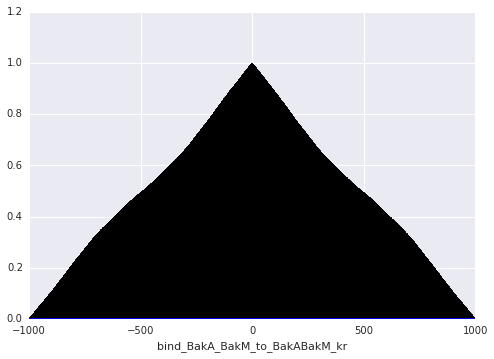

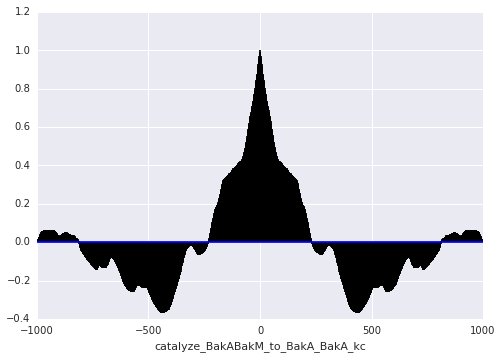

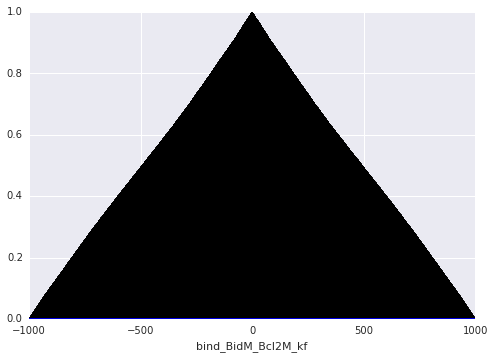

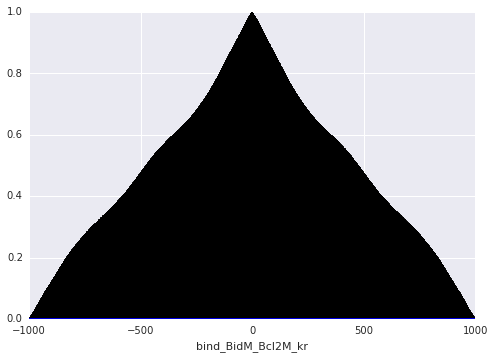

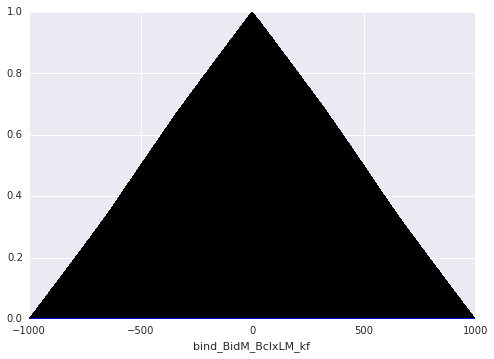

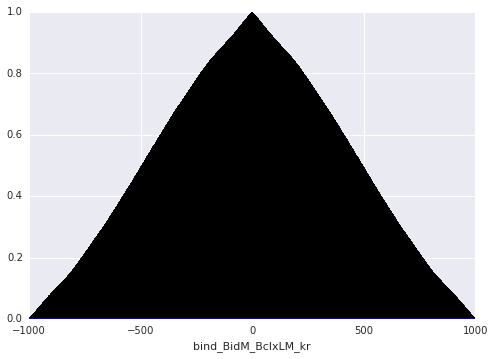

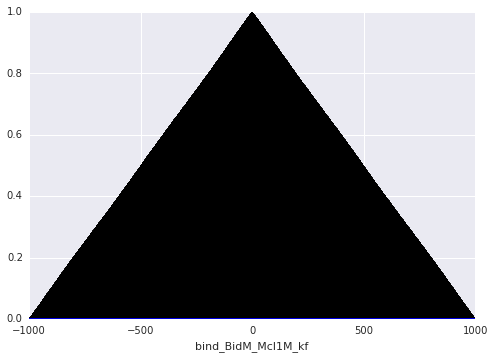

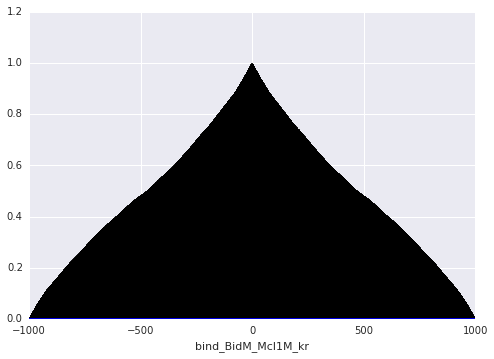

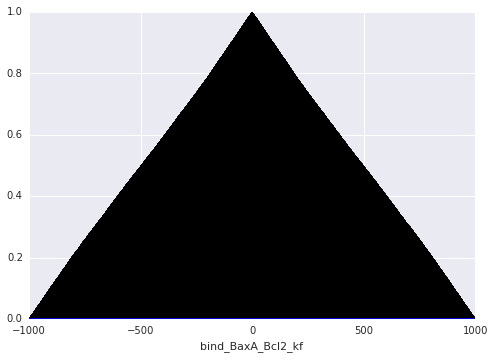

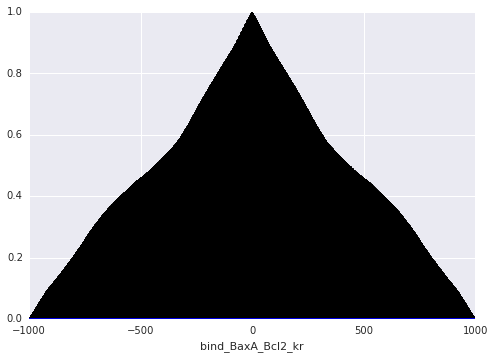

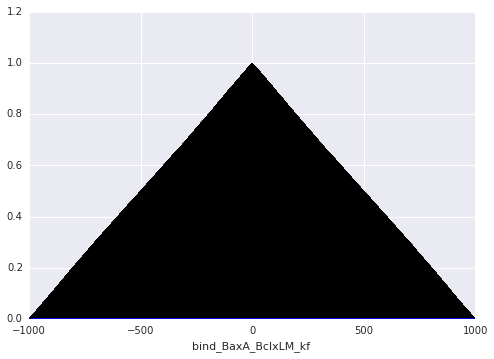

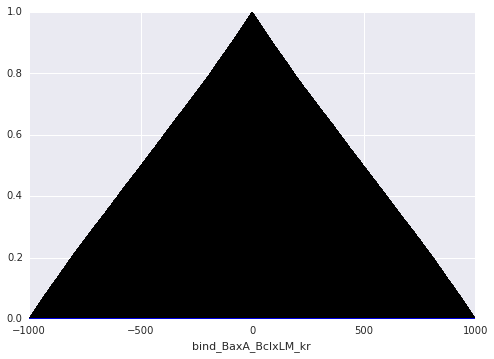

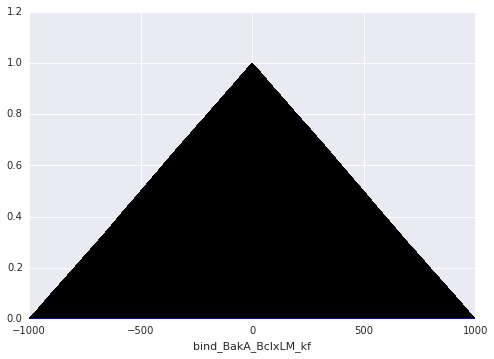

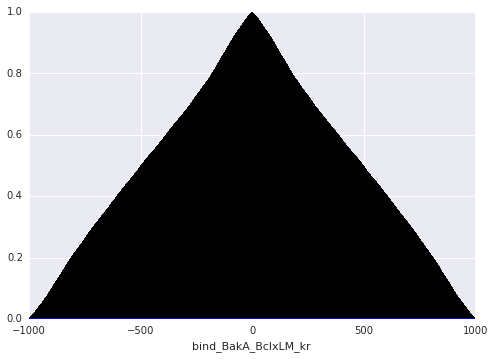

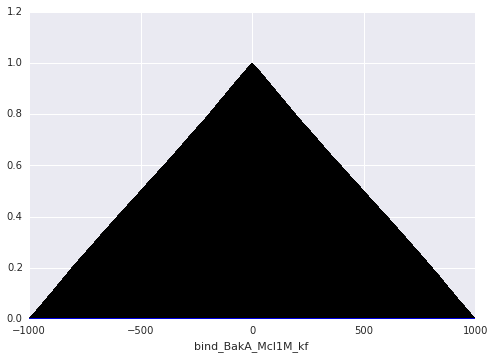

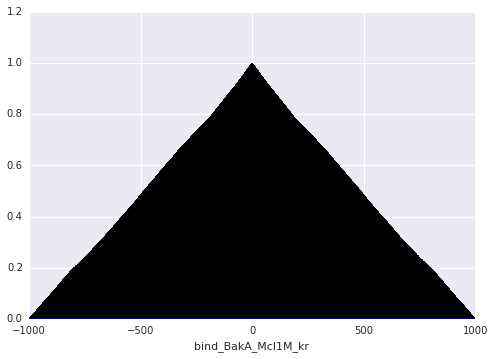

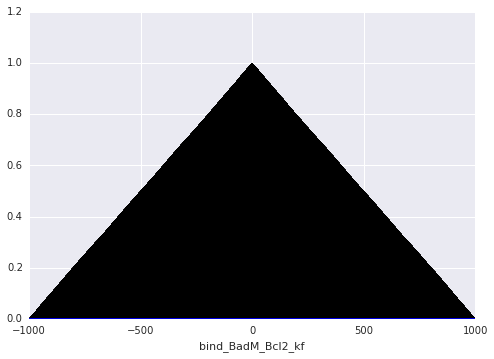

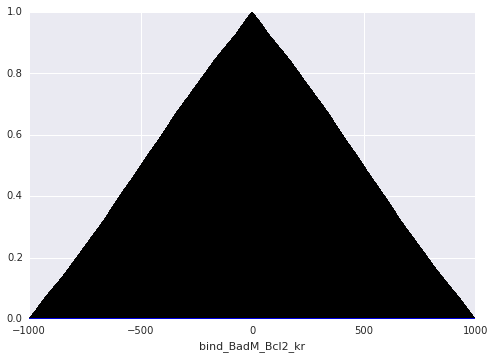

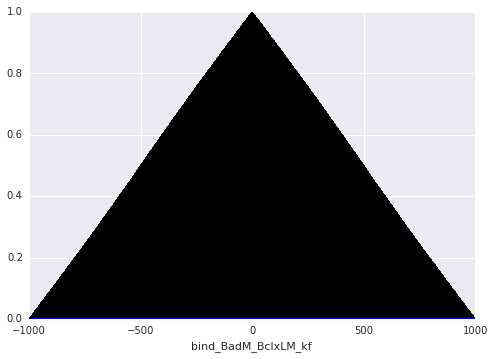

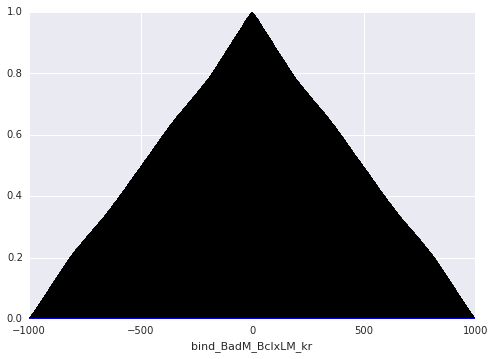

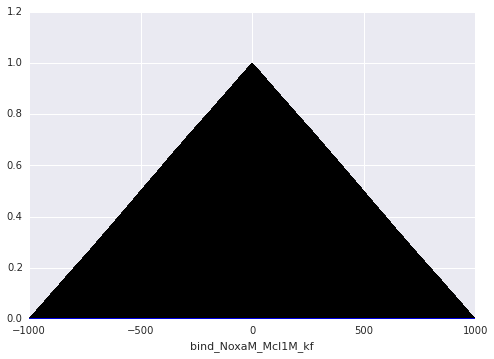

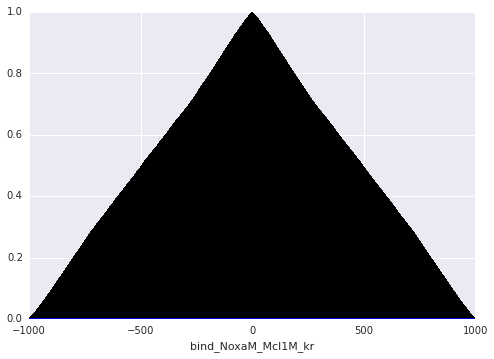

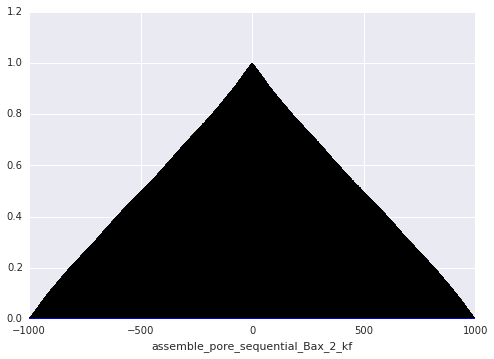

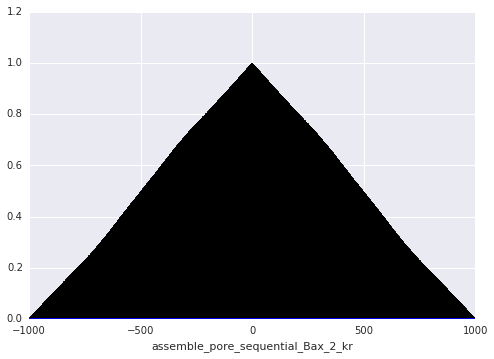

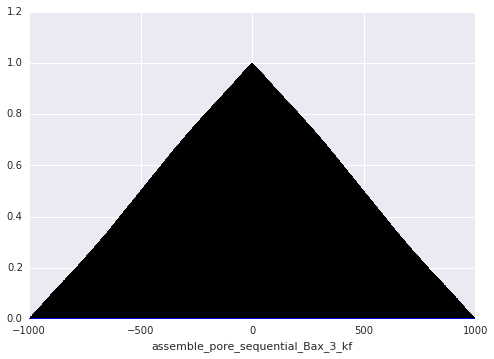

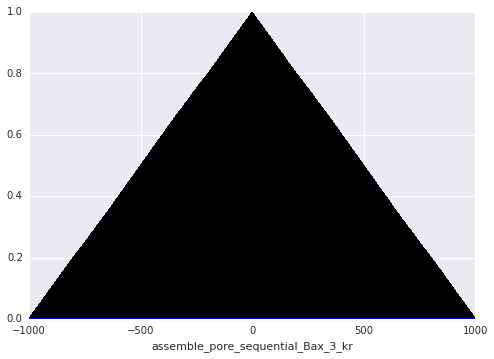

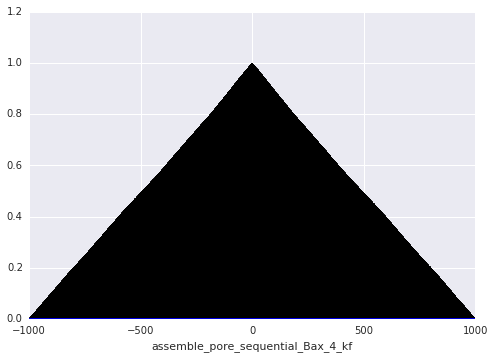

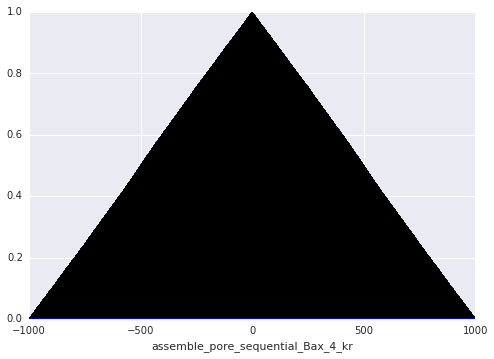

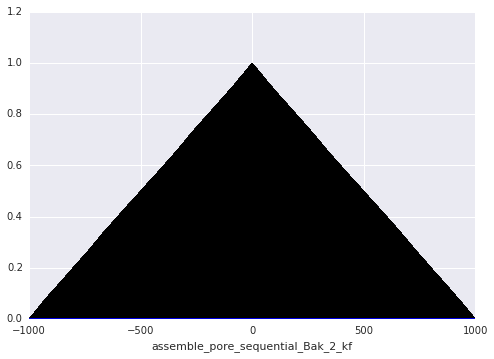

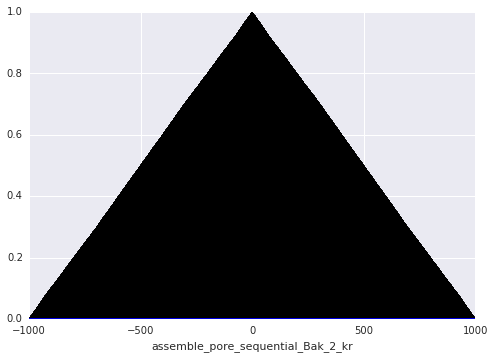

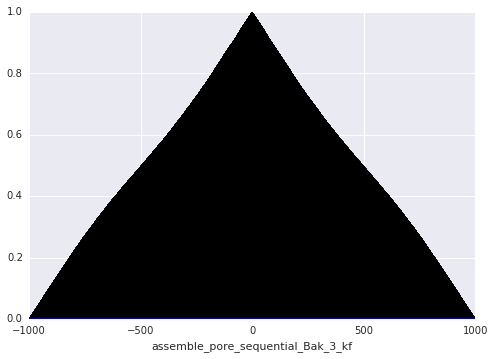

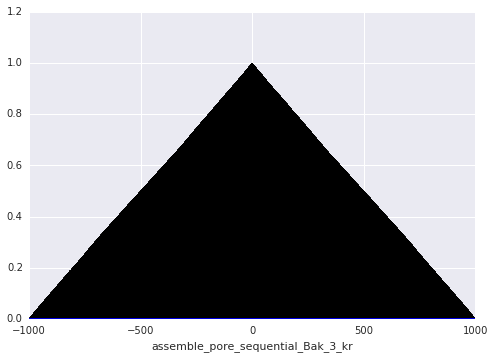

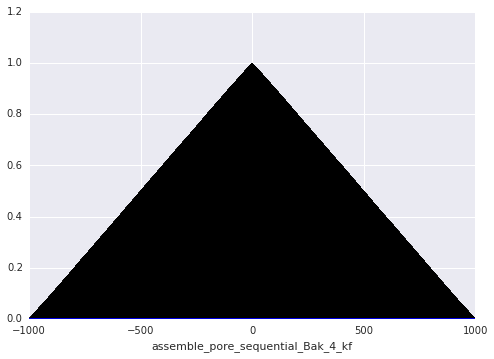

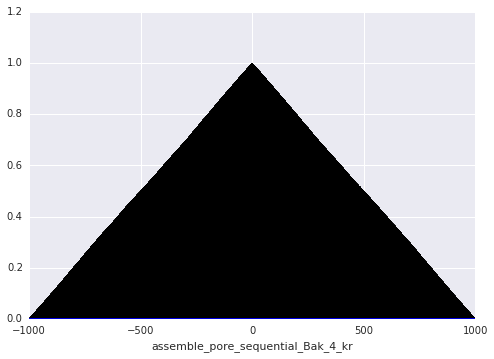

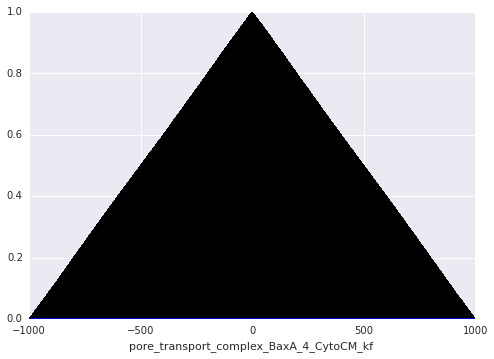

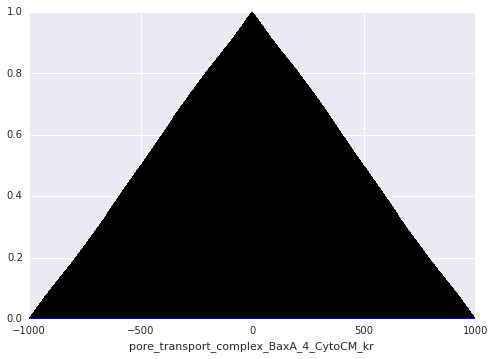

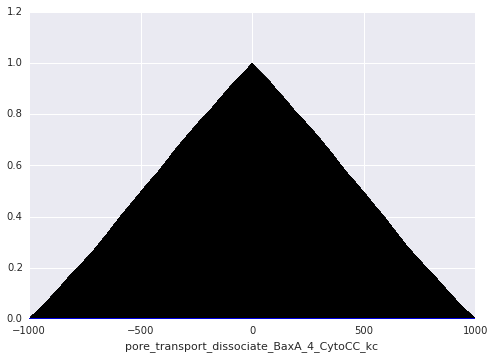

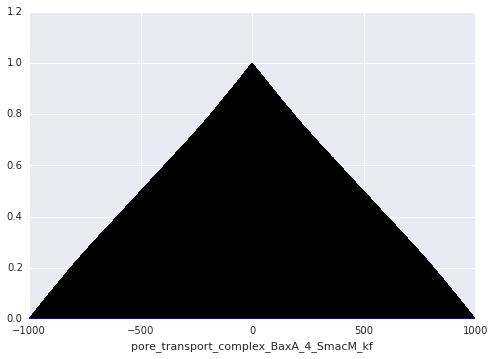

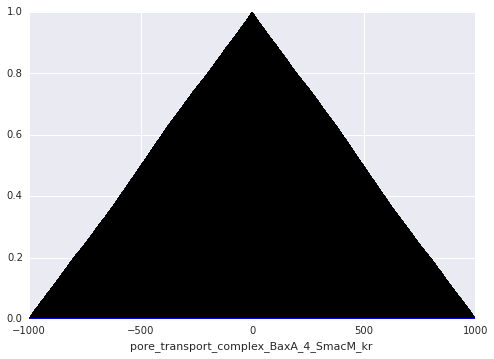

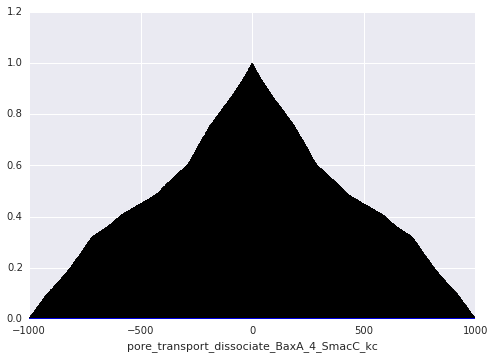

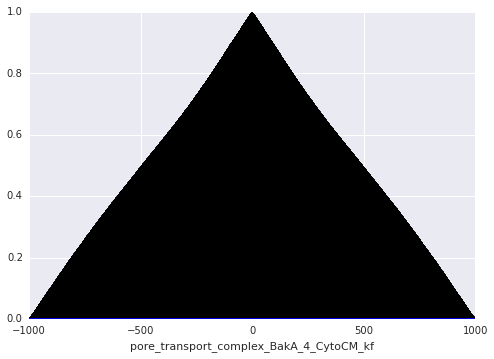

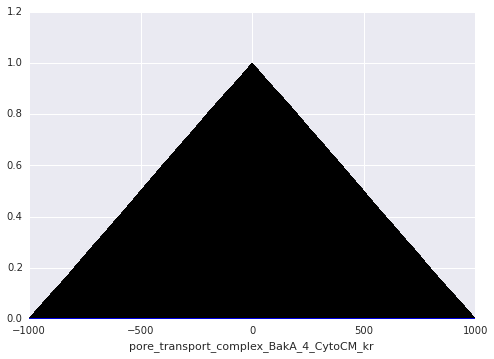

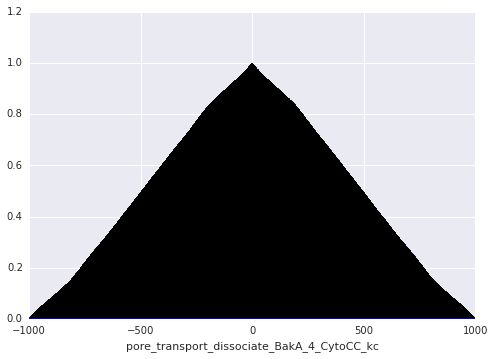

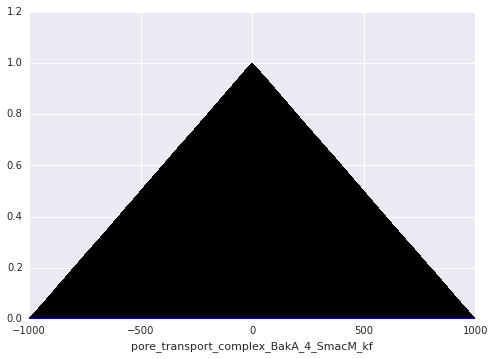

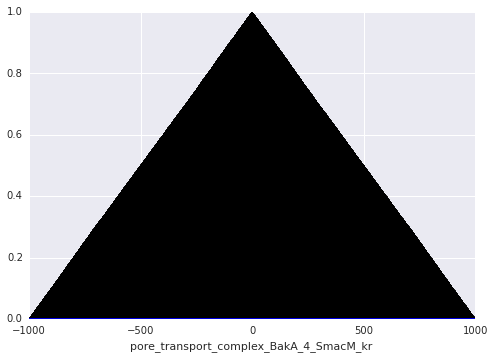

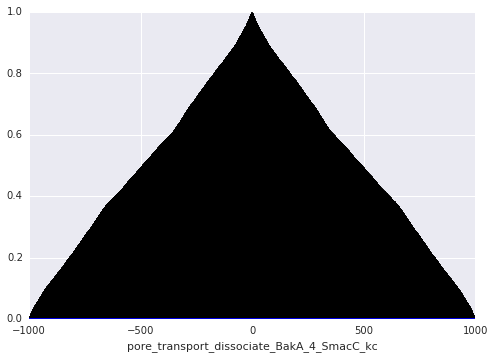

In [15]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][2][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
corner(trace_arr_a[:,50:60:], labels=param_trace_dict_a['param_list'][50:60], bins=10)

In [16]:
acceptance_rates = np.zeros((len(traces['a'][0][0],)))
for dim in range(len(traces['a'][0][0])):
    n_acceptances = 0
    for iteration in range(1, len(traces['a'][0])):
        if traces['a'][0][iteration][dim] != traces['a'][0][iteration-1][dim]:
            n_acceptances += 1
    acceptance_rates[dim] = float(n_acceptances)/len(traces['a'][0])
    print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances),' acceptance rate: ',str(acceptance_rates[dim])
    n_acceptances = 0
acceptance_rates

N acceptances for parameter:  bind_L_R_to_LR_kf  =  311  acceptance rate:  0.311
N acceptances for parameter:  bind_L_R_to_LR_kr  =  304  acceptance rate:  0.304
N acceptances for parameter:  convert_LR_to_DISC_kc  =  306  acceptance rate:  0.306
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  307  acceptance rate:  0.307
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  309  acceptance rate:  0.309
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  306  acceptance rate:  0.306
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  304  acceptance rate:  0.304
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  306  acceptance rate:  0.306
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  309  acceptance rate:  0.309
N acceptances for parameter:  bind_DISC_flip_kf  =  313  acceptance rate:  0.313
N acceptances for parameter:  bind_DISC_flip_kr  =  310  acceptance rate:  0.31
N acceptances for parameter:

array([ 0.311,  0.304,  0.306,  0.307,  0.309,  0.306,  0.304,  0.306,
        0.309,  0.313,  0.31 ,  0.307,  0.308,  0.304,  0.303,  0.307,
        0.31 ,  0.314,  0.31 ,  0.303,  0.306,  0.306,  0.311,  0.306,
        0.313,  0.312,  0.309,  0.307,  0.309,  0.308,  0.309,  0.305,
        0.307,  0.309,  0.308,  0.307,  0.309,  0.307,  0.305,  0.308,
        0.309,  0.303,  0.313,  0.305,  0.311,  0.308,  0.307,  0.306,
        0.306,  0.306,  0.311,  0.313,  0.303,  0.309,  0.312,  0.309,
        0.311,  0.307,  0.303,  0.304,  0.308,  0.306,  0.31 ,  0.309,
        0.306,  0.304,  0.306,  0.305,  0.308,  0.302,  0.308,  0.306,
        0.308,  0.308,  0.308,  0.31 ,  0.31 ,  0.304,  0.307,  0.306,
        0.308,  0.313,  0.304,  0.311,  0.305,  0.3  ,  0.31 ,  0.306,
        0.31 ,  0.306,  0.306,  0.309,  0.309,  0.308,  0.309,  0.307,
        0.308,  0.305,  0.306,  0.306,  0.312,  0.301,  0.309,  0.304,
        0.308])

In [17]:
acceptance_rates = np.zeros((len(traces['a'][1][0],)))
for dim in range(len(traces['a'][1][0])):
    n_acceptances = 0
    for iteration in range(1, len(traces['a'][1])):
        if traces['a'][1][iteration][dim] != traces['a'][1][iteration-1][dim]:
            n_acceptances += 1
    acceptance_rates[dim] = float(n_acceptances)/len(traces['a'][1])
    print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances),' acceptance rate: ',str(acceptance_rates[dim])
    n_acceptances = 0
acceptance_rates

N acceptances for parameter:  bind_L_R_to_LR_kf  =  358  acceptance rate:  0.358
N acceptances for parameter:  bind_L_R_to_LR_kr  =  368  acceptance rate:  0.368
N acceptances for parameter:  convert_LR_to_DISC_kc  =  356  acceptance rate:  0.356
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  365  acceptance rate:  0.365
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  366  acceptance rate:  0.366
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  362  acceptance rate:  0.362
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  360  acceptance rate:  0.36
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  363  acceptance rate:  0.363
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  360  acceptance rate:  0.36
N acceptances for parameter:  bind_DISC_flip_kf  =  365  acceptance rate:  0.365
N acceptances for parameter:  bind_DISC_flip_kr  =  365  acceptance rate:  0.365
N acceptances for parameter: 

array([ 0.358,  0.368,  0.356,  0.365,  0.366,  0.362,  0.36 ,  0.363,
        0.36 ,  0.365,  0.365,  0.36 ,  0.361,  0.365,  0.362,  0.36 ,
        0.359,  0.363,  0.362,  0.361,  0.362,  0.363,  0.36 ,  0.362,
        0.359,  0.358,  0.361,  0.36 ,  0.361,  0.355,  0.36 ,  0.359,
        0.364,  0.361,  0.363,  0.362,  0.36 ,  0.36 ,  0.361,  0.366,
        0.364,  0.355,  0.361,  0.363,  0.36 ,  0.361,  0.359,  0.36 ,
        0.357,  0.361,  0.368,  0.36 ,  0.359,  0.36 ,  0.364,  0.36 ,
        0.356,  0.361,  0.363,  0.362,  0.359,  0.363,  0.36 ,  0.366,
        0.365,  0.363,  0.359,  0.364,  0.361,  0.36 ,  0.364,  0.359,
        0.36 ,  0.358,  0.362,  0.365,  0.361,  0.361,  0.36 ,  0.364,
        0.367,  0.366,  0.366,  0.362,  0.364,  0.364,  0.361,  0.36 ,
        0.364,  0.36 ,  0.361,  0.363,  0.367,  0.365,  0.364,  0.362,
        0.363,  0.364,  0.363,  0.36 ,  0.359,  0.364,  0.366,  0.365,
        0.362])

In [11]:
acceptance_rates = np.zeros((len(traces['a'][2][0],)))
for dim in range(len(traces['a'][2][0])):
    n_acceptances = 0
    for iteration in range(1, len(traces['a'][2])):
        if traces['a'][2][iteration][dim] != traces['a'][2][iteration-1][dim]:
            n_acceptances += 1
    acceptance_rates[dim] = float(n_acceptances)/len(traces['a'][2])
    print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances),' acceptance rate: ',str(acceptance_rates[dim])
    n_acceptances = 0
acceptance_rates

N acceptances for parameter:  bind_L_R_to_LR_kf  =  366  acceptance rate:  0.366
N acceptances for parameter:  bind_L_R_to_LR_kr  =  368  acceptance rate:  0.368
N acceptances for parameter:  convert_LR_to_DISC_kc  =  367  acceptance rate:  0.367
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  374  acceptance rate:  0.374
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  367  acceptance rate:  0.367
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  366  acceptance rate:  0.366
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  361  acceptance rate:  0.361
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  365  acceptance rate:  0.365
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  367  acceptance rate:  0.367
N acceptances for parameter:  bind_DISC_flip_kf  =  372  acceptance rate:  0.372
N acceptances for parameter:  bind_DISC_flip_kr  =  368  acceptance rate:  0.368
N acceptances for parameter

array([ 0.366,  0.368,  0.367,  0.374,  0.367,  0.366,  0.361,  0.365,
        0.367,  0.372,  0.368,  0.366,  0.365,  0.364,  0.366,  0.365,
        0.363,  0.371,  0.364,  0.372,  0.366,  0.363,  0.37 ,  0.369,
        0.367,  0.37 ,  0.367,  0.369,  0.368,  0.368,  0.367,  0.367,
        0.367,  0.362,  0.365,  0.369,  0.366,  0.367,  0.362,  0.365,
        0.367,  0.364,  0.362,  0.372,  0.366,  0.367,  0.369,  0.37 ,
        0.362,  0.368,  0.369,  0.364,  0.364,  0.37 ,  0.365,  0.364,
        0.367,  0.369,  0.371,  0.367,  0.366,  0.371,  0.365,  0.362,
        0.367,  0.368,  0.363,  0.371,  0.367,  0.361,  0.364,  0.371,
        0.37 ,  0.368,  0.367,  0.367,  0.367,  0.367,  0.367,  0.365,
        0.371,  0.37 ,  0.371,  0.367,  0.362,  0.364,  0.362,  0.365,
        0.37 ,  0.367,  0.374,  0.368,  0.367,  0.367,  0.368,  0.364,
        0.368,  0.365,  0.37 ,  0.368,  0.365,  0.37 ,  0.367,  0.365,
        0.374])